## Exercise 5.12
The goal of this exercise is to train a race car to reach the finish line in a gride world.
The car can only control its acceleration. It can accelerate the forward, backward and side to side at one-pixel per-step. However, this acceleration is not guaranteed. With a 10% chance, the car fails to accelerate at all on any given step.
For this exercise, since I was having trouble with plotters, I made a command-line interface for the rust code [here](https://github.com/levmckinney/RL2018/tree/master/exercises/chapter5/e5_12).
So first we have to build that:

In [1]:
!(cd e5_12 && cargo build --release)

    Finished release [optimized] target(s) in 0.03s


## Starting with a small track
The track used here is similar to the one shown in the textbook. I found that off policy Monte Carlo worked the best with an epsilon greedy behaviour policy and a greedy target policy. Importance sampling is used to account for the different target and behaviour policies. It's run this for 2,000,000 episodes. This will generally learn a good policy however rarely the greedy policy will become to sit still on the start line. I'm still trying to work out exactly why it does this.

In [2]:
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo off-policy \
    --epsilon 0.08 \
    --seed 42 \
    --num_episodes 2000000 \
    --example ./e5_12_outputs/race_track_off-policy_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_off-policy_avg_value.png

Creating race track env
max velocity 14
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________

_________XXXXXXXXXXXXXXXXXX_________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________=================_________________________________________________________________

[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45776/2000000 recent ep len 45.36003475900218
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46800/2000000 recent ep len 43.597157383604284
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47744/2000000 recent ep len 43.203862502846896
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48724/2000000 recent ep len 42.61711623724775
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49736/2000000 recent ep len 42.48147536106174
[00:00:03] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   50841/2000000 recent ep len 43.480430090680976
[00:00:03] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   51797/2000000 recent ep len 42.877151272339304
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   52807/2000000 recent ep len 44.198329975558956
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53963/2000000 recent ep len 43.236569983091194
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54860/2000000 recent ep len 44.995852710

[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  105856/2000000 recent ep len 45.825215544802546
[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  106845/2000000 recent ep len 44.6539446445043
[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  107829/2000000 recent ep len 45.00414168407986
[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  108703/2000000 recent ep len 45.13526691671762
[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  109672/2000000 recent ep len 43.47731997960226
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  110807/2000000 recent ep len 44.81990427379787
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111750/2000000 recent ep len 46.5926800273149
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112760/2000000 recent ep len 45.75783912349444
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113800/2000000 recent ep len 45.913200850787426
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  114930/2000000 recent ep len 45.042967754409005

[00:00:11] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166918/2000000 recent ep len 36.446214376077236
[00:00:11] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167827/2000000 recent ep len 37.02529234699995
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168830/2000000 recent ep len 37.351882991417874
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169912/2000000 recent ep len 37.48526663861965
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  170913/2000000 recent ep len 37.028316904557855
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  171952/2000000 recent ep len 36.06285073607843
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  173081/2000000 recent ep len 36.67991242031702
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  174085/2000000 recent ep len 36.120901074057315
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  174985/2000000 recent ep len 36.52280949900963
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  176015/2000000 recent ep len 36.25897890312

[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229348/2000000 recent ep len 32.974047725881775
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230280/2000000 recent ep len 33.07183640968128
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  231322/2000000 recent ep len 32.79769254080038
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  232488/2000000 recent ep len 32.20196804652626
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233452/2000000 recent ep len 33.307020329194344
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  234402/2000000 recent ep len 32.24756688802485
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  235519/2000000 recent ep len 31.650574974768706
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  236505/2000000 recent ep len 32.34540677538674
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  237522/2000000 recent ep len 32.74190711067519
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  238532/2000000 recent ep len 31.739820089620

[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  292393/2000000 recent ep len 32.385314208537814
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  293318/2000000 recent ep len 32.58677888898206
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  294266/2000000 recent ep len 32.62175972650838
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295129/2000000 recent ep len 32.14288777388034
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296095/2000000 recent ep len 32.346946516125215
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296997/2000000 recent ep len 32.0282302427542
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  298015/2000000 recent ep len 31.15237578910264
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  299138/2000000 recent ep len 31.766003742135464
[00:00:20] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  300161/2000000 recent ep len 31.144129505814128
[00:00:20] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  301208/2000000 recent ep len 31.916410145162

[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  355049/2000000 recent ep len 31.791997943178618
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  356143/2000000 recent ep len 31.60869516128182
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  357056/2000000 recent ep len 31.117713611775166
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  358010/2000000 recent ep len 30.978468265334175
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  359113/2000000 recent ep len 32.58919639964561
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  360043/2000000 recent ep len 34.100191158781136
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  361070/2000000 recent ep len 33.47418717784149
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  362135/2000000 recent ep len 32.82204801971371
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  363240/2000000 recent ep len 31.809011194590205
[00:00:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364284/2000000 recent ep len 31.4121867616

[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  417874/2000000 recent ep len 27.443066008606447
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  418928/2000000 recent ep len 27.495598354069358
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  419868/2000000 recent ep len 28.142517594317514
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  420910/2000000 recent ep len 27.484659922388676
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  421989/2000000 recent ep len 27.985149311042605
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  423135/2000000 recent ep len 27.508323326460083
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  424079/2000000 recent ep len 28.24136477733173
[00:00:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  425030/2000000 recent ep len 27.984137053482392
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  426146/2000000 recent ep len 28.50300470951273
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  427143/2000000 recent ep len 27.51446206

[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  479477/2000000 recent ep len 27.21733447695686
[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  480386/2000000 recent ep len 27.568784651978476
[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  481481/2000000 recent ep len 27.658262743204553
[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  482451/2000000 recent ep len 27.173411736999395
[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  483516/2000000 recent ep len 26.817694518977405
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  484666/2000000 recent ep len 26.809533356844543
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  485582/2000000 recent ep len 27.08610825808205
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486499/2000000 recent ep len 27.46536316378928
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487335/2000000 recent ep len 27.532258292873202
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  488376/2000000 recent ep len 27.265952900

[00:00:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  541133/2000000 recent ep len 27.893802816680218
[00:00:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  541990/2000000 recent ep len 27.065851417906654
[00:00:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  542920/2000000 recent ep len 28.26874926787446
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  544006/2000000 recent ep len 27.42747123508152
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  544922/2000000 recent ep len 29.194756338243018
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  545858/2000000 recent ep len 28.190561835048598
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  546980/2000000 recent ep len 28.16081445543777
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  547913/2000000 recent ep len 26.415065718912274
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  548856/2000000 recent ep len 27.693264116387812
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  549942/2000000 recent ep len 27.407287245

[00:00:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  602399/2000000 recent ep len 28.259778021021166
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  603275/2000000 recent ep len 27.425455924103087
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  604247/2000000 recent ep len 28.463723878755708
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  605343/2000000 recent ep len 27.892931130861182
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  606327/2000000 recent ep len 27.010841446433624
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  607346/2000000 recent ep len 28.014188032773998
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608379/2000000 recent ep len 27.967590964641076
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  609418/2000000 recent ep len 27.15902259773025
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  610334/2000000 recent ep len 27.900111496197635
[00:00:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  611243/2000000 recent ep len 28.9680670

[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  663805/2000000 recent ep len 26.90340977815839
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  664858/2000000 recent ep len 26.254771573642643
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  665860/2000000 recent ep len 26.88521071228765
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666846/2000000 recent ep len 26.609099714038706
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  667928/2000000 recent ep len 27.637806974514117
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  668766/2000000 recent ep len 26.842197810038925
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  669654/2000000 recent ep len 27.27424094026261
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  670716/2000000 recent ep len 26.64136319976057
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  671677/2000000 recent ep len 27.025056548013506
[00:00:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  672670/2000000 recent ep len 26.7928778136

[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  725589/2000000 recent ep len 25.861386181354767
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  726735/2000000 recent ep len 25.26829988944177
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727645/2000000 recent ep len 26.511991377054578
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728547/2000000 recent ep len 26.07419780512159
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729467/2000000 recent ep len 26.22785700282499
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  730553/2000000 recent ep len 26.795498662396074
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  731536/2000000 recent ep len 26.257381711179175
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  732560/2000000 recent ep len 25.907831188415987
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  733692/2000000 recent ep len 26.55968578149047
[00:00:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  734665/2000000 recent ep len 25.5861826073

[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  788128/2000000 recent ep len 25.51723646247044
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  789047/2000000 recent ep len 25.571178939601328
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  790171/2000000 recent ep len 25.494275025269705
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  791094/2000000 recent ep len 25.542361281240268
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  792021/2000000 recent ep len 25.84089886163698
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  793173/2000000 recent ep len 26.317442751588768
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  794159/2000000 recent ep len 26.56217371290765
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  795164/2000000 recent ep len 26.45802313537132
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  796201/2000000 recent ep len 26.656641526922645
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  797311/2000000 recent ep len 26.9838225912

[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  850873/2000000 recent ep len 26.291065568910735
[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  851765/2000000 recent ep len 25.99726659095737
[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  852713/2000000 recent ep len 25.473345657669984
[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  853858/2000000 recent ep len 25.261517884877527
[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  854813/2000000 recent ep len 25.843161627966346
[00:00:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  855795/2000000 recent ep len 26.275421522048482
[00:00:58] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  856825/2000000 recent ep len 26.131799078827182
[00:00:58] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  857601/2000000 recent ep len 25.455035072621335
[00:00:58] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  858502/2000000 recent ep len 25.349309197793644
[00:00:58] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  859504/2000000 recent ep len 26.3772554

[00:01:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  913350/2000000 recent ep len 26.50874428594912
[00:01:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  914302/2000000 recent ep len 25.783667465166836
[00:01:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  915313/2000000 recent ep len 25.01167367867894
[00:01:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  916351/2000000 recent ep len 25.378666781913548
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  917445/2000000 recent ep len 25.532475016744176
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  918424/2000000 recent ep len 25.275375100672203
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  919440/2000000 recent ep len 25.188310210232867
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  920533/2000000 recent ep len 25.827196649973853
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  921516/2000000 recent ep len 26.261993909786824
[00:01:02] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  922553/2000000 recent ep len 25.28344861

[00:01:05] ███████████████████░░░░░░░░░░░░░░░░░░░░░  975404/2000000 recent ep len 24.932894762044473
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  976416/2000000 recent ep len 25.037236525826806
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  977307/2000000 recent ep len 24.85143997998307
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  978277/2000000 recent ep len 25.314017330918478
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  979348/2000000 recent ep len 25.0754901342155
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  980447/2000000 recent ep len 24.806565920547712
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  981458/2000000 recent ep len 25.332377700309884
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  982478/2000000 recent ep len 25.473963907365164
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  983604/2000000 recent ep len 25.251765814485676
[00:01:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░  984513/2000000 recent ep len 25.662181463

[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1036955/2000000 recent ep len 26.13454115594419
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1037880/2000000 recent ep len 25.314542563083993
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1038889/2000000 recent ep len 25.217068998885704
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1040029/2000000 recent ep len 25.006204367685047
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1041043/2000000 recent ep len 25.568366119569273
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1042027/2000000 recent ep len 25.298226391952483
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1043048/2000000 recent ep len 24.976782615543808
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1043978/2000000 recent ep len 25.865670263236773
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1044949/2000000 recent ep len 26.02088887427432
[00:01:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1046101/2000000 recent ep len 25.58325002

[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1099335/2000000 recent ep len 25.62901233000547
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1100407/2000000 recent ep len 27.19625914777322
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1101414/2000000 recent ep len 26.294592904988292
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1102387/2000000 recent ep len 26.024200710935318
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1103547/2000000 recent ep len 25.45889673625182
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1104501/2000000 recent ep len 25.80956735199415
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1105431/2000000 recent ep len 25.445815484570296
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1106584/2000000 recent ep len 25.477623986129277
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1107581/2000000 recent ep len 24.858882887769425
[00:01:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 1108595/2000000 recent ep len 24.8160130552

[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1162392/2000000 recent ep len 25.856305231953705
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1163300/2000000 recent ep len 26.30434018985148
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1164361/2000000 recent ep len 27.25095543463752
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1165300/2000000 recent ep len 27.477514907153147
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1166292/2000000 recent ep len 27.252702327336248
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1167451/2000000 recent ep len 27.652179002185967
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1168435/2000000 recent ep len 27.159012268456845
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1169473/2000000 recent ep len 27.694229996598086
[00:01:18] ███████████████████████░░░░░░░░░░░░░░░░░ 1170571/2000000 recent ep len 27.55427634794128
[00:01:19] ███████████████████████░░░░░░░░░░░░░░░░░ 1171681/2000000 recent ep len 27.713702496

[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1225202/2000000 recent ep len 24.57943263700662
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1226118/2000000 recent ep len 25.257443153059924
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1227056/2000000 recent ep len 24.63087468072526
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1228221/2000000 recent ep len 25.249886435143736
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1229236/2000000 recent ep len 24.9844684482894
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1230237/2000000 recent ep len 25.148619047668685
[00:01:22] ████████████████████████░░░░░░░░░░░░░░░░ 1231207/2000000 recent ep len 25.25910594313562
[00:01:23] ████████████████████████░░░░░░░░░░░░░░░░ 1232284/2000000 recent ep len 25.85211226792025
[00:01:23] ████████████████████████░░░░░░░░░░░░░░░░ 1233228/2000000 recent ep len 26.557602674635795
[00:01:23] ████████████████████████░░░░░░░░░░░░░░░░ 1234219/2000000 recent ep len 25.724608875884

[00:01:26] █████████████████████████░░░░░░░░░░░░░░░ 1286955/2000000 recent ep len 25.60005815239362
[00:01:26] █████████████████████████░░░░░░░░░░░░░░░ 1287899/2000000 recent ep len 25.592238434145752
[00:01:26] █████████████████████████░░░░░░░░░░░░░░░ 1289038/2000000 recent ep len 25.03697030790426
[00:01:26] █████████████████████████░░░░░░░░░░░░░░░ 1289986/2000000 recent ep len 25.001633128999508
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1290932/2000000 recent ep len 25.803212774995288
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1292061/2000000 recent ep len 24.93258082498747
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1293052/2000000 recent ep len 25.91664968850614
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1294055/2000000 recent ep len 25.551706879468938
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1295225/2000000 recent ep len 24.94055674114053
[00:01:27] █████████████████████████░░░░░░░░░░░░░░░ 1296232/2000000 recent ep len 24.41057066890

[00:01:30] ██████████████████████████░░░░░░░░░░░░░░ 1349865/2000000 recent ep len 25.567342040586034
[00:01:30] ███████████████████████████░░░░░░░░░░░░░ 1350764/2000000 recent ep len 25.009848078084215
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1351756/2000000 recent ep len 25.137445293422083
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1352909/2000000 recent ep len 26.17678803605101
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1353901/2000000 recent ep len 24.54159010120413
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1354972/2000000 recent ep len 24.609208063367706
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1356058/2000000 recent ep len 24.44794452260856
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1357171/2000000 recent ep len 25.037698448619032
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1358117/2000000 recent ep len 25.095859455364877
[00:01:31] ███████████████████████████░░░░░░░░░░░░░ 1359104/2000000 recent ep len 25.831126560

[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1412416/2000000 recent ep len 24.554045737589497
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1413531/2000000 recent ep len 24.718177256611103
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1414515/2000000 recent ep len 24.655253124327906
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1415500/2000000 recent ep len 23.81658768676644
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1416456/2000000 recent ep len 23.761120581176623
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1417535/2000000 recent ep len 24.833643325839876
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1418457/2000000 recent ep len 24.509830970899976
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1419474/2000000 recent ep len 25.45536936581899
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1420628/2000000 recent ep len 24.62000277887682
[00:01:35] ████████████████████████████░░░░░░░░░░░░ 1421574/2000000 recent ep len 24.212842265

[00:01:39] █████████████████████████████░░░░░░░░░░░ 1475450/2000000 recent ep len 22.937872897402734
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1476376/2000000 recent ep len 23.30190733229491
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1477393/2000000 recent ep len 23.511047306459172
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1478540/2000000 recent ep len 23.3112775537033
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1479521/2000000 recent ep len 23.526079091827587
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1480547/2000000 recent ep len 22.803291735329665
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1481671/2000000 recent ep len 23.909127489031956
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1482574/2000000 recent ep len 23.184779383592097
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1483530/2000000 recent ep len 22.672879887506188
[00:01:39] █████████████████████████████░░░░░░░░░░░ 1484520/2000000 recent ep len 23.274389658

[00:01:43] ██████████████████████████████░░░░░░░░░░ 1536513/2000000 recent ep len 23.26727570308773
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1537560/2000000 recent ep len 23.05709258495103
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1538549/2000000 recent ep len 23.205041375756903
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1539564/2000000 recent ep len 23.360298132936673
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1540735/2000000 recent ep len 23.631037168522827
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1541692/2000000 recent ep len 24.136176459571818
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1542556/2000000 recent ep len 24.143061376803168
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1543557/2000000 recent ep len 23.997187769719922
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1544569/2000000 recent ep len 24.440941481189505
[00:01:43] ██████████████████████████████░░░░░░░░░░ 1545514/2000000 recent ep len 23.99361954

[00:01:47] ███████████████████████████████░░░░░░░░░ 1599766/2000000 recent ep len 23.14145339991883
[00:01:47] ████████████████████████████████░░░░░░░░ 1600667/2000000 recent ep len 23.127511901754357
[00:01:47] ████████████████████████████████░░░░░░░░ 1601827/2000000 recent ep len 23.16099143796536
[00:01:47] ████████████████████████████████░░░░░░░░ 1602763/2000000 recent ep len 23.88669747314222
[00:01:47] ████████████████████████████████░░░░░░░░ 1603752/2000000 recent ep len 23.331911804658922
[00:01:47] ████████████████████████████████░░░░░░░░ 1604786/2000000 recent ep len 23.54987332989535
[00:01:47] ████████████████████████████████░░░░░░░░ 1605893/2000000 recent ep len 23.480701646419
[00:01:48] ████████████████████████████████░░░░░░░░ 1606833/2000000 recent ep len 23.405647861773083
[00:01:48] ████████████████████████████████░░░░░░░░ 1607796/2000000 recent ep len 23.51830857707533
[00:01:48] ████████████████████████████████░░░░░░░░ 1608943/2000000 recent ep len 23.36522455658274

[00:01:51] █████████████████████████████████░░░░░░░ 1663098/2000000 recent ep len 23.71490783811597
[00:01:51] █████████████████████████████████░░░░░░░ 1664214/2000000 recent ep len 24.066543712899243
[00:01:51] █████████████████████████████████░░░░░░░ 1665218/2000000 recent ep len 24.17696816411665
[00:01:51] █████████████████████████████████░░░░░░░ 1666266/2000000 recent ep len 23.59417004655821
[00:01:51] █████████████████████████████████░░░░░░░ 1667405/2000000 recent ep len 24.25432755358335
[00:01:52] █████████████████████████████████░░░░░░░ 1668372/2000000 recent ep len 24.558920606306902
[00:01:52] █████████████████████████████████░░░░░░░ 1669398/2000000 recent ep len 24.750294566339882
[00:01:52] █████████████████████████████████░░░░░░░ 1670462/2000000 recent ep len 24.205897855041858
[00:01:52] █████████████████████████████████░░░░░░░ 1671526/2000000 recent ep len 23.876877286599548
[00:01:52] █████████████████████████████████░░░░░░░ 1672522/2000000 recent ep len 23.7716186237

[00:01:55] ██████████████████████████████████░░░░░░ 1726321/2000000 recent ep len 23.183409492602365
[00:01:55] ██████████████████████████████████░░░░░░ 1727221/2000000 recent ep len 23.45256710484617
[00:01:55] ██████████████████████████████████░░░░░░ 1728236/2000000 recent ep len 23.689941169422642
[00:01:56] ██████████████████████████████████░░░░░░ 1729368/2000000 recent ep len 24.09254398820288
[00:01:56] ██████████████████████████████████░░░░░░ 1730389/2000000 recent ep len 23.744052211779984
[00:01:56] ██████████████████████████████████░░░░░░ 1731475/2000000 recent ep len 23.104237185859894
[00:01:56] ██████████████████████████████████░░░░░░ 1732533/2000000 recent ep len 23.430615405775054
[00:01:56] ██████████████████████████████████░░░░░░ 1733463/2000000 recent ep len 24.160129019326707
[00:01:56] ██████████████████████████████████░░░░░░ 1734351/2000000 recent ep len 24.124959068048433
[00:01:56] ██████████████████████████████████░░░░░░ 1735436/2000000 recent ep len 23.63924732

[00:02:00] ███████████████████████████████████░░░░░ 1789210/2000000 recent ep len 24.299311752507975
[00:02:00] ███████████████████████████████████░░░░░ 1790300/2000000 recent ep len 23.584400570839524
[00:02:00] ███████████████████████████████████░░░░░ 1791247/2000000 recent ep len 24.12708457368239
[00:02:00] ███████████████████████████████████░░░░░ 1792204/2000000 recent ep len 23.931787407916644
[00:02:00] ███████████████████████████████████░░░░░ 1793181/2000000 recent ep len 23.7480711511855
[00:02:00] ███████████████████████████████████░░░░░ 1794259/2000000 recent ep len 23.981274294512183
[00:02:00] ███████████████████████████████████░░░░░ 1795255/2000000 recent ep len 23.801238173470317
[00:02:00] ███████████████████████████████████░░░░░ 1796249/2000000 recent ep len 24.393180075189683
[00:02:00] ███████████████████████████████████░░░░░ 1797340/2000000 recent ep len 23.02326310519849
[00:02:00] ███████████████████████████████████░░░░░ 1798289/2000000 recent ep len 23.5844021077

[00:02:04] ████████████████████████████████████░░░░ 1847281/2000000 recent ep len 24.59444423053525
[00:02:04] ████████████████████████████████████░░░░ 1847964/2000000 recent ep len 24.263384091857997
[00:02:04] ████████████████████████████████████░░░░ 1848673/2000000 recent ep len 24.299210810142604
[00:02:04] ████████████████████████████████████░░░░ 1849429/2000000 recent ep len 23.694126676822606
[00:02:04] █████████████████████████████████████░░░ 1850385/2000000 recent ep len 23.670886161446248
[00:02:04] █████████████████████████████████████░░░ 1851268/2000000 recent ep len 23.86873543448704
[00:02:04] █████████████████████████████████████░░░ 1852135/2000000 recent ep len 24.610229213564608
[00:02:04] █████████████████████████████████████░░░ 1853245/2000000 recent ep len 24.27319977558423
[00:02:04] █████████████████████████████████████░░░ 1854127/2000000 recent ep len 23.652359437189126
[00:02:04] █████████████████████████████████████░░░ 1855017/2000000 recent ep len 23.613466853

[00:02:08] ██████████████████████████████████████░░ 1901698/2000000 recent ep len 24.935748836118123
[00:02:08] ██████████████████████████████████████░░ 1902534/2000000 recent ep len 24.152424669359856
[00:02:08] ██████████████████████████████████████░░ 1903388/2000000 recent ep len 23.727541271266656
[00:02:08] ██████████████████████████████████████░░ 1904486/2000000 recent ep len 24.75297280601462
[00:02:08] ██████████████████████████████████████░░ 1905323/2000000 recent ep len 24.038704895016163
[00:02:08] ██████████████████████████████████████░░ 1906216/2000000 recent ep len 23.461568849056853
[00:02:08] ██████████████████████████████████████░░ 1907289/2000000 recent ep len 23.893021452987934
[00:02:08] ██████████████████████████████████████░░ 1908253/2000000 recent ep len 24.731460703643247
[00:02:08] ██████████████████████████████████████░░ 1909128/2000000 recent ep len 24.523748109347657
[00:02:08] ██████████████████████████████████████░░ 1909988/2000000 recent ep len 24.7050866

[00:02:12] ███████████████████████████████████████░ 1959899/2000000 recent ep len 24.035122244322867
[00:02:12] ███████████████████████████████████████░ 1960770/2000000 recent ep len 24.256575484782218
[00:02:12] ███████████████████████████████████████░ 1961751/2000000 recent ep len 24.44482156768288
[00:02:12] ███████████████████████████████████████░ 1962667/2000000 recent ep len 24.872249502621777
[00:02:12] ███████████████████████████████████████░ 1963553/2000000 recent ep len 25.2456287006165
[00:02:12] ███████████████████████████████████████░ 1964678/2000000 recent ep len 25.675230371552804
[00:02:12] ███████████████████████████████████████░ 1965599/2000000 recent ep len 25.422461929307843
[00:02:12] ███████████████████████████████████████░ 1966464/2000000 recent ep len 25.03768466860832
[00:02:13] ███████████████████████████████████████░ 1967544/2000000 recent ep len 25.543741349018518
[00:02:13] ███████████████████████████████████████░ 1968408/2000000 recent ep len 25.6174420470

avg values where in the range [-5000001, -2391979.8616739167]
Complete!


#### Example Path
Starting at one of the red start states, we can see an example of the path to the green goal states. This is with the random acceleration freezes turned off.

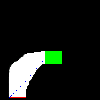

In [3]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_example.png", width=400)

#### Value function
Bellow is the average value of each possition on the track. We ignore states where the car is not moving up and to the right to decrease the noise a bit. Howerver becuase we are only covering a small fraction of the full state space during the monte carlo simulations take this value funciton with a large grain of salt.

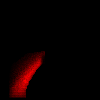

In [4]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_avg_value.png", width=400)

### Exploring Starts
I did implement a second simpler algorithm for this problem, which was on policy Monte Carlo learning a greedy policy with exploring starts. Since this algorithm always follows a greedy policy, it can have a bit of trouble getting started and is highly sensitive to the initial value given to each state. In general, I have found that it is quite a bit slower and can become unrecoverably struct. Hence the low max episode length. However, the exploring starts method covers more of the state space than the off-policy method with small epsilon.

In [5]:
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo exploring \
    --num_episodes 2000000 \
    --max_ep_len 2000 \
    --seed 42 \
    --example ./e5_12_outputs/race_track_exploring_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_exploring_avg_value.png

Creating race track env
max velocity 14
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________

_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________=================__________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________________________________________________

[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10927/2000000 recent ep len 1167.5983518343753
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11179/2000000 recent ep len 1186.0372234913136
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11466/2000000 recent ep len 1146.0107611352762
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11742/2000000 recent ep len 1131.1980930617483
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11994/2000000 recent ep len 1136.773113110161
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12272/2000000 recent ep len 1133.1599240302073
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12513/2000000 recent ep len 1121.6613466807742
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12726/2000000 recent ep len 1128.7474158223183
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12954/2000000 recent ep len 1120.9066745816635
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   13184/2000000 recent ep len 1110.03381

[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27535/2000000 recent ep len 1138.2786092064637
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27852/2000000 recent ep len 1097.3864414771901
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28157/2000000 recent ep len 1080.418796597738
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28470/2000000 recent ep len 1061.9859437305863
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28767/2000000 recent ep len 1075.156092520917
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29062/2000000 recent ep len 1085.3301297670453
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29376/2000000 recent ep len 1070.8437850546868
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29659/2000000 recent ep len 1076.806312755395
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29933/2000000 recent ep len 1091.1853580311442
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   30215/2000000 recent ep len 1090.7187302

[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   43838/2000000 recent ep len 1097.9064690126152
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   44070/2000000 recent ep len 1119.3931073091417
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   44332/2000000 recent ep len 1095.1779557651957
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   44599/2000000 recent ep len 1092.713202759701
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   44835/2000000 recent ep len 1119.4976837624913
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45053/2000000 recent ep len 1116.4423842921587
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45235/2000000 recent ep len 1097.404326474425
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45485/2000000 recent ep len 1097.2170122504635
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45706/2000000 recent ep len 1091.0656855396437
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45922/2000000 recent ep len 1098.446106

[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   57364/2000000 recent ep len 1112.6447633182559
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   57603/2000000 recent ep len 1105.9416461109722
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   57821/2000000 recent ep len 1107.368686693175
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58036/2000000 recent ep len 1091.0582831612687
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58263/2000000 recent ep len 1087.2703469571436
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58488/2000000 recent ep len 1092.3159730572334
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58671/2000000 recent ep len 1084.4105618420137
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58857/2000000 recent ep len 1099.3951010298438
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59043/2000000 recent ep len 1100.8126819713348
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59261/2000000 recent ep len 1083.68983

[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   70996/2000000 recent ep len 1083.9748237808215
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71468/2000000 recent ep len 710.2854318650988
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71945/2000000 recent ep len 475.80980295858353
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72411/2000000 recent ep len 333.7054752872197
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72910/2000000 recent ep len 236.91089242051765
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   73398/2000000 recent ep len 179.90004962002624
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   73882/2000000 recent ep len 147.16323559901468
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   74372/2000000 recent ep len 128.39021832707246
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   74838/2000000 recent ep len 114.84745716815804
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   75296/2000000 recent ep len 107.5855323

[00:00:24] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98721/2000000 recent ep len 95.90987548612087
[00:00:24] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99111/2000000 recent ep len 93.99429352786834
[00:00:24] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99434/2000000 recent ep len 94.30653469728193
[00:00:24] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99743/2000000 recent ep len 97.95486667844284
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100147/2000000 recent ep len 99.11739023740172
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100574/2000000 recent ep len 96.7844351502651
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100972/2000000 recent ep len 95.16942254438509
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101403/2000000 recent ep len 91.94637549535253
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101838/2000000 recent ep len 90.99237022151209
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  102251/2000000 recent ep len 91.7788917066776
[0

[00:00:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  129052/2000000 recent ep len 91.9489103332306
[00:00:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  129567/2000000 recent ep len 93.08192332368068
[00:00:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130077/2000000 recent ep len 97.23108246759477
[00:00:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130583/2000000 recent ep len 98.18527495397883
[00:00:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131114/2000000 recent ep len 96.01832824945308
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131629/2000000 recent ep len 97.25159901063817
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132170/2000000 recent ep len 95.4136459669919
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132701/2000000 recent ep len 94.85827791719834
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  133235/2000000 recent ep len 93.48933613118724
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  133788/2000000 recent ep len 91.39007579730037
[0

[00:00:32] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  162407/2000000 recent ep len 95.16197524277814
[00:00:32] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  162915/2000000 recent ep len 95.15055811281759
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163429/2000000 recent ep len 94.70184403328885
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163965/2000000 recent ep len 92.8681687314846
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  164484/2000000 recent ep len 94.68202355134285
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  165013/2000000 recent ep len 94.24688381426832
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  165536/2000000 recent ep len 94.14950186601675
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166040/2000000 recent ep len 96.86027101471537
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166561/2000000 recent ep len 95.57729026014287
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167077/2000000 recent ep len 94.31063097340703
[

[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  195255/2000000 recent ep len 96.90356237303635
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  195755/2000000 recent ep len 93.93081520591203
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196266/2000000 recent ep len 91.96223362531228
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196775/2000000 recent ep len 92.30690231699131
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197303/2000000 recent ep len 90.8224598879047
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197819/2000000 recent ep len 92.44853562506454
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198285/2000000 recent ep len 94.93048228026568
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198809/2000000 recent ep len 92.44214418048682
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  199334/2000000 recent ep len 91.1601952182075
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  199845/2000000 recent ep len 91.70178160635075
[0

[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228288/2000000 recent ep len 93.48009844286005
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228647/2000000 recent ep len 94.84363306690997
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229113/2000000 recent ep len 95.332926126796
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229651/2000000 recent ep len 92.32829791283957
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230178/2000000 recent ep len 92.67460161017921
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230713/2000000 recent ep len 92.37375541690982
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  231235/2000000 recent ep len 91.76038214847149
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  231755/2000000 recent ep len 96.09183743823661
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  232296/2000000 recent ep len 94.34357797979025
[00:00:41] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  232836/2000000 recent ep len 92.90454993613378
[0

[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  261469/2000000 recent ep len 92.08170870510394
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262005/2000000 recent ep len 92.00957335362648
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262532/2000000 recent ep len 91.4825332405747
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263019/2000000 recent ep len 96.30981242953939
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263530/2000000 recent ep len 97.52976568467628
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264054/2000000 recent ep len 96.80127861672968
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264574/2000000 recent ep len 96.42018592847155
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  265118/2000000 recent ep len 94.97625507057657
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  265654/2000000 recent ep len 93.48642505851981
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  266196/2000000 recent ep len 92.17779132907053
[

[00:00:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295001/2000000 recent ep len 91.82690709452353
[00:00:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295534/2000000 recent ep len 94.08251326976351
[00:00:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296093/2000000 recent ep len 91.16646383447397
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296640/2000000 recent ep len 90.66310338977067
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  297178/2000000 recent ep len 91.31960205247404
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  297701/2000000 recent ep len 92.32838293457469
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  298214/2000000 recent ep len 94.60176030659797
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  298743/2000000 recent ep len 93.82791816776806
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  299280/2000000 recent ep len 93.18832007174873
[00:00:50] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  299791/2000000 recent ep len 92.62712374594898


[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  328587/2000000 recent ep len 93.49893372150467
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  329119/2000000 recent ep len 95.36551406396553
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  329662/2000000 recent ep len 92.98495196539162
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  330188/2000000 recent ep len 94.64233195184976
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  330737/2000000 recent ep len 92.28616568263759
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  331291/2000000 recent ep len 90.35176414683421
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  331849/2000000 recent ep len 88.72195398908224
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  332379/2000000 recent ep len 91.75447974492468
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  332919/2000000 recent ep len 91.36782966555678
[00:00:54] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  333433/2000000 recent ep len 92.27007377466452


[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  362605/2000000 recent ep len 92.82839144667437
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  363124/2000000 recent ep len 94.00145318416287
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  363670/2000000 recent ep len 91.05226755031123
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364213/2000000 recent ep len 90.00457718724286
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364744/2000000 recent ep len 92.49711048283727
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365253/2000000 recent ep len 94.59705666680344
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365779/2000000 recent ep len 95.66040579613981
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366318/2000000 recent ep len 94.67272513917045
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366794/2000000 recent ep len 97.28859461941306
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  367329/2000000 recent ep len 94.60824371144741


[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  396588/2000000 recent ep len 95.8170693153559
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  397116/2000000 recent ep len 92.93220391305499
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  397628/2000000 recent ep len 94.33696580078063
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398164/2000000 recent ep len 91.22238778040719
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398663/2000000 recent ep len 92.51530735976212
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399213/2000000 recent ep len 89.22642277472107
[00:01:02] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399751/2000000 recent ep len 90.27705162906699
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  400279/2000000 recent ep len 91.51498097534802
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  400807/2000000 recent ep len 92.5026720801071
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401342/2000000 recent ep len 91.92045602336901
[0

[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  430208/2000000 recent ep len 93.85225057249616
[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  430665/2000000 recent ep len 94.52183030368103
[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  431115/2000000 recent ep len 95.18383544233544
[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  431652/2000000 recent ep len 95.48642719123052
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  432175/2000000 recent ep len 94.45203730269517
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  432708/2000000 recent ep len 93.57356576032655
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433222/2000000 recent ep len 92.82017749001378
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433712/2000000 recent ep len 96.66422102622522
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434221/2000000 recent ep len 97.7194134455902
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434737/2000000 recent ep len 96.79902853704571
[

[00:01:10] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  463334/2000000 recent ep len 91.48553858096238
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  463866/2000000 recent ep len 89.83514367547599
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  464390/2000000 recent ep len 90.2398052032996
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  464916/2000000 recent ep len 89.9654113422847
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  465429/2000000 recent ep len 91.46765697391346
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  465946/2000000 recent ep len 93.66783684135184
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  466455/2000000 recent ep len 94.42587903635369
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  466957/2000000 recent ep len 94.88151833423122
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  467462/2000000 recent ep len 96.1594224193828
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  467994/2000000 recent ep len 92.63774006249173
[00

[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  496155/2000000 recent ep len 92.33331816075088
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  496666/2000000 recent ep len 92.66690542619294
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  497188/2000000 recent ep len 91.66637664228509
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  497711/2000000 recent ep len 92.00547683407143
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  498234/2000000 recent ep len 92.03829170009148
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  498754/2000000 recent ep len 91.13942886928386
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  499281/2000000 recent ep len 89.73831647523812
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  499799/2000000 recent ep len 91.87334277139608
[00:01:15] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  500315/2000000 recent ep len 91.69172635350871
[00:01:15] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  500828/2000000 recent ep len 90.6261049021786
[

[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  528913/2000000 recent ep len 94.7386427106293
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  529414/2000000 recent ep len 94.10718390851696
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  529919/2000000 recent ep len 93.69008755357746
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  530420/2000000 recent ep len 95.03668665774413
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  530934/2000000 recent ep len 95.24918389751073
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  531442/2000000 recent ep len 95.69770938566532
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  531958/2000000 recent ep len 92.68791887438606
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  532497/2000000 recent ep len 89.29623852715906
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533020/2000000 recent ep len 90.05522901423807
[00:01:20] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533546/2000000 recent ep len 90.71661033596105
[

[00:01:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  562177/2000000 recent ep len 90.3557876372823
[00:01:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  562713/2000000 recent ep len 90.56663880568165
[00:01:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  563245/2000000 recent ep len 92.23358581574398
[00:01:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  563795/2000000 recent ep len 91.78084833786176
[00:01:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  564337/2000000 recent ep len 93.08509218482511
[00:01:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  564879/2000000 recent ep len 92.53439255330196
[00:01:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  565428/2000000 recent ep len 90.16146553879405
[00:01:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  565954/2000000 recent ep len 90.94404060586372
[00:01:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  566492/2000000 recent ep len 92.19903113403103
[00:01:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  567039/2000000 recent ep len 91.37865380742541
[

[00:01:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  596547/2000000 recent ep len 95.01393688850183
[00:01:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  597106/2000000 recent ep len 93.1627841914663
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  597657/2000000 recent ep len 92.90360977643945
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  598214/2000000 recent ep len 92.36945038122633
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  598775/2000000 recent ep len 89.75990329457888
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599316/2000000 recent ep len 92.08694573145891
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599861/2000000 recent ep len 91.3061982195051
[00:01:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600419/2000000 recent ep len 90.18603709067354
[00:01:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600984/2000000 recent ep len 88.02048180466117
[00:01:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  601535/2000000 recent ep len 88.19686524425454
[0

[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  631017/2000000 recent ep len 89.37306370968228
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  631530/2000000 recent ep len 88.51150003220593
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  632088/2000000 recent ep len 88.59432686664334
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  632655/2000000 recent ep len 87.46144082383252
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  633202/2000000 recent ep len 88.36664093754445
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  633744/2000000 recent ep len 90.48296987894726
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  634278/2000000 recent ep len 92.76966008421368
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  634838/2000000 recent ep len 90.38041697865967
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635374/2000000 recent ep len 91.4058099913084
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635913/2000000 recent ep len 91.41973607016348
[

[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  665496/2000000 recent ep len 89.32904394355079
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666039/2000000 recent ep len 89.69255784237953
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666573/2000000 recent ep len 90.93419037605817
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  667139/2000000 recent ep len 88.83421545001319
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  667697/2000000 recent ep len 87.57866854669545
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  668244/2000000 recent ep len 88.6666158983264
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  668790/2000000 recent ep len 90.1388999027806
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  669326/2000000 recent ep len 91.08751682658925
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  669874/2000000 recent ep len 91.01368156191415
[00:01:36] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  670440/2000000 recent ep len 89.12570156696951
[0

[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  700119/2000000 recent ep len 92.28456359922741
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  700654/2000000 recent ep len 92.97954809965758
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  701193/2000000 recent ep len 92.03675189327159
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  701730/2000000 recent ep len 90.13595988481808
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  702260/2000000 recent ep len 90.48240581499441
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  702797/2000000 recent ep len 90.76917190613598
[00:01:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  703347/2000000 recent ep len 90.0468208033012
[00:01:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  703883/2000000 recent ep len 92.16691839893925
[00:01:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  704442/2000000 recent ep len 92.14788334912659
[00:01:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  704981/2000000 recent ep len 92.47434543222023
[

[00:01:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  734610/2000000 recent ep len 89.22437163710323
[00:01:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  735149/2000000 recent ep len 90.27599718356129
[00:01:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  735706/2000000 recent ep len 89.08713277313825
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  736236/2000000 recent ep len 92.02895936922735
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  736753/2000000 recent ep len 93.37353920701024
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  737275/2000000 recent ep len 91.78981113644959
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  737801/2000000 recent ep len 90.38374243239305
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  738332/2000000 recent ep len 89.48369705387866
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  738854/2000000 recent ep len 90.10653689895682
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  739384/2000000 recent ep len 91.33357569990125


[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  768401/2000000 recent ep len 92.49496083941283
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  768930/2000000 recent ep len 92.2081437904027
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  769480/2000000 recent ep len 89.5132110727095
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  770020/2000000 recent ep len 88.96143209881345
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  770576/2000000 recent ep len 86.96790219076463
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  771108/2000000 recent ep len 88.89405216677844
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  771646/2000000 recent ep len 89.23139171113151
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  772173/2000000 recent ep len 91.02020722361617
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  772715/2000000 recent ep len 91.24402929670997
[00:01:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  773258/2000000 recent ep len 90.16758797601958
[0

[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  802355/2000000 recent ep len 90.66892407645659
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  802886/2000000 recent ep len 91.39504971659989
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  803414/2000000 recent ep len 94.16332154910026
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  803956/2000000 recent ep len 93.52461090805714
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  804510/2000000 recent ep len 90.22218338242806
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  805046/2000000 recent ep len 92.56227584650382
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  805600/2000000 recent ep len 90.87441666270516
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  806132/2000000 recent ep len 92.46296813064376
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  806602/2000000 recent ep len 92.61035944025471
[00:01:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  807126/2000000 recent ep len 93.0353269827525
[

[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  836574/2000000 recent ep len 86.98537870630788
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  837116/2000000 recent ep len 88.50913502379758
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  837651/2000000 recent ep len 87.34748800728549
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  838193/2000000 recent ep len 89.24715268802645
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  838735/2000000 recent ep len 89.63961716867598
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  839287/2000000 recent ep len 86.87623797679338
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  839820/2000000 recent ep len 89.49429992014825
[00:01:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  840368/2000000 recent ep len 89.52358801353088
[00:01:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  840922/2000000 recent ep len 87.32972973040985
[00:01:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  841470/2000000 recent ep len 88.0983231674642
[

[00:02:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  870438/2000000 recent ep len 91.45776954075538
[00:02:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  870961/2000000 recent ep len 90.75005349941598
[00:02:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871516/2000000 recent ep len 90.5868262962261
[00:02:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872053/2000000 recent ep len 91.94553258440088
[00:02:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872593/2000000 recent ep len 92.98330671904282
[00:02:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  873153/2000000 recent ep len 89.44976117033731
[00:02:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  873690/2000000 recent ep len 90.87789109840794
[00:02:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  874247/2000000 recent ep len 89.75133516361599
[00:02:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  874795/2000000 recent ep len 87.63034566310522
[00:02:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  875314/2000000 recent ep len 91.50691096465368
[

[00:02:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  901462/2000000 recent ep len 88.0227377397656
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  901882/2000000 recent ep len 88.40952262039667
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  902314/2000000 recent ep len 90.1961396714022
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  902786/2000000 recent ep len 89.71027287928796
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  903213/2000000 recent ep len 89.93307931525341
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  903679/2000000 recent ep len 90.41931709774619
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  904128/2000000 recent ep len 88.77875397596154
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  904587/2000000 recent ep len 89.24324250641563
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  905039/2000000 recent ep len 88.30456390455038
[00:02:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  905446/2000000 recent ep len 89.89292415715938
[0

[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929111/2000000 recent ep len 90.51899112667653
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929580/2000000 recent ep len 89.97806833597161
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  930132/2000000 recent ep len 89.61119697161297
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  930617/2000000 recent ep len 92.24801483131878
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  931125/2000000 recent ep len 88.36513960146965
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  931683/2000000 recent ep len 89.4571265404817
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  932089/2000000 recent ep len 90.2132026609102
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  932565/2000000 recent ep len 89.69209533461836
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  933042/2000000 recent ep len 90.66902645306695
[00:02:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  933567/2000000 recent ep len 89.01314225863729
[0

[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  958412/2000000 recent ep len 95.08593570844808
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  958927/2000000 recent ep len 93.09887593376956
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  959378/2000000 recent ep len 93.45142777796285
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  959861/2000000 recent ep len 92.40620687915226
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  960330/2000000 recent ep len 90.42827564252009
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  960866/2000000 recent ep len 87.65083609943173
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  961354/2000000 recent ep len 89.6326056761762
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  961892/2000000 recent ep len 90.6076391750159
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  962407/2000000 recent ep len 93.9156140248861
[00:02:14] ███████████████████░░░░░░░░░░░░░░░░░░░░░  962943/2000000 recent ep len 93.32770680811956
[00

[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  989479/2000000 recent ep len 89.96235421280043
[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  990003/2000000 recent ep len 90.96587962570547
[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  990523/2000000 recent ep len 90.69331352447286
[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  991052/2000000 recent ep len 88.95980314268137
[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  991511/2000000 recent ep len 90.76865978719859
[00:02:18] ███████████████████░░░░░░░░░░░░░░░░░░░░░  991917/2000000 recent ep len 91.10158614073617
[00:02:19] ███████████████████░░░░░░░░░░░░░░░░░░░░░  992432/2000000 recent ep len 92.37751538547846
[00:02:19] ███████████████████░░░░░░░░░░░░░░░░░░░░░  992954/2000000 recent ep len 93.32498116360297
[00:02:19] ███████████████████░░░░░░░░░░░░░░░░░░░░░  993445/2000000 recent ep len 91.27537322322917
[00:02:19] ███████████████████░░░░░░░░░░░░░░░░░░░░░  993879/2000000 recent ep len 90.7601786594378
[

[00:02:22] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1022092/2000000 recent ep len 85.35826276487929
[00:02:22] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1022634/2000000 recent ep len 86.8860550235447
[00:02:22] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1022919/2000000 recent ep len 89.08527563315012
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023211/2000000 recent ep len 89.40196314731664
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023617/2000000 recent ep len 86.95898277751064
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1024146/2000000 recent ep len 88.43778067698244
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1024687/2000000 recent ep len 88.59297854310638
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1025213/2000000 recent ep len 88.24279944576024
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1025748/2000000 recent ep len 88.79998544050807
[00:02:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1026240/2000000 recent ep len 87.08472059587803
[

[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1054447/2000000 recent ep len 88.86749406658608
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1054941/2000000 recent ep len 89.33615961188504
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1055438/2000000 recent ep len 90.97217708910588
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1055947/2000000 recent ep len 90.57669011285122
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1056455/2000000 recent ep len 90.11389196551227
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1056969/2000000 recent ep len 91.1014145081137
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1057434/2000000 recent ep len 92.14703854510088
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1057940/2000000 recent ep len 92.41160850589884
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1058456/2000000 recent ep len 91.75589459728916
[00:02:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 1058984/2000000 recent ep len 91.4544033817579
[0

[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1082715/2000000 recent ep len 88.0870926766299
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1083086/2000000 recent ep len 87.61503431825663
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1083358/2000000 recent ep len 86.71258625201786
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1083609/2000000 recent ep len 87.97374838511952
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1083912/2000000 recent ep len 87.80669979420287
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1084245/2000000 recent ep len 89.74654793521012
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1084615/2000000 recent ep len 89.54766093715058
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1084996/2000000 recent ep len 91.06507195615157
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1085392/2000000 recent ep len 88.97367697565421
[00:02:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 1085761/2000000 recent ep len 87.90656502617732
[

[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112113/2000000 recent ep len 87.17768672826658
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112623/2000000 recent ep len 90.06119860311838
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113155/2000000 recent ep len 90.12160537746085
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113686/2000000 recent ep len 89.57615488899354
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114144/2000000 recent ep len 90.26837292961731
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114680/2000000 recent ep len 91.32778188270619
[00:02:35] ██████████████████████░░░░░░░░░░░░░░░░░░ 1115207/2000000 recent ep len 90.39547918393662
[00:02:36] ██████████████████████░░░░░░░░░░░░░░░░░░ 1115739/2000000 recent ep len 89.66656828461217
[00:02:36] ██████████████████████░░░░░░░░░░░░░░░░░░ 1116184/2000000 recent ep len 90.05238484253208
[00:02:36] ██████████████████████░░░░░░░░░░░░░░░░░░ 1116627/2000000 recent ep len 91.09215793317395


[00:02:39] ██████████████████████░░░░░░░░░░░░░░░░░░ 1145301/2000000 recent ep len 89.18303279710253
[00:02:39] ██████████████████████░░░░░░░░░░░░░░░░░░ 1145732/2000000 recent ep len 88.92259360737434
[00:02:39] ██████████████████████░░░░░░░░░░░░░░░░░░ 1146283/2000000 recent ep len 90.69701976523092
[00:02:39] ██████████████████████░░░░░░░░░░░░░░░░░░ 1146819/2000000 recent ep len 90.71597911213671
[00:02:40] ██████████████████████░░░░░░░░░░░░░░░░░░ 1147329/2000000 recent ep len 92.8908852369771
[00:02:40] ██████████████████████░░░░░░░░░░░░░░░░░░ 1147869/2000000 recent ep len 90.40747599501863
[00:02:40] ██████████████████████░░░░░░░░░░░░░░░░░░ 1148403/2000000 recent ep len 90.31241749378209
[00:02:40] ██████████████████████░░░░░░░░░░░░░░░░░░ 1148936/2000000 recent ep len 89.2666896427691
[00:02:40] ██████████████████████░░░░░░░░░░░░░░░░░░ 1149481/2000000 recent ep len 88.85031451101784
[00:02:40] ███████████████████████░░░░░░░░░░░░░░░░░ 1150011/2000000 recent ep len 89.7236093573443
[00

[00:02:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1178512/2000000 recent ep len 88.28833195559835
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1179047/2000000 recent ep len 89.19326219277309
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1179581/2000000 recent ep len 89.51376513081259
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1180108/2000000 recent ep len 91.06181767266516
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1180641/2000000 recent ep len 90.79928183568016
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1181176/2000000 recent ep len 91.00769463134766
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1181716/2000000 recent ep len 89.54087241970464
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1182253/2000000 recent ep len 90.36369018348482
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1182781/2000000 recent ep len 90.62539624569634
[00:02:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1183307/2000000 recent ep len 91.72165016131916


[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1211939/2000000 recent ep len 89.74159104246658
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1212477/2000000 recent ep len 89.08434868963593
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1212969/2000000 recent ep len 90.91415513131986
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1213503/2000000 recent ep len 90.6541971873536
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1214042/2000000 recent ep len 88.73649360186978
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1214581/2000000 recent ep len 88.49628272219013
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1215105/2000000 recent ep len 89.59290248137546
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1215650/2000000 recent ep len 87.83444780803644
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1216181/2000000 recent ep len 88.12697981933177
[00:02:48] ████████████████████████░░░░░░░░░░░░░░░░ 1216687/2000000 recent ep len 88.28900306334651
[

[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1243257/2000000 recent ep len 86.58597701011016
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1243783/2000000 recent ep len 88.16149122652205
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1244327/2000000 recent ep len 86.94286754514562
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1244811/2000000 recent ep len 87.20593168476114
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1245325/2000000 recent ep len 90.33068657757048
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1245835/2000000 recent ep len 90.11145451502722
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1246234/2000000 recent ep len 89.96663383541484
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1246692/2000000 recent ep len 90.11611116991277
[00:02:52] ████████████████████████░░░░░░░░░░░░░░░░ 1247161/2000000 recent ep len 87.65396981565914
[00:02:53] ████████████████████████░░░░░░░░░░░░░░░░ 1247604/2000000 recent ep len 90.42329002946586


[00:02:56] █████████████████████████░░░░░░░░░░░░░░░ 1275561/2000000 recent ep len 91.67393728267476
[00:02:56] █████████████████████████░░░░░░░░░░░░░░░ 1276085/2000000 recent ep len 92.51372438744728
[00:02:56] █████████████████████████░░░░░░░░░░░░░░░ 1276580/2000000 recent ep len 94.35972178819416
[00:02:56] █████████████████████████░░░░░░░░░░░░░░░ 1277100/2000000 recent ep len 93.49676089985857
[00:02:56] █████████████████████████░░░░░░░░░░░░░░░ 1277609/2000000 recent ep len 95.09532891709866
[00:02:57] █████████████████████████░░░░░░░░░░░░░░░ 1278147/2000000 recent ep len 92.4038313031814
[00:02:57] █████████████████████████░░░░░░░░░░░░░░░ 1278667/2000000 recent ep len 92.23050332511833
[00:02:57] █████████████████████████░░░░░░░░░░░░░░░ 1279145/2000000 recent ep len 92.91469419025682
[00:02:57] █████████████████████████░░░░░░░░░░░░░░░ 1279665/2000000 recent ep len 89.57021990972345
[00:02:57] █████████████████████████░░░░░░░░░░░░░░░ 1280179/2000000 recent ep len 91.16056871046064
[

[00:03:00] ██████████████████████████░░░░░░░░░░░░░░ 1308437/2000000 recent ep len 90.91565357049956
[00:03:00] ██████████████████████████░░░░░░░░░░░░░░ 1308903/2000000 recent ep len 92.9145895219767
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1309442/2000000 recent ep len 91.15292660491991
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1309978/2000000 recent ep len 89.07035478835473
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1310511/2000000 recent ep len 87.70590260055705
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1310920/2000000 recent ep len 89.01505540935717
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1311332/2000000 recent ep len 87.03314712376545
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1311727/2000000 recent ep len 87.49193227434719
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1312212/2000000 recent ep len 91.16581442843216
[00:03:01] ██████████████████████████░░░░░░░░░░░░░░ 1312755/2000000 recent ep len 89.75001417637304
[

[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1340608/2000000 recent ep len 88.5101640710318
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1341095/2000000 recent ep len 89.95467168845231
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1341604/2000000 recent ep len 91.54160570665177
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1342146/2000000 recent ep len 88.08750407536266
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1342679/2000000 recent ep len 88.14466569444497
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1343197/2000000 recent ep len 90.12900504409974
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1343715/2000000 recent ep len 90.50382670563631
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1344253/2000000 recent ep len 88.82562449154163
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1344747/2000000 recent ep len 92.64826087126377
[00:03:05] ██████████████████████████░░░░░░░░░░░░░░ 1345144/2000000 recent ep len 91.69144536755722
[

[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1371672/2000000 recent ep len 90.3912755534961
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1372178/2000000 recent ep len 88.87193400923805
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1372701/2000000 recent ep len 89.7268631949631
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1373207/2000000 recent ep len 88.54169740766893
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1373688/2000000 recent ep len 89.18318022155708
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1374215/2000000 recent ep len 88.84430612352895
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1374712/2000000 recent ep len 91.45026978402132
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1375208/2000000 recent ep len 90.00902086841683
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1375731/2000000 recent ep len 89.46517158088807
[00:03:09] ███████████████████████████░░░░░░░░░░░░░ 1376255/2000000 recent ep len 89.83377305707214
[0

[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1402549/2000000 recent ep len 88.77089578738888
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1403053/2000000 recent ep len 90.86060989750425
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1403559/2000000 recent ep len 92.0825483226171
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1404043/2000000 recent ep len 90.32377715803159
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1404544/2000000 recent ep len 91.92009084499209
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1405043/2000000 recent ep len 91.43044406400575
[00:03:13] ████████████████████████████░░░░░░░░░░░░ 1405569/2000000 recent ep len 87.19740285040349
[00:03:14] ████████████████████████████░░░░░░░░░░░░ 1406055/2000000 recent ep len 86.7517243606552
[00:03:14] ████████████████████████████░░░░░░░░░░░░ 1406574/2000000 recent ep len 87.59028632580633
[00:03:14] ████████████████████████████░░░░░░░░░░░░ 1407086/2000000 recent ep len 88.6120436000418
[00

[00:03:17] ████████████████████████████░░░░░░░░░░░░ 1434404/2000000 recent ep len 87.65796591382743
[00:03:17] ████████████████████████████░░░░░░░░░░░░ 1434862/2000000 recent ep len 88.52346193096785
[00:03:17] ████████████████████████████░░░░░░░░░░░░ 1435391/2000000 recent ep len 88.69776892766284
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1435870/2000000 recent ep len 89.5597549949467
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1436385/2000000 recent ep len 90.61269717907977
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1436887/2000000 recent ep len 90.94842380330836
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1437420/2000000 recent ep len 88.49127691902254
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1437926/2000000 recent ep len 90.06680976500006
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1438047/2000000 recent ep len 90.03502303704605
[00:03:18] ████████████████████████████░░░░░░░░░░░░ 1438592/2000000 recent ep len 89.98060702506572
[

[00:03:22] █████████████████████████████░░░░░░░░░░░ 1468009/2000000 recent ep len 87.0198915783927
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1468577/2000000 recent ep len 86.0998939260202
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1469109/2000000 recent ep len 88.84800498693087
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1469673/2000000 recent ep len 86.96411912222129
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1470223/2000000 recent ep len 87.3519687032786
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1470704/2000000 recent ep len 88.98487531104587
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1471232/2000000 recent ep len 90.6139626401354
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1471764/2000000 recent ep len 93.30459963661909
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1472330/2000000 recent ep len 90.02525994649643
[00:03:22] █████████████████████████████░░░░░░░░░░░ 1472896/2000000 recent ep len 86.89519833743594
[00:

[00:03:26] ██████████████████████████████░░░░░░░░░░ 1501616/2000000 recent ep len 91.05044431017876
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1502144/2000000 recent ep len 90.28168295605528
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1502682/2000000 recent ep len 87.63948073566247
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1503229/2000000 recent ep len 86.19720182868276
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1503764/2000000 recent ep len 86.51627665430925
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1504282/2000000 recent ep len 88.1380313505036
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1504800/2000000 recent ep len 85.50233341191277
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1505319/2000000 recent ep len 87.36362665502433
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1505826/2000000 recent ep len 87.78586481017882
[00:03:26] ██████████████████████████████░░░░░░░░░░ 1506354/2000000 recent ep len 90.39451332595812
[

[00:03:30] ██████████████████████████████░░░░░░░░░░ 1532764/2000000 recent ep len 93.55001199728764
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1533282/2000000 recent ep len 92.35610965511044
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1533737/2000000 recent ep len 91.17197486296234
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1534146/2000000 recent ep len 90.6785017049058
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1534610/2000000 recent ep len 90.18790901968441
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1535121/2000000 recent ep len 88.06350635544666
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1535657/2000000 recent ep len 86.08634768022833
[00:03:30] ██████████████████████████████░░░░░░░░░░ 1536182/2000000 recent ep len 88.02518288350862
[00:03:31] ██████████████████████████████░░░░░░░░░░ 1536688/2000000 recent ep len 91.1317714809834
[00:03:31] ██████████████████████████████░░░░░░░░░░ 1537177/2000000 recent ep len 87.73081488845612
[0

[00:03:34] ███████████████████████████████░░░░░░░░░ 1562608/2000000 recent ep len 91.91704248803363
[00:03:34] ███████████████████████████████░░░░░░░░░ 1563119/2000000 recent ep len 90.5649947907652
[00:03:34] ███████████████████████████████░░░░░░░░░ 1563688/2000000 recent ep len 88.52291992030437
[00:03:34] ███████████████████████████████░░░░░░░░░ 1564224/2000000 recent ep len 91.39078215469208
[00:03:34] ███████████████████████████████░░░░░░░░░ 1564746/2000000 recent ep len 95.88198913984063
[00:03:35] ███████████████████████████████░░░░░░░░░ 1565286/2000000 recent ep len 92.09515679753638
[00:03:35] ███████████████████████████████░░░░░░░░░ 1565834/2000000 recent ep len 91.33122263284899
[00:03:35] ███████████████████████████████░░░░░░░░░ 1566248/2000000 recent ep len 90.79875747689587
[00:03:35] ███████████████████████████████░░░░░░░░░ 1566673/2000000 recent ep len 87.51944507442758
[00:03:35] ███████████████████████████████░░░░░░░░░ 1567068/2000000 recent ep len 87.6020036552694
[0

[00:03:38] ███████████████████████████████░░░░░░░░░ 1592903/2000000 recent ep len 92.38685920151265
[00:03:39] ███████████████████████████████░░░░░░░░░ 1593334/2000000 recent ep len 91.57423972440097
[00:03:39] ███████████████████████████████░░░░░░░░░ 1593848/2000000 recent ep len 88.57104832029356
[00:03:39] ███████████████████████████████░░░░░░░░░ 1594322/2000000 recent ep len 88.95827913393616
[00:03:39] ███████████████████████████████░░░░░░░░░ 1594778/2000000 recent ep len 88.534102483952
[00:03:39] ███████████████████████████████░░░░░░░░░ 1595308/2000000 recent ep len 88.81948884453847
[00:03:39] ███████████████████████████████░░░░░░░░░ 1595803/2000000 recent ep len 87.24954394208731
[00:03:39] ███████████████████████████████░░░░░░░░░ 1596284/2000000 recent ep len 87.7308366874128
[00:03:39] ███████████████████████████████░░░░░░░░░ 1596636/2000000 recent ep len 89.49025085511603
[00:03:39] ███████████████████████████████░░░░░░░░░ 1596925/2000000 recent ep len 88.35799630561435
[00

[00:03:43] ████████████████████████████████░░░░░░░░ 1624483/2000000 recent ep len 90.38579268397599
[00:03:43] ████████████████████████████████░░░░░░░░ 1625008/2000000 recent ep len 91.00928214827066
[00:03:43] ████████████████████████████████░░░░░░░░ 1625526/2000000 recent ep len 93.07308577880737
[00:03:43] ████████████████████████████████░░░░░░░░ 1626048/2000000 recent ep len 91.09972183758073
[00:03:43] ████████████████████████████████░░░░░░░░ 1626560/2000000 recent ep len 93.03582858416551
[00:03:43] ████████████████████████████████░░░░░░░░ 1627090/2000000 recent ep len 91.25703884507091
[00:03:43] ████████████████████████████████░░░░░░░░ 1627617/2000000 recent ep len 92.04409956263983
[00:03:43] ████████████████████████████████░░░░░░░░ 1628144/2000000 recent ep len 91.45940881813367
[00:03:43] ████████████████████████████████░░░░░░░░ 1628606/2000000 recent ep len 92.85822183193504
[00:03:43] ████████████████████████████████░░░░░░░░ 1629106/2000000 recent ep len 89.954049285541
[0

[00:03:47] █████████████████████████████████░░░░░░░ 1656900/2000000 recent ep len 85.46750199525422
[00:03:47] █████████████████████████████████░░░░░░░ 1657448/2000000 recent ep len 86.47738657421891
[00:03:47] █████████████████████████████████░░░░░░░ 1657952/2000000 recent ep len 89.3950884682153
[00:03:47] █████████████████████████████████░░░░░░░ 1658501/2000000 recent ep len 88.20084478488305
[00:03:47] █████████████████████████████████░░░░░░░ 1659036/2000000 recent ep len 90.72677654912015
[00:03:47] █████████████████████████████████░░░░░░░ 1659589/2000000 recent ep len 88.26295318797696
[00:03:47] █████████████████████████████████░░░░░░░ 1660094/2000000 recent ep len 92.6105372124771
[00:03:47] █████████████████████████████████░░░░░░░ 1660652/2000000 recent ep len 90.30949227204746
[00:03:47] █████████████████████████████████░░░░░░░ 1661215/2000000 recent ep len 88.69915000775134
[00:03:48] █████████████████████████████████░░░░░░░ 1661755/2000000 recent ep len 88.53401530932015
[0

[00:03:51] █████████████████████████████████░░░░░░░ 1691210/2000000 recent ep len 86.75118843984897
[00:03:51] █████████████████████████████████░░░░░░░ 1691602/2000000 recent ep len 89.90422904805557
[00:03:51] █████████████████████████████████░░░░░░░ 1692042/2000000 recent ep len 88.74292739424683
[00:03:51] █████████████████████████████████░░░░░░░ 1692557/2000000 recent ep len 87.50990657235285
[00:03:51] █████████████████████████████████░░░░░░░ 1693128/2000000 recent ep len 85.92478848678945
[00:03:51] █████████████████████████████████░░░░░░░ 1693686/2000000 recent ep len 85.23237015647697
[00:03:52] █████████████████████████████████░░░░░░░ 1694224/2000000 recent ep len 87.7821558815942
[00:03:52] █████████████████████████████████░░░░░░░ 1694801/2000000 recent ep len 86.3043800177823
[00:03:52] █████████████████████████████████░░░░░░░ 1695358/2000000 recent ep len 87.0293461064497
[00:03:52] █████████████████████████████████░░░░░░░ 1695915/2000000 recent ep len 87.23738545080164
[00

[00:03:55] ██████████████████████████████████░░░░░░ 1723450/2000000 recent ep len 89.47682739191536
[00:03:55] ██████████████████████████████████░░░░░░ 1723939/2000000 recent ep len 90.35418488990356
[00:03:55] ██████████████████████████████████░░░░░░ 1724411/2000000 recent ep len 87.54218667876458
[00:03:56] ██████████████████████████████████░░░░░░ 1724910/2000000 recent ep len 87.64929746458664
[00:03:56] ██████████████████████████████████░░░░░░ 1725419/2000000 recent ep len 87.32629965631688
[00:03:56] ██████████████████████████████████░░░░░░ 1725926/2000000 recent ep len 86.62888210649824
[00:03:56] ██████████████████████████████████░░░░░░ 1726365/2000000 recent ep len 88.83735523111568
[00:03:56] ██████████████████████████████████░░░░░░ 1726828/2000000 recent ep len 89.10101422960926
[00:03:56] ██████████████████████████████████░░░░░░ 1727278/2000000 recent ep len 88.76662208495263
[00:03:56] ██████████████████████████████████░░░░░░ 1727792/2000000 recent ep len 90.50965864895653


[00:04:00] ███████████████████████████████████░░░░░ 1755754/2000000 recent ep len 86.08694233262258
[00:04:00] ███████████████████████████████████░░░░░ 1756306/2000000 recent ep len 87.66895893339814
[00:04:00] ███████████████████████████████████░░░░░ 1756853/2000000 recent ep len 88.74168673525654
[00:04:00] ███████████████████████████████████░░░░░ 1757414/2000000 recent ep len 88.3493189518723
[00:04:00] ███████████████████████████████████░░░░░ 1757948/2000000 recent ep len 92.24539446238282
[00:04:00] ███████████████████████████████████░░░░░ 1758489/2000000 recent ep len 91.76782854918066
[00:04:00] ███████████████████████████████████░░░░░ 1759052/2000000 recent ep len 89.94699657523502
[00:04:00] ███████████████████████████████████░░░░░ 1759626/2000000 recent ep len 87.12182069453587
[00:04:00] ███████████████████████████████████░░░░░ 1760174/2000000 recent ep len 88.75303389052145
[00:04:00] ███████████████████████████████████░░░░░ 1760720/2000000 recent ep len 89.37212626336816
[

[00:04:04] ███████████████████████████████████░░░░░ 1788463/2000000 recent ep len 87.97743940365207
[00:04:04] ███████████████████████████████████░░░░░ 1789031/2000000 recent ep len 85.8671051526688
[00:04:04] ███████████████████████████████████░░░░░ 1789575/2000000 recent ep len 88.56502778479584
[00:04:04] ███████████████████████████████████░░░░░ 1790121/2000000 recent ep len 88.42975672732538
[00:04:04] ███████████████████████████████████░░░░░ 1790677/2000000 recent ep len 88.06972187728448
[00:04:04] ███████████████████████████████████░░░░░ 1791237/2000000 recent ep len 87.1190734415144
[00:04:04] ███████████████████████████████████░░░░░ 1791779/2000000 recent ep len 89.32577857526286
[00:04:04] ███████████████████████████████████░░░░░ 1792318/2000000 recent ep len 88.62657063751827
[00:04:04] ███████████████████████████████████░░░░░ 1792876/2000000 recent ep len 89.66994701866442
[00:04:04] ███████████████████████████████████░░░░░ 1793433/2000000 recent ep len 89.7184828673897
[00

[00:04:08] ████████████████████████████████████░░░░ 1823235/2000000 recent ep len 92.32342279221663
[00:04:08] ████████████████████████████████████░░░░ 1823788/2000000 recent ep len 94.41734165149444
[00:04:08] ████████████████████████████████████░░░░ 1824357/2000000 recent ep len 92.81680168569325
[00:04:08] ████████████████████████████████████░░░░ 1824919/2000000 recent ep len 91.09640679159241
[00:04:08] ████████████████████████████████████░░░░ 1825330/2000000 recent ep len 90.28535525831728
[00:04:08] ████████████████████████████████████░░░░ 1825820/2000000 recent ep len 89.19785046039863
[00:04:08] ████████████████████████████████████░░░░ 1826374/2000000 recent ep len 88.53491254751759
[00:04:09] ████████████████████████████████████░░░░ 1826931/2000000 recent ep len 86.77215968594379
[00:04:09] ████████████████████████████████████░░░░ 1827494/2000000 recent ep len 87.5139154706181
[00:04:09] ████████████████████████████████████░░░░ 1828058/2000000 recent ep len 87.61941814619813
[

[00:04:12] █████████████████████████████████████░░░ 1858448/2000000 recent ep len 87.11045906105993
[00:04:12] █████████████████████████████████████░░░ 1858863/2000000 recent ep len 87.98165644799974
[00:04:12] █████████████████████████████████████░░░ 1859400/2000000 recent ep len 88.84385979516777
[00:04:12] █████████████████████████████████████░░░ 1859970/2000000 recent ep len 87.39950707547189
[00:04:13] █████████████████████████████████████░░░ 1860514/2000000 recent ep len 87.93684655434949
[00:04:13] █████████████████████████████████████░░░ 1861084/2000000 recent ep len 87.26244098987569
[00:04:13] █████████████████████████████████████░░░ 1861651/2000000 recent ep len 88.55021751154975
[00:04:13] █████████████████████████████████████░░░ 1862177/2000000 recent ep len 91.91134999263754
[00:04:13] █████████████████████████████████████░░░ 1862710/2000000 recent ep len 91.38563562281425
[00:04:13] █████████████████████████████████████░░░ 1863259/2000000 recent ep len 91.90595974917656


[00:04:17] █████████████████████████████████████░░░ 1892277/2000000 recent ep len 86.93259552970373
[00:04:17] █████████████████████████████████████░░░ 1892710/2000000 recent ep len 87.57329399410463
[00:04:17] █████████████████████████████████████░░░ 1893248/2000000 recent ep len 86.26986590397382
[00:04:17] █████████████████████████████████████░░░ 1893824/2000000 recent ep len 86.15796424992183
[00:04:17] █████████████████████████████████████░░░ 1894337/2000000 recent ep len 84.58998168498707
[00:04:17] █████████████████████████████████████░░░ 1894759/2000000 recent ep len 86.56470816213319
[00:04:17] █████████████████████████████████████░░░ 1895187/2000000 recent ep len 86.97926840473487
[00:04:17] █████████████████████████████████████░░░ 1895661/2000000 recent ep len 87.0838433506499
[00:04:17] █████████████████████████████████████░░░ 1896218/2000000 recent ep len 89.0131755934724
[00:04:17] █████████████████████████████████████░░░ 1896729/2000000 recent ep len 88.89182249127792
[0

[00:04:21] ██████████████████████████████████████░░ 1921339/2000000 recent ep len 88.60313740072687
[00:04:21] ██████████████████████████████████████░░ 1921838/2000000 recent ep len 87.67574138863928
[00:04:21] ██████████████████████████████████████░░ 1922281/2000000 recent ep len 87.16531944549801
[00:04:21] ██████████████████████████████████████░░ 1922697/2000000 recent ep len 86.39460378543038
[00:04:21] ██████████████████████████████████████░░ 1923109/2000000 recent ep len 85.29470087387746
[00:04:21] ██████████████████████████████████████░░ 1923520/2000000 recent ep len 85.84807070397109
[00:04:21] ██████████████████████████████████████░░ 1923917/2000000 recent ep len 86.82627442145751
[00:04:21] ██████████████████████████████████████░░ 1924351/2000000 recent ep len 86.72902196826143
[00:04:21] ██████████████████████████████████████░░ 1924885/2000000 recent ep len 89.84092207071319
[00:04:21] ██████████████████████████████████████░░ 1925414/2000000 recent ep len 89.63454773132601


[00:04:25] ███████████████████████████████████████░ 1952512/2000000 recent ep len 88.71680931578898
[00:04:25] ███████████████████████████████████████░ 1953064/2000000 recent ep len 89.2321588421477
[00:04:25] ███████████████████████████████████████░ 1953557/2000000 recent ep len 90.10470973570668
[00:04:25] ███████████████████████████████████████░ 1954066/2000000 recent ep len 89.33731578679713
[00:04:25] ███████████████████████████████████████░ 1954610/2000000 recent ep len 86.98735510026258
[00:04:25] ███████████████████████████████████████░ 1955084/2000000 recent ep len 89.78430772731261
[00:04:25] ███████████████████████████████████████░ 1955636/2000000 recent ep len 87.61721356089491
[00:04:25] ███████████████████████████████████████░ 1956210/2000000 recent ep len 86.78712030714227
[00:04:25] ███████████████████████████████████████░ 1956805/2000000 recent ep len 84.45018697300503
[00:04:26] ███████████████████████████████████████░ 1957370/2000000 recent ep len 85.98982567668565
[

[00:04:29] ███████████████████████████████████████░ 1985707/2000000 recent ep len 87.54534146403951
[00:04:29] ███████████████████████████████████████░ 1986129/2000000 recent ep len 87.96632125247002
[00:04:29] ███████████████████████████████████████░ 1986631/2000000 recent ep len 88.84177932870833
[00:04:29] ███████████████████████████████████████░ 1987210/2000000 recent ep len 86.79810410776663
[00:04:29] ███████████████████████████████████████░ 1987775/2000000 recent ep len 85.97539600100008
[00:04:30] ███████████████████████████████████████░ 1988328/2000000 recent ep len 87.90762223909685
[00:04:30] ███████████████████████████████████████░ 1988857/2000000 recent ep len 87.98363773463899
[00:04:30] ███████████████████████████████████████░ 1989414/2000000 recent ep len 86.58341006558513
[00:04:30] ███████████████████████████████████████░ 1989937/2000000 recent ep len 85.17885009752997
[00:04:30] ███████████████████████████████████████░ 1990456/2000000 recent ep len 88.13552336105093


avg values where in the range [-1062.1930835205903, -675.5952245244976]
Complete!


#### Example path
Again a sample path following the optimal policy.

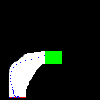

In [6]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_example.png", width=400)

#### Value function
This was computed using the exact same method as the above value function.

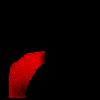

In [7]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_avg_value.png", width=400)

## A Larger Example
Using the off-policy method, we can move to an even larger state space than seen in the textbook. This problem requires careful hyperparameter tunning and a longer run of 5,000,000 episodes to get reliable convergence.


In [ ]:
!./e5_12/target/release/main --track ./e5_12_tracks/complex_track.png \
    --algo off-policy \
    --epsilon 0.08 \
    --seed 42 \
    --num_episodes 5000000 \
    --example ./e5_12_outputs/complex_track_off-policy_example.png \
    --value 0 10 -10 10 ./e5_12_outputs/complex_track_off-policy_avg_value.png

Creating race track env
max velocity 20
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________________________

__________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX__________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________
________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________
_______________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________________

_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX______________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
__________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________

[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      21/5000000 recent ep len 21090.00916611702
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      22/5000000 recent ep len 21265.85924279395
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      25/5000000 recent ep len 21347.019677167606
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      27/5000000 recent ep len 21440.73194783295
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      31/5000000 recent ep len 21636.11531409674
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      35/5000000 recent ep len 21752.546957084174
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      39/5000000 recent ep len 22167.503986746407
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      44/5000000 recent ep len 22222.97639208677
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      48/5000000 recent ep len 22376.10697891723
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      50/5000000 recent ep len 22491.493623066

[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     469/5000000 recent ep len 21900.52452763279
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     486/5000000 recent ep len 21659.981935793716
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     502/5000000 recent ep len 21433.423529375395
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     516/5000000 recent ep len 21326.724938489704
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     528/5000000 recent ep len 21202.119634272352
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     546/5000000 recent ep len 20989.272265224434
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     570/5000000 recent ep len 20643.696596307982
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     593/5000000 recent ep len 20323.665341103504
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     610/5000000 recent ep len 20152.75599168618
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     634/5000000 recent ep len 19814.85843

[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2541/5000000 recent ep len 5503.935274335154
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2584/5000000 recent ep len 5370.789175872611
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2636/5000000 recent ep len 5202.652739788416
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2711/5000000 recent ep len 4971.795663585458
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2777/5000000 recent ep len 4780.042350394441
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2825/5000000 recent ep len 4656.1155706901345
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2882/5000000 recent ep len 4501.850706531876
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2947/5000000 recent ep len 4336.567038504809
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3011/5000000 recent ep len 4181.296108653202
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3072/5000000 recent ep len 4052.500135134400

[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7214/5000000 recent ep len 1150.3285592200052
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7310/5000000 recent ep len 1135.6788776500305
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7407/5000000 recent ep len 1117.0136324269733
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7515/5000000 recent ep len 1094.1367848328607
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7625/5000000 recent ep len 1083.8736659835943
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7726/5000000 recent ep len 1077.5382817707107
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7824/5000000 recent ep len 1054.0060728017065
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    7938/5000000 recent ep len 1041.1581652062566
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    8052/5000000 recent ep len 1013.7795046127511
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    8170/5000000 recent ep len 992.15994

[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   15736/5000000 recent ep len 549.882528447947
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   15898/5000000 recent ep len 539.0353275543196
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16051/5000000 recent ep len 539.0794001471929
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16222/5000000 recent ep len 534.5196317240018
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16364/5000000 recent ep len 537.8521797947734
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16518/5000000 recent ep len 533.2450502253698
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16682/5000000 recent ep len 526.6593763448013
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16862/5000000 recent ep len 514.6659484450278
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17030/5000000 recent ep len 506.774916963116
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17194/5000000 recent ep len 502.5951564371153
[0

[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26788/5000000 recent ep len 377.3292555011873
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26982/5000000 recent ep len 378.0840592973236
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27124/5000000 recent ep len 380.6262737006645
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27300/5000000 recent ep len 385.70004266349287
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27498/5000000 recent ep len 393.09994448824557
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27683/5000000 recent ep len 394.685242431553
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   27865/5000000 recent ep len 397.20730446854327
[00:00:24] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28075/5000000 recent ep len 393.18271001960085
[00:00:24] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28262/5000000 recent ep len 392.4024995968265
[00:00:24] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   28445/5000000 recent ep len 393.27305495367

[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   39201/5000000 recent ep len 327.233091478105
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   39408/5000000 recent ep len 327.0748068798663
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   39616/5000000 recent ep len 323.37141367643994
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   39837/5000000 recent ep len 315.03748590346686
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   40046/5000000 recent ep len 321.1972092342376
[00:00:28] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   40261/5000000 recent ep len 323.3675191394572
[00:00:28] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   40460/5000000 recent ep len 324.97197012010315
[00:00:28] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   40660/5000000 recent ep len 330.0255516769304
[00:00:28] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   40886/5000000 recent ep len 325.06607564146384
[00:00:28] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   41094/5000000 recent ep len 327.89517861352

[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53002/5000000 recent ep len 273.78820672949854
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53231/5000000 recent ep len 274.00911458863186
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53486/5000000 recent ep len 271.8712223122257
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53715/5000000 recent ep len 273.0332857313347
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53958/5000000 recent ep len 267.8213990118828
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54192/5000000 recent ep len 272.9698865471201
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54436/5000000 recent ep len 273.487506778352
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54675/5000000 recent ep len 269.88204576984873
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54900/5000000 recent ep len 272.6285662110817
[00:00:32] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   55131/5000000 recent ep len 279.205310295982

[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68097/5000000 recent ep len 235.66031669893263
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68321/5000000 recent ep len 240.42640202762203
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68566/5000000 recent ep len 237.87943784421674
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68830/5000000 recent ep len 240.7774338970865
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   69076/5000000 recent ep len 240.2123867687322
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   69314/5000000 recent ep len 239.80792205872922
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   69556/5000000 recent ep len 239.0913313646288
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   69818/5000000 recent ep len 234.59708079281268
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   70071/5000000 recent ep len 229.00671317142493
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   70319/5000000 recent ep len 229.34444405

[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   83839/5000000 recent ep len 210.63413374724186
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84104/5000000 recent ep len 214.39650245299913
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84360/5000000 recent ep len 214.07981631740492
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84620/5000000 recent ep len 209.49031719671032
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84869/5000000 recent ep len 208.34305584253082
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85125/5000000 recent ep len 211.34323704833392
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85386/5000000 recent ep len 209.64672549066464
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85637/5000000 recent ep len 214.37889970987757
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85900/5000000 recent ep len 213.35598036147084
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   86143/5000000 recent ep len 211.00218

[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99994/5000000 recent ep len 201.79817981037777
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100238/5000000 recent ep len 204.21465232647972
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100512/5000000 recent ep len 201.91094583608046
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100785/5000000 recent ep len 203.4490926323839
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101045/5000000 recent ep len 206.5407333409089
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101306/5000000 recent ep len 206.1929304368946
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101580/5000000 recent ep len 205.0211024106221
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  101842/5000000 recent ep len 201.50771696195324
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  102108/5000000 recent ep len 198.78260799669746
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  102400/5000000 recent ep len 199.193654699

[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  116486/5000000 recent ep len 200.33208442075136
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  116766/5000000 recent ep len 199.98553660851192
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  117044/5000000 recent ep len 198.77731874268204
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  117325/5000000 recent ep len 196.76967123095807
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  117590/5000000 recent ep len 197.03380668279112
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  117835/5000000 recent ep len 198.77603312587075
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  118109/5000000 recent ep len 197.96865508993326
[00:00:49] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  118414/5000000 recent ep len 193.53266253051376
[00:00:49] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  118692/5000000 recent ep len 192.00908048935952
[00:00:49] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  118980/5000000 recent ep len 191.74221

[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  134014/5000000 recent ep len 179.55073851663045
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  134288/5000000 recent ep len 176.75344624274578
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  134572/5000000 recent ep len 174.52584848804412
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  134783/5000000 recent ep len 174.67706272280057
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  135070/5000000 recent ep len 174.89810104735363
[00:00:53] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  135366/5000000 recent ep len 177.4970492868111
[00:00:53] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  135633/5000000 recent ep len 174.95574553584188
[00:00:53] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  135879/5000000 recent ep len 175.38769548879316
[00:00:53] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  136161/5000000 recent ep len 178.5143609293637
[00:00:53] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  136489/5000000 recent ep len 177.7022704

[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  152037/5000000 recent ep len 161.14990073158432
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  152320/5000000 recent ep len 159.89892117265296
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  152596/5000000 recent ep len 164.4028455958425
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  152906/5000000 recent ep len 162.65583565535687
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153213/5000000 recent ep len 163.9377536752045
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153495/5000000 recent ep len 166.0967005247132
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153783/5000000 recent ep len 167.2225775668882
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154061/5000000 recent ep len 169.67142392401342
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154359/5000000 recent ep len 168.52080097128396
[00:00:57] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154653/5000000 recent ep len 166.280411794

[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  170998/5000000 recent ep len 160.4752839318104
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  171309/5000000 recent ep len 159.64323762330085
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  171613/5000000 recent ep len 159.23607900219437
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  171925/5000000 recent ep len 158.42659021105456
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  172225/5000000 recent ep len 159.53890421186074
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  172534/5000000 recent ep len 158.5118854910357
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  172838/5000000 recent ep len 158.31704559475256
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  173133/5000000 recent ep len 161.0807454750337
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  173431/5000000 recent ep len 161.41869607046596
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  173747/5000000 recent ep len 160.13843531

[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  190480/5000000 recent ep len 154.86214568885674
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  190782/5000000 recent ep len 156.35559409180564
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191087/5000000 recent ep len 156.46586233097366
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191400/5000000 recent ep len 157.7397724085212
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191714/5000000 recent ep len 155.23851981540673
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192049/5000000 recent ep len 153.25471253917763
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192354/5000000 recent ep len 153.64938989016147
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192664/5000000 recent ep len 154.65949925346976
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192962/5000000 recent ep len 156.33759192166906
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  193275/5000000 recent ep len 155.759125

[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  209698/5000000 recent ep len 154.23816356226334
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  209999/5000000 recent ep len 154.64803507470083
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  210305/5000000 recent ep len 153.58246273332475
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  210609/5000000 recent ep len 154.29828281221768
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  210850/5000000 recent ep len 156.5340320061477
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211095/5000000 recent ep len 158.3719723669625
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211331/5000000 recent ep len 159.623946463886
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211609/5000000 recent ep len 158.49106779519204
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211905/5000000 recent ep len 157.50360798362937
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  212196/5000000 recent ep len 155.745237340

[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228224/5000000 recent ep len 157.00319133967508
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228522/5000000 recent ep len 159.39174363989721
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228822/5000000 recent ep len 157.58697395323748
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229127/5000000 recent ep len 159.07321673723368
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229435/5000000 recent ep len 156.20332864494844
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229710/5000000 recent ep len 156.0926125375793
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229981/5000000 recent ep len 155.59308824626586
[00:01:14] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230246/5000000 recent ep len 159.09703324813745
[00:01:14] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230543/5000000 recent ep len 156.45960360240608
[00:01:14] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230838/5000000 recent ep len 155.129184

[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247347/5000000 recent ep len 149.51969916598958
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247641/5000000 recent ep len 150.1502353060721
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247964/5000000 recent ep len 148.77368995107162
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248233/5000000 recent ep len 150.28624748033894
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248496/5000000 recent ep len 154.13468027231266
[00:01:18] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248820/5000000 recent ep len 149.96200995697671
[00:01:18] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  249122/5000000 recent ep len 148.42187318539533
[00:01:18] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  249437/5000000 recent ep len 147.58551747032678
[00:01:18] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  249742/5000000 recent ep len 146.48851253003266
[00:01:18] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  250045/5000000 recent ep len 146.635990

[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  266910/5000000 recent ep len 137.5978860002155
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  267243/5000000 recent ep len 135.8448294326755
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  267565/5000000 recent ep len 133.1849626221403
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  267908/5000000 recent ep len 132.10898947436272
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268237/5000000 recent ep len 135.09768725654158
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268556/5000000 recent ep len 138.79241822816084
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268886/5000000 recent ep len 136.48169292249673
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269202/5000000 recent ep len 138.559675968322
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269527/5000000 recent ep len 139.32479135027492
[00:01:22] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269840/5000000 recent ep len 142.0970008046

[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287321/5000000 recent ep len 138.81086859157787
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287642/5000000 recent ep len 139.6258795220119
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287966/5000000 recent ep len 140.91412172789651
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288281/5000000 recent ep len 139.7615859662531
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288604/5000000 recent ep len 140.0932427092424
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288916/5000000 recent ep len 145.09540719176675
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  289235/5000000 recent ep len 143.34878872744738
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  289563/5000000 recent ep len 142.7768641391039
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  289903/5000000 recent ep len 139.27198097831493
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  290239/5000000 recent ep len 137.610346006

[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  307749/5000000 recent ep len 135.7944138309239
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  308072/5000000 recent ep len 137.56455216029835
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  308398/5000000 recent ep len 136.77895906493197
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  308701/5000000 recent ep len 137.32296758258948
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  309026/5000000 recent ep len 136.97919437807587
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  309357/5000000 recent ep len 137.6934091199676
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  309698/5000000 recent ep len 136.01593669768627
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  310038/5000000 recent ep len 134.7284860271007
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  310383/5000000 recent ep len 134.40949170914504
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  310720/5000000 recent ep len 135.52970358

[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  328591/5000000 recent ep len 137.75782738898764
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  328929/5000000 recent ep len 135.77232659161297
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  329272/5000000 recent ep len 136.77549462783725
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  329616/5000000 recent ep len 136.00409022978982
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  329961/5000000 recent ep len 134.9254072561482
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  330313/5000000 recent ep len 132.75127884070636
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  330657/5000000 recent ep len 131.34270254666671
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  330981/5000000 recent ep len 132.4199924361572
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  331300/5000000 recent ep len 132.7625538156786
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  331635/5000000 recent ep len 135.28758679

[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  349815/5000000 recent ep len 133.98243118705508
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350159/5000000 recent ep len 131.89617126392233
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350500/5000000 recent ep len 132.37276339688393
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350848/5000000 recent ep len 130.51365308489864
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351185/5000000 recent ep len 131.29452186044242
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351528/5000000 recent ep len 132.26362180563282
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351869/5000000 recent ep len 131.541247795624
[00:01:39] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352190/5000000 recent ep len 131.88756030275454
[00:01:39] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352532/5000000 recent ep len 131.22239068029694
[00:01:39] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352880/5000000 recent ep len 130.7512104

[00:01:42] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  370612/5000000 recent ep len 132.37797266104948
[00:01:42] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  370949/5000000 recent ep len 134.33291082047543
[00:01:42] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  371284/5000000 recent ep len 133.1728574868445
[00:01:42] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  371617/5000000 recent ep len 130.7494539683467
[00:01:42] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  371947/5000000 recent ep len 128.2977766144145
[00:01:43] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  372267/5000000 recent ep len 129.87431311188388
[00:01:43] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  372582/5000000 recent ep len 131.50161916102434
[00:01:43] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  372917/5000000 recent ep len 130.32448283839994
[00:01:43] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  373224/5000000 recent ep len 134.26422176652454
[00:01:43] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  373564/5000000 recent ep len 131.49500279

[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  390212/5000000 recent ep len 132.81325795496636
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  390533/5000000 recent ep len 129.87700443409852
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  390864/5000000 recent ep len 129.2851282095201
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  391158/5000000 recent ep len 128.16142510209795
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  391432/5000000 recent ep len 128.4764929625332
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  391726/5000000 recent ep len 128.72281988200336
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  392014/5000000 recent ep len 129.43456186542082
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  392335/5000000 recent ep len 127.6557876004058
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  392679/5000000 recent ep len 125.8562069552351
[00:01:47] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  393027/5000000 recent ep len 126.312097194

[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  409522/5000000 recent ep len 126.13816960984016
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  409852/5000000 recent ep len 122.76824680829633
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  410193/5000000 recent ep len 123.3835982003002
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  410483/5000000 recent ep len 123.99175853455084
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  410792/5000000 recent ep len 120.92638842430354
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  411086/5000000 recent ep len 124.3039814183249
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  411398/5000000 recent ep len 123.22420208873132
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  411694/5000000 recent ep len 123.32251708689031
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  412021/5000000 recent ep len 122.35559323845138
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  412361/5000000 recent ep len 124.7740742

[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  428950/5000000 recent ep len 124.29016926343944
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  429246/5000000 recent ep len 127.84949714045428
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  429550/5000000 recent ep len 127.44879558252053
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  429845/5000000 recent ep len 126.70722270686484
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  430157/5000000 recent ep len 124.04473957958976
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  430457/5000000 recent ep len 123.45751265902288
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  430788/5000000 recent ep len 123.78766196518616
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  431121/5000000 recent ep len 124.96503211714077
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  431434/5000000 recent ep len 124.52325790205136
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  431760/5000000 recent ep len 125.25804

[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  448939/5000000 recent ep len 127.57479936123939
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449271/5000000 recent ep len 124.59500231747218
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449604/5000000 recent ep len 127.11748327452815
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449924/5000000 recent ep len 124.8361069778502
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450253/5000000 recent ep len 124.59586001369094
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450581/5000000 recent ep len 124.28850310615017
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450906/5000000 recent ep len 124.63101863315686
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451235/5000000 recent ep len 123.48660318687593
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451554/5000000 recent ep len 122.5182093344936
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451892/5000000 recent ep len 119.9827127

[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469421/5000000 recent ep len 119.96677691959944
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469753/5000000 recent ep len 119.26580625980857
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470104/5000000 recent ep len 118.5399292814351
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470439/5000000 recent ep len 118.27641828233406
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470767/5000000 recent ep len 118.25108979924242
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471122/5000000 recent ep len 117.26667529796065
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471450/5000000 recent ep len 115.51690208479826
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471773/5000000 recent ep len 116.86446402694932
[00:02:04] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  472098/5000000 recent ep len 116.34892955855527
[00:02:04] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  472438/5000000 recent ep len 119.617896

[00:02:07] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490037/5000000 recent ep len 122.13199916334709
[00:02:07] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490364/5000000 recent ep len 119.64557049869276
[00:02:07] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490717/5000000 recent ep len 118.96986750650959
[00:02:07] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491041/5000000 recent ep len 119.89621930349927
[00:02:07] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491350/5000000 recent ep len 120.55131509464151
[00:02:08] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491692/5000000 recent ep len 117.89434860959891
[00:02:08] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492008/5000000 recent ep len 119.07289395480234
[00:02:08] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492339/5000000 recent ep len 118.23395540563669
[00:02:08] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492669/5000000 recent ep len 119.79638712285569
[00:02:08] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  493018/5000000 recent ep len 120.86464

[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  510716/5000000 recent ep len 116.19824653300738
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  511016/5000000 recent ep len 115.8834893212778
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  511351/5000000 recent ep len 114.98498576195172
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  511667/5000000 recent ep len 114.46521979262428
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512013/5000000 recent ep len 114.44293289392813
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512367/5000000 recent ep len 116.53236530238003
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512697/5000000 recent ep len 116.84983490873402
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513042/5000000 recent ep len 117.91807678519312
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513385/5000000 recent ep len 115.04030469950564
[00:02:12] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513737/5000000 recent ep len 115.904389

[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  531435/5000000 recent ep len 114.53927846302663
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  531786/5000000 recent ep len 116.36726809432913
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  532128/5000000 recent ep len 115.98084912199256
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  532471/5000000 recent ep len 117.53271012141211
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  532809/5000000 recent ep len 117.48891406015991
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533152/5000000 recent ep len 117.48558763041879
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533473/5000000 recent ep len 115.3917759958923
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533797/5000000 recent ep len 115.87094975290114
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  534140/5000000 recent ep len 117.08372506664728
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  534463/5000000 recent ep len 119.269663

[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  551887/5000000 recent ep len 116.23760981555328
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  552223/5000000 recent ep len 115.31498844927034
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  552568/5000000 recent ep len 116.36760215314847
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  552906/5000000 recent ep len 116.255290474225
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  553216/5000000 recent ep len 116.5785334114209
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  553567/5000000 recent ep len 114.85338026896362
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  553877/5000000 recent ep len 116.84099729463222
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  554211/5000000 recent ep len 115.51114136529117
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  554538/5000000 recent ep len 116.20936151423413
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  554871/5000000 recent ep len 113.78800897

[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572435/5000000 recent ep len 116.60645517417466
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572774/5000000 recent ep len 114.13424256735144
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573107/5000000 recent ep len 114.76413222830654
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573437/5000000 recent ep len 114.10644966071615
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573763/5000000 recent ep len 115.84779943181671
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574122/5000000 recent ep len 114.86179135355248
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574450/5000000 recent ep len 115.31834220995495
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574778/5000000 recent ep len 117.50475633330193
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  575119/5000000 recent ep len 116.48469841127968
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  575447/5000000 recent ep len 116.85986

[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  593337/5000000 recent ep len 112.7594128059281
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  593673/5000000 recent ep len 111.69668586823781
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  594014/5000000 recent ep len 110.5551626557685
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  594345/5000000 recent ep len 111.62133181576621
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  594656/5000000 recent ep len 111.51075964393576
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  594994/5000000 recent ep len 112.93933436797323
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  595322/5000000 recent ep len 111.95095576331157
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  595646/5000000 recent ep len 111.72564842800938
[00:02:29] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  595969/5000000 recent ep len 112.23285489565868
[00:02:29] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  596308/5000000 recent ep len 112.9376968

[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  614154/5000000 recent ep len 111.76777627921481
[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  614488/5000000 recent ep len 112.09851937065355
[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  614844/5000000 recent ep len 110.57788422294199
[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  615199/5000000 recent ep len 110.48295074376435
[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  615529/5000000 recent ep len 112.8484256165221
[00:02:32] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  615874/5000000 recent ep len 112.52440629242724
[00:02:33] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  616213/5000000 recent ep len 111.49723301814733
[00:02:33] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  616571/5000000 recent ep len 111.86058777611986
[00:02:33] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  616928/5000000 recent ep len 111.83071289111689
[00:02:33] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  617252/5000000 recent ep len 111.756559

[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  634946/5000000 recent ep len 108.50521326431107
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635273/5000000 recent ep len 107.1091636202915
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635597/5000000 recent ep len 105.7833646580735
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635919/5000000 recent ep len 106.60150445427061
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636162/5000000 recent ep len 108.5603317877917
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636500/5000000 recent ep len 107.46767580176592
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636845/5000000 recent ep len 109.46457429057817
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637160/5000000 recent ep len 110.86515441630148
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637486/5000000 recent ep len 109.24036235427177
[00:02:37] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637797/5000000 recent ep len 110.40298457

[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  655912/5000000 recent ep len 109.6712665323995
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  656256/5000000 recent ep len 110.95933315138133
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  656604/5000000 recent ep len 112.57703285125861
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  656956/5000000 recent ep len 113.14195948087307
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  657308/5000000 recent ep len 111.83297955523149
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  657659/5000000 recent ep len 111.58716402055661
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  658009/5000000 recent ep len 113.15750266262535
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  658339/5000000 recent ep len 113.6782736359209
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  658664/5000000 recent ep len 115.8969746811048
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  658997/5000000 recent ep len 115.02296814

[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  676404/5000000 recent ep len 115.83868631159942
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  676699/5000000 recent ep len 116.85824624854959
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  677015/5000000 recent ep len 116.18633951472738
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  677328/5000000 recent ep len 115.57584292584632
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  677661/5000000 recent ep len 114.2534129074401
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  677996/5000000 recent ep len 115.00725837258729
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  678305/5000000 recent ep len 115.79799726732233
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  678630/5000000 recent ep len 112.44458606367007
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  678951/5000000 recent ep len 112.62946199903436
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  679255/5000000 recent ep len 113.349735

[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  697740/5000000 recent ep len 109.96641013210814
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  698108/5000000 recent ep len 109.54305190127555
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  698482/5000000 recent ep len 108.05725376853457
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  698826/5000000 recent ep len 106.26148096418021
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699174/5000000 recent ep len 106.44788534254863
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699523/5000000 recent ep len 109.3525914481134
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699878/5000000 recent ep len 111.08728134900215
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700231/5000000 recent ep len 110.87854417379295
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700590/5000000 recent ep len 111.24588510648418
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700946/5000000 recent ep len 110.139016

[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  719989/5000000 recent ep len 109.7841805823497
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  720349/5000000 recent ep len 111.99647987858636
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  720731/5000000 recent ep len 110.72430964112533
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  721094/5000000 recent ep len 109.51738459633788
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  721450/5000000 recent ep len 109.16097884412339
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  721811/5000000 recent ep len 108.04605070837869
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  722154/5000000 recent ep len 105.89945981508397
[00:02:53] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  722514/5000000 recent ep len 105.15393360249466
[00:02:54] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  722858/5000000 recent ep len 105.42161272133103
[00:02:54] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  723220/5000000 recent ep len 107.628573

[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  742399/5000000 recent ep len 110.29778902434136
[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  742757/5000000 recent ep len 109.19008218977223
[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  743115/5000000 recent ep len 108.40930735430362
[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  743467/5000000 recent ep len 109.1934953535615
[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  743794/5000000 recent ep len 108.6082703063879
[00:02:57] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  744142/5000000 recent ep len 108.07710412615691
[00:02:58] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  744485/5000000 recent ep len 108.65769540877471
[00:02:58] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  744844/5000000 recent ep len 107.50855555675975
[00:02:58] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  745195/5000000 recent ep len 107.17324029230423
[00:02:58] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  745567/5000000 recent ep len 108.0300504

[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  764605/5000000 recent ep len 104.15324500219845
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  764939/5000000 recent ep len 103.32610172975279
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  765265/5000000 recent ep len 104.42122095936232
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  765591/5000000 recent ep len 105.06852627677111
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  765935/5000000 recent ep len 105.49603061248341
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  766298/5000000 recent ep len 106.37780159350119
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  766655/5000000 recent ep len 104.60425217245304
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  766997/5000000 recent ep len 104.27799106037496
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  767351/5000000 recent ep len 103.58656517231863
[00:03:02] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  767722/5000000 recent ep len 101.75165

[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  786748/5000000 recent ep len 103.23103210197404
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  787105/5000000 recent ep len 102.48007504903235
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  787455/5000000 recent ep len 103.27490025505662
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  787808/5000000 recent ep len 102.57067750734429
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  788175/5000000 recent ep len 100.85850435656032
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  788540/5000000 recent ep len 102.28198097280846
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  788897/5000000 recent ep len 102.85714356942582
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  789262/5000000 recent ep len 101.26914491666886
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  789625/5000000 recent ep len 102.35957638677901
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  790003/5000000 recent ep len 103.25943

[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  809253/5000000 recent ep len 105.02756925348466
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  809620/5000000 recent ep len 104.13432133763631
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  809969/5000000 recent ep len 104.7780272980323
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  810319/5000000 recent ep len 104.85904610944098
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  810680/5000000 recent ep len 103.73033087650983
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811045/5000000 recent ep len 104.20658731669764
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811415/5000000 recent ep len 103.14063499127127
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811781/5000000 recent ep len 102.05249240852223
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  812149/5000000 recent ep len 100.70222255068501
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  812511/5000000 recent ep len 101.748227

[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831489/5000000 recent ep len 103.80304753034788
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831849/5000000 recent ep len 102.45877157112578
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  832189/5000000 recent ep len 102.6141514077214
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  832542/5000000 recent ep len 102.98806008496759
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  832890/5000000 recent ep len 101.5749513216786
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  833238/5000000 recent ep len 99.91348005172671
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  833582/5000000 recent ep len 101.3605489599894
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  833925/5000000 recent ep len 101.44344823084194
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  834263/5000000 recent ep len 102.45350345674625
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  834605/5000000 recent ep len 102.787955109

[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  853938/5000000 recent ep len 100.15593463716407
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  854307/5000000 recent ep len 100.52635084585513
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  854677/5000000 recent ep len 99.58783442683074
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  855037/5000000 recent ep len 99.27928186128884
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  855389/5000000 recent ep len 99.98930245421028
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  855736/5000000 recent ep len 100.14679633267778
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  856086/5000000 recent ep len 101.08597133059483
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  856442/5000000 recent ep len 100.88582524971504
[00:03:18] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  856802/5000000 recent ep len 101.6742776640871
[00:03:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  857109/5000000 recent ep len 101.364830715

[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  873219/5000000 recent ep len 103.27567165393663
[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  873504/5000000 recent ep len 103.36981255045905
[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  873773/5000000 recent ep len 104.4129164441847
[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  874047/5000000 recent ep len 105.02756056627325
[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  874356/5000000 recent ep len 104.625573916446
[00:03:22] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  874673/5000000 recent ep len 105.04450228869462
[00:03:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  874989/5000000 recent ep len 104.5685614977814
[00:03:23] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  875322/5000000 recent ep len 102.57619920349403
[00:03:23] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  875650/5000000 recent ep len 102.32976704926561
[00:03:23] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  875958/5000000 recent ep len 101.071490590

[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  893866/5000000 recent ep len 100.35829716657841
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  894215/5000000 recent ep len 100.55674026532334
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  894514/5000000 recent ep len 100.21087598939688
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  894838/5000000 recent ep len 100.87142240204264
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  895143/5000000 recent ep len 101.38930136798706
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  895471/5000000 recent ep len 101.5961680270632
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  895785/5000000 recent ep len 102.29996711522385
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  896117/5000000 recent ep len 102.10364594246724
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  896424/5000000 recent ep len 103.29408083017186
[00:03:27] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  896731/5000000 recent ep len 103.032967

[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  913854/5000000 recent ep len 103.0581836683532
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  914155/5000000 recent ep len 103.09263789978472
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  914480/5000000 recent ep len 102.30254110074839
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  914812/5000000 recent ep len 101.86830951833413
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  915135/5000000 recent ep len 103.85961209747477
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  915470/5000000 recent ep len 102.74567730066727
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  915793/5000000 recent ep len 103.59646453372434
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  916118/5000000 recent ep len 102.04303709710696
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  916446/5000000 recent ep len 101.90241464789067
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  916759/5000000 recent ep len 100.671702

[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  934553/5000000 recent ep len 103.95318855019933
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  934866/5000000 recent ep len 105.93500999004955
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  935190/5000000 recent ep len 105.07476462622559
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  935518/5000000 recent ep len 102.64529740413943
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  935841/5000000 recent ep len 104.1274164710576
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  936165/5000000 recent ep len 103.47716358998754
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  936491/5000000 recent ep len 100.8578426115255
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  936827/5000000 recent ep len 98.78734065740852
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  937146/5000000 recent ep len 99.617019399453
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  937468/5000000 recent ep len 99.331111138698

[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  953391/5000000 recent ep len 104.78730143813642
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  953671/5000000 recent ep len 103.94280859717284
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  953933/5000000 recent ep len 105.00627891022683
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954191/5000000 recent ep len 103.12907693995554
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954450/5000000 recent ep len 102.91507266282068
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954749/5000000 recent ep len 104.76901587964106
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955074/5000000 recent ep len 102.3649738643902
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955376/5000000 recent ep len 103.03888500897779
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955692/5000000 recent ep len 101.41604029177526
[00:03:39] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  956004/5000000 recent ep len 100.704266

[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  973018/5000000 recent ep len 101.14454506317016
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  973337/5000000 recent ep len 101.29355417269404
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  973664/5000000 recent ep len 101.18154916048417
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  973960/5000000 recent ep len 100.35590888481924
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  974282/5000000 recent ep len 99.11013348457128
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  974603/5000000 recent ep len 98.4475302924433
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  974935/5000000 recent ep len 98.10454784253487
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  975239/5000000 recent ep len 98.21042546894563
[00:03:43] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  975564/5000000 recent ep len 99.63078037119813
[00:03:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  975897/5000000 recent ep len 99.399028299807

[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  993246/5000000 recent ep len 101.37594124110548
[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  993566/5000000 recent ep len 101.65298504629497
[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  993873/5000000 recent ep len 103.18468261658208
[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  994194/5000000 recent ep len 101.49058952944063
[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  994508/5000000 recent ep len 103.6112340462474
[00:03:47] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  994819/5000000 recent ep len 102.23517809121013
[00:03:48] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  995154/5000000 recent ep len 101.34587921189406
[00:03:48] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  995469/5000000 recent ep len 101.6338159531013
[00:03:48] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  995800/5000000 recent ep len 99.97214240776908
[00:03:48] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  996121/5000000 recent ep len 101.19159153

[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1012883/5000000 recent ep len 99.05912722563939
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1013190/5000000 recent ep len 98.69214784176135
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1013491/5000000 recent ep len 98.5939383350878
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1013787/5000000 recent ep len 98.71384080619488
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1014095/5000000 recent ep len 99.21539842409182
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1014396/5000000 recent ep len 100.87555492846916
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1014701/5000000 recent ep len 100.6034966563963
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1015002/5000000 recent ep len 101.66061971394878
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1015299/5000000 recent ep len 101.4083638423149
[00:03:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1015596/5000000 recent ep len 100.2837861891188

[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1032387/5000000 recent ep len 98.65385777971554
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1032707/5000000 recent ep len 100.31594370955038
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1033049/5000000 recent ep len 98.38535603234521
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1033383/5000000 recent ep len 97.75073779299791
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1033704/5000000 recent ep len 98.64303863724632
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1034037/5000000 recent ep len 97.33248933855626
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1034370/5000000 recent ep len 95.98661590610351
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1034708/5000000 recent ep len 96.01494509881451
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1035042/5000000 recent ep len 97.36254536228813
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1035371/5000000 recent ep len 97.3794010919612


[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1052958/5000000 recent ep len 99.51069591569556
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1053264/5000000 recent ep len 99.63506571555556
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1053587/5000000 recent ep len 100.21516490698014
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1053908/5000000 recent ep len 101.13201936582166
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1054229/5000000 recent ep len 100.77419431366455
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1054560/5000000 recent ep len 99.5685533842112
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1054887/5000000 recent ep len 99.69840125839119
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1055206/5000000 recent ep len 99.9065119205534
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1055525/5000000 recent ep len 100.48478789671405
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1055861/5000000 recent ep len 99.5969851534053

[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1072940/5000000 recent ep len 93.27726450501424
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1073217/5000000 recent ep len 93.59284635564649
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1073532/5000000 recent ep len 93.83785792009587
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1073836/5000000 recent ep len 94.0152750525246
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1074154/5000000 recent ep len 94.80946739319813
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1074463/5000000 recent ep len 96.88759123662896
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1074797/5000000 recent ep len 95.54883225089584
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1075118/5000000 recent ep len 94.56061888683608
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1075454/5000000 recent ep len 95.98960042813735
[00:04:04] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1075783/5000000 recent ep len 96.94761315243736
[

[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093364/5000000 recent ep len 95.71943161660312
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093621/5000000 recent ep len 95.72487524803968
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093912/5000000 recent ep len 96.80472926434594
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1094176/5000000 recent ep len 96.50421389993828
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1094461/5000000 recent ep len 96.90968018438221
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1094765/5000000 recent ep len 97.04907924958786
[00:04:08] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1095078/5000000 recent ep len 96.28382322111383
[00:04:09] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1095374/5000000 recent ep len 96.10504142618991
[00:04:09] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1095651/5000000 recent ep len 97.08778271640539
[00:04:09] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1095950/5000000 recent ep len 97.20585679161842


[00:04:12] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1112997/5000000 recent ep len 96.88572244965108
[00:04:12] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1113306/5000000 recent ep len 96.32155930565094
[00:04:12] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1113625/5000000 recent ep len 95.996549777418
[00:04:12] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1113958/5000000 recent ep len 96.26591337784438
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114299/5000000 recent ep len 94.55824936128272
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114623/5000000 recent ep len 93.85030866442483
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114952/5000000 recent ep len 94.73757750848772
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115282/5000000 recent ep len 95.57554799110962
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115604/5000000 recent ep len 94.34415405322608
[00:04:13] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115932/5000000 recent ep len 94.16775305824187
[0

[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1133570/5000000 recent ep len 94.23925449141116
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1133891/5000000 recent ep len 95.96308359660657
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1134212/5000000 recent ep len 95.21562077759539
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1134534/5000000 recent ep len 94.56886174248443
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1134859/5000000 recent ep len 93.16720004427937
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135185/5000000 recent ep len 92.74574164418127
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135508/5000000 recent ep len 94.3109956029377
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135827/5000000 recent ep len 96.64620217484234
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1136146/5000000 recent ep len 97.35251997870299
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1136475/5000000 recent ep len 96.8257065637814
[0

[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1154460/5000000 recent ep len 95.39158558944767
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1154788/5000000 recent ep len 95.61498739182836
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155109/5000000 recent ep len 95.4180445396245
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155428/5000000 recent ep len 94.64057936642578
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155762/5000000 recent ep len 93.61767232585795
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1156078/5000000 recent ep len 94.2237053880018
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1156408/5000000 recent ep len 94.92259146652678
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1156725/5000000 recent ep len 97.1459280999353
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1157051/5000000 recent ep len 96.83727263963658
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1157382/5000000 recent ep len 95.74592026745847
[00

[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1175429/5000000 recent ep len 98.5319416715691
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1175752/5000000 recent ep len 100.05737007778889
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1176085/5000000 recent ep len 97.78423233497881
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1176430/5000000 recent ep len 97.4416144533302
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1176761/5000000 recent ep len 97.2017808183858
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1177096/5000000 recent ep len 96.384127740994
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1177433/5000000 recent ep len 97.19838010101789
[00:04:25] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1177708/5000000 recent ep len 96.98660162287985
[00:04:26] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1178013/5000000 recent ep len 96.91174719733519
[00:04:26] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1178348/5000000 recent ep len 96.46853251587608
[00:

[00:04:29] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1196098/5000000 recent ep len 95.36675949248034
[00:04:29] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1196427/5000000 recent ep len 94.75144000016998
[00:04:29] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1196754/5000000 recent ep len 94.304032299511
[00:04:29] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1197085/5000000 recent ep len 93.65515194912138
[00:04:29] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1197414/5000000 recent ep len 93.73290984181844
[00:04:30] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1197733/5000000 recent ep len 94.36695081578245
[00:04:30] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1198063/5000000 recent ep len 93.50403990237461
[00:04:30] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1198381/5000000 recent ep len 94.0404521305652
[00:04:30] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1198711/5000000 recent ep len 94.34724254114646
[00:04:30] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1199035/5000000 recent ep len 94.13437772619083
[00

[00:04:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1217212/5000000 recent ep len 92.16790738464455
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1217541/5000000 recent ep len 92.76317649640153
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1217876/5000000 recent ep len 93.6955672659271
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1218212/5000000 recent ep len 93.94706573345336
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1218548/5000000 recent ep len 94.20439325873184
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1218882/5000000 recent ep len 93.59046657777394
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1219211/5000000 recent ep len 93.70698793243034
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1219547/5000000 recent ep len 93.29581183622983
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1219883/5000000 recent ep len 92.21305990805996
[00:04:34] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1220208/5000000 recent ep len 94.6264804924772
[0

[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1238142/5000000 recent ep len 93.69969287735049
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1238478/5000000 recent ep len 92.97700543768069
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1238819/5000000 recent ep len 91.34667528449205
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1239156/5000000 recent ep len 91.54315831952376
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1239489/5000000 recent ep len 91.82431176583103
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1239815/5000000 recent ep len 93.53659121948961
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1240153/5000000 recent ep len 95.10815096347734
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1240484/5000000 recent ep len 93.72795633221618
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1240822/5000000 recent ep len 95.12657214485593
[00:04:38] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1241162/5000000 recent ep len 95.08876969909383


[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1259319/5000000 recent ep len 91.05553493647732
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1259650/5000000 recent ep len 91.65396409582453
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1259986/5000000 recent ep len 92.9857213988367
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1260313/5000000 recent ep len 93.67242193595922
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1260644/5000000 recent ep len 93.84241258637485
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1260966/5000000 recent ep len 95.18689289529993
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1261291/5000000 recent ep len 94.3475203466144
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1261621/5000000 recent ep len 93.3163379234444
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1261944/5000000 recent ep len 93.16393629272866
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1262279/5000000 recent ep len 93.95123563928588
[00

[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1280272/5000000 recent ep len 94.61149720877893
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1280604/5000000 recent ep len 93.83700355955054
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1280939/5000000 recent ep len 94.12181205449704
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281268/5000000 recent ep len 93.57165960227837
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281592/5000000 recent ep len 92.80293018495628
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281925/5000000 recent ep len 92.45695720592455
[00:04:47] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1282259/5000000 recent ep len 94.00654575498264
[00:04:47] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1282586/5000000 recent ep len 94.13609840017894
[00:04:47] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1282905/5000000 recent ep len 94.4804770558638
[00:04:47] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1283229/5000000 recent ep len 93.50398810400314
[

[00:04:50] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1301235/5000000 recent ep len 91.21891217327016
[00:04:50] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1301552/5000000 recent ep len 92.77854761720917
[00:04:50] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1301875/5000000 recent ep len 92.22649618945027
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1302173/5000000 recent ep len 91.3217647752205
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1302501/5000000 recent ep len 92.04168228073667
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1302812/5000000 recent ep len 92.86005180672421
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303131/5000000 recent ep len 93.05514859847099
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303458/5000000 recent ep len 92.02452058832158
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303773/5000000 recent ep len 93.29384618759029
[00:04:51] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1304091/5000000 recent ep len 93.42880524986671
[

[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1321459/5000000 recent ep len 94.38361674324744
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1321780/5000000 recent ep len 96.66285298081655
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1322108/5000000 recent ep len 93.35883917135006
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1322439/5000000 recent ep len 93.2120148023788
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1322767/5000000 recent ep len 93.56308742379879
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1323087/5000000 recent ep len 94.85450925537133
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1323410/5000000 recent ep len 95.41582694635586
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1323705/5000000 recent ep len 96.83241047175889
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1324031/5000000 recent ep len 94.68101499785962
[00:04:55] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1324352/5000000 recent ep len 93.68423441690616
[

[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1342525/5000000 recent ep len 91.71819439745344
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1342842/5000000 recent ep len 91.62677268266732
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1343166/5000000 recent ep len 93.46855592571775
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1343508/5000000 recent ep len 93.67649407965331
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1343842/5000000 recent ep len 93.46452874118542
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1344171/5000000 recent ep len 94.37602280184798
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1344505/5000000 recent ep len 94.08994526411645
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1344847/5000000 recent ep len 92.5603255130125
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1345189/5000000 recent ep len 90.77092688540927
[00:04:59] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1345514/5000000 recent ep len 92.5626873566342
[0

[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1363564/5000000 recent ep len 93.58644698125673
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1363902/5000000 recent ep len 93.39702584933424
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1364235/5000000 recent ep len 91.86869202245387
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1364567/5000000 recent ep len 91.74195215782427
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1364895/5000000 recent ep len 90.60978645600615
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1365232/5000000 recent ep len 91.07225259448333
[00:05:03] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1365547/5000000 recent ep len 91.38392422330412
[00:05:04] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1365879/5000000 recent ep len 90.49444740254484
[00:05:04] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1366217/5000000 recent ep len 89.85705145452538
[00:05:04] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1366548/5000000 recent ep len 90.36064176397534


[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1384432/5000000 recent ep len 90.85511659950856
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1384755/5000000 recent ep len 91.11064806243397
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1385082/5000000 recent ep len 90.43123943300667
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1385405/5000000 recent ep len 91.31735592849425
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1385736/5000000 recent ep len 90.58672244639291
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1386077/5000000 recent ep len 91.79733950161669
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1386404/5000000 recent ep len 91.97022445390655
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1386727/5000000 recent ep len 91.87653382490555
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1387058/5000000 recent ep len 92.87654642845304
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1387402/5000000 recent ep len 91.30194592239977


[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1405561/5000000 recent ep len 92.90269932821266
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1405893/5000000 recent ep len 92.68823751212928
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406232/5000000 recent ep len 91.0300765588665
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406567/5000000 recent ep len 91.99437353820075
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406909/5000000 recent ep len 92.7222751625451
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407249/5000000 recent ep len 92.21084593945756
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407589/5000000 recent ep len 93.05888309840817
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407920/5000000 recent ep len 92.57370375054253
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408247/5000000 recent ep len 92.0912608764199
[00:05:12] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408576/5000000 recent ep len 91.56341516475356
[00

[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1426706/5000000 recent ep len 91.79848969323547
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427043/5000000 recent ep len 90.87118014700293
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427387/5000000 recent ep len 90.58838921904939
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427728/5000000 recent ep len 90.50046037276124
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428062/5000000 recent ep len 91.23296192339504
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428389/5000000 recent ep len 91.59356182443527
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428717/5000000 recent ep len 93.8094478413774
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1429046/5000000 recent ep len 92.69146229538902
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1429374/5000000 recent ep len 94.30768707524354
[00:05:16] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1429711/5000000 recent ep len 93.0913946075286
[0

[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447765/5000000 recent ep len 90.82196246017027
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448100/5000000 recent ep len 90.30716116211434
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448445/5000000 recent ep len 90.83318838358203
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448773/5000000 recent ep len 91.68861548591211
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1449105/5000000 recent ep len 91.6463483365495
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1449434/5000000 recent ep len 91.33933985791268
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1449767/5000000 recent ep len 90.19224514631836
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1450093/5000000 recent ep len 90.64892968382148
[00:05:20] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1450434/5000000 recent ep len 90.15077842725175
[00:05:21] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1450761/5000000 recent ep len 91.7180290642089
[0

[00:05:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1468711/5000000 recent ep len 91.25510597090191
[00:05:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469042/5000000 recent ep len 90.84390689339048
[00:05:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469363/5000000 recent ep len 91.1852563378057
[00:05:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469675/5000000 recent ep len 92.65608833307188
[00:05:24] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1470008/5000000 recent ep len 91.63948867019307
[00:05:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1470333/5000000 recent ep len 92.53058988452894
[00:05:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1470674/5000000 recent ep len 92.09544497739547
[00:05:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471009/5000000 recent ep len 90.46789177850334
[00:05:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471338/5000000 recent ep len 90.61281267328388
[00:05:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471675/5000000 recent ep len 90.32329418702449
[

[00:05:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1489761/5000000 recent ep len 91.67727498975106
[00:05:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1490108/5000000 recent ep len 90.89304009041835
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1490443/5000000 recent ep len 89.5843513197256
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1490767/5000000 recent ep len 90.86282257457812
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1491105/5000000 recent ep len 91.24868717550974
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1491446/5000000 recent ep len 90.32703259997913
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1491776/5000000 recent ep len 89.36152168550667
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1492115/5000000 recent ep len 89.68014881963275
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1492442/5000000 recent ep len 90.3573869596456
[00:05:29] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1492768/5000000 recent ep len 91.06099773914521
[0

[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1510938/5000000 recent ep len 89.50044405808083
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1511269/5000000 recent ep len 88.8665494683875
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1511611/5000000 recent ep len 87.08406382200663
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1511935/5000000 recent ep len 88.48648655770282
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1512260/5000000 recent ep len 88.31578671245126
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1512574/5000000 recent ep len 89.80868073446646
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1512903/5000000 recent ep len 89.64239552289301
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1513236/5000000 recent ep len 89.7315975938451
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1513572/5000000 recent ep len 89.78896027251861
[00:05:33] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1513896/5000000 recent ep len 90.78328059941423
[0

[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1531953/5000000 recent ep len 88.89259595521014
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1532280/5000000 recent ep len 88.69563016207543
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1532609/5000000 recent ep len 88.39517129213078
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1532935/5000000 recent ep len 87.47966095031262
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1533270/5000000 recent ep len 89.28602039301313
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1533601/5000000 recent ep len 90.27316518025863
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1533950/5000000 recent ep len 90.34725615763008
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1534289/5000000 recent ep len 90.07326428979637
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1534616/5000000 recent ep len 90.44207190228616
[00:05:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1534955/5000000 recent ep len 89.58879532485518


[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1553113/5000000 recent ep len 89.97401078131286
[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1553438/5000000 recent ep len 91.43296939145894
[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1553759/5000000 recent ep len 92.01612387441546
[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1554093/5000000 recent ep len 92.03504755139043
[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1554430/5000000 recent ep len 92.86537746802995
[00:05:41] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1554761/5000000 recent ep len 91.75804777281705
[00:05:42] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1555095/5000000 recent ep len 90.34296462630248
[00:05:42] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1555433/5000000 recent ep len 89.19753336495208
[00:05:42] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1555766/5000000 recent ep len 90.21116183333868
[00:05:42] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1556101/5000000 recent ep len 89.85212571367104


[00:05:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1574382/5000000 recent ep len 87.55096336796348
[00:05:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1574710/5000000 recent ep len 89.11154807509925
[00:05:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1575059/5000000 recent ep len 89.08384307283433
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1575394/5000000 recent ep len 90.66161470252683
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1575719/5000000 recent ep len 90.18399962734472
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1576049/5000000 recent ep len 91.57759442330493
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1576382/5000000 recent ep len 90.45383805652496
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1576716/5000000 recent ep len 90.40866921544584
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1577051/5000000 recent ep len 89.73582023744268
[00:05:46] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1577365/5000000 recent ep len 89.31533032373687


[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1595621/5000000 recent ep len 89.46465425829894
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1595952/5000000 recent ep len 89.30895896061169
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1596271/5000000 recent ep len 90.17065128095554
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1596597/5000000 recent ep len 90.60910795558684
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1596927/5000000 recent ep len 90.69621051386216
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1597264/5000000 recent ep len 88.40221172264322
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1597588/5000000 recent ep len 88.90334193524659
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1597918/5000000 recent ep len 88.93732610450593
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1598241/5000000 recent ep len 87.66992953256607
[00:05:50] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1598569/5000000 recent ep len 88.27846684920881


[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1616758/5000000 recent ep len 90.91370920537895
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1617088/5000000 recent ep len 89.90518681526638
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1617420/5000000 recent ep len 91.32921866151104
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1617749/5000000 recent ep len 90.4306867959485
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1618078/5000000 recent ep len 90.45103042801301
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1618405/5000000 recent ep len 90.67746598096305
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1618736/5000000 recent ep len 90.08000070587734
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1619075/5000000 recent ep len 89.70091853426842
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1619397/5000000 recent ep len 90.43749869525261
[00:05:54] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1619712/5000000 recent ep len 88.78774043977361
[

[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1637863/5000000 recent ep len 88.22371353263614
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1638189/5000000 recent ep len 88.77694479590892
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1638515/5000000 recent ep len 88.74158728923558
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1638845/5000000 recent ep len 87.97811212642901
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1639184/5000000 recent ep len 87.40469545019813
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1639525/5000000 recent ep len 88.90070540409535
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1639812/5000000 recent ep len 90.60840733032637
[00:05:58] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1640149/5000000 recent ep len 89.5540454153343
[00:05:59] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1640486/5000000 recent ep len 89.41860514139897
[00:05:59] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1640831/5000000 recent ep len 88.78443030839149
[

[00:06:02] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659044/5000000 recent ep len 89.13201962637274
[00:06:02] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659372/5000000 recent ep len 89.54217252061989
[00:06:02] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659683/5000000 recent ep len 89.63125897863458
[00:06:02] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660002/5000000 recent ep len 89.7055561723822
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660332/5000000 recent ep len 88.63467570905497
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660659/5000000 recent ep len 89.1820895232172
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660983/5000000 recent ep len 91.39378537267307
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1661311/5000000 recent ep len 91.78847438033159
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1661639/5000000 recent ep len 91.84830207117375
[00:06:03] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1661961/5000000 recent ep len 90.31303816258671
[0

[00:06:06] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1679950/5000000 recent ep len 87.47110831018607
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1680281/5000000 recent ep len 87.1630016871003
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1680597/5000000 recent ep len 88.10516886063205
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1680917/5000000 recent ep len 87.84197491113667
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1681245/5000000 recent ep len 87.71303858566584
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1681572/5000000 recent ep len 89.52042783170835
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1681910/5000000 recent ep len 88.92657621476083
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682233/5000000 recent ep len 88.90126979670619
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682551/5000000 recent ep len 88.38511665791798
[00:06:07] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682883/5000000 recent ep len 89.14728337471486
[

[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1700900/5000000 recent ep len 86.99155423506076
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1701237/5000000 recent ep len 87.15731711641887
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1701582/5000000 recent ep len 86.46768105468942
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1701923/5000000 recent ep len 87.81335862199167
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702263/5000000 recent ep len 87.01102532507582
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702596/5000000 recent ep len 87.79627190464552
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702930/5000000 recent ep len 88.59742046181428
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703263/5000000 recent ep len 89.86790177092864
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703594/5000000 recent ep len 90.5641327411145
[00:06:11] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703932/5000000 recent ep len 88.6097663853178
[0

[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1721776/5000000 recent ep len 87.38367230358018
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722110/5000000 recent ep len 88.08837264770071
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722457/5000000 recent ep len 88.24396985367916
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722790/5000000 recent ep len 87.57982216240029
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723108/5000000 recent ep len 88.28426816412333
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723447/5000000 recent ep len 88.52012223349374
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723790/5000000 recent ep len 88.28608477281256
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724119/5000000 recent ep len 87.83753250803514
[00:06:15] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724457/5000000 recent ep len 87.61321296991875
[00:06:16] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724807/5000000 recent ep len 87.03474380356714


[00:06:19] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743166/5000000 recent ep len 88.61836775509647
[00:06:19] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743509/5000000 recent ep len 86.4427148076883
[00:06:19] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743852/5000000 recent ep len 86.04679212902695
[00:06:19] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744198/5000000 recent ep len 85.53783860070568
[00:06:19] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744461/5000000 recent ep len 85.44614755685531
[00:06:20] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744806/5000000 recent ep len 85.55220814091953
[00:06:20] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1745148/5000000 recent ep len 86.04553244383587
[00:06:20] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1745485/5000000 recent ep len 86.90885795007904
[00:06:20] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1745812/5000000 recent ep len 87.99484363343319
[00:06:20] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1746153/5000000 recent ep len 86.65487571605482
[

[00:06:23] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1764510/5000000 recent ep len 86.09982611481387
[00:06:23] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1764789/5000000 recent ep len 86.77770855552217
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1765114/5000000 recent ep len 86.82982637469553
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1765461/5000000 recent ep len 86.69706382675756
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1765801/5000000 recent ep len 87.76459101820721
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1766150/5000000 recent ep len 87.27479693997809
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1766498/5000000 recent ep len 86.80615127553666
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1766833/5000000 recent ep len 86.32689687250533
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1767164/5000000 recent ep len 87.77846079600835
[00:06:24] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1767494/5000000 recent ep len 87.8818352583324
[

[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1786029/5000000 recent ep len 86.33321032766227
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1786361/5000000 recent ep len 87.3878522182857
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1786714/5000000 recent ep len 86.5956576451774
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1787059/5000000 recent ep len 86.13513430231286
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1787393/5000000 recent ep len 87.11843015682443
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1787720/5000000 recent ep len 88.68503959018061
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1788056/5000000 recent ep len 88.23995160516861
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1788402/5000000 recent ep len 86.09536669973106
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1788732/5000000 recent ep len 88.43936531272189
[00:06:28] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1789064/5000000 recent ep len 88.52625458745419
[0

[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1807253/5000000 recent ep len 86.78803409641101
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1807581/5000000 recent ep len 86.19808424300523
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1807919/5000000 recent ep len 86.66830915174256
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1808235/5000000 recent ep len 87.58680123492641
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1808562/5000000 recent ep len 88.48073505997009
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1808894/5000000 recent ep len 89.26807043547254
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1809223/5000000 recent ep len 88.83534094345382
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1809552/5000000 recent ep len 88.48873766840804
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1809875/5000000 recent ep len 87.7605772151589
[00:06:32] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1810204/5000000 recent ep len 87.30801376813976
[

[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1828356/5000000 recent ep len 86.77522510093104
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1828689/5000000 recent ep len 86.58079789225775
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1829023/5000000 recent ep len 87.57429986828816
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1829353/5000000 recent ep len 88.34934286179391
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1829678/5000000 recent ep len 88.82083542243383
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1830004/5000000 recent ep len 88.09633852696368
[00:06:36] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1830323/5000000 recent ep len 88.1881129727362
[00:06:37] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1830652/5000000 recent ep len 90.08389741491861
[00:06:37] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1830974/5000000 recent ep len 89.75121697669597
[00:06:37] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1831309/5000000 recent ep len 88.39422602638705
[

[00:06:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1849311/5000000 recent ep len 89.17459453893734
[00:06:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1849649/5000000 recent ep len 88.76484471184463
[00:06:40] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1849978/5000000 recent ep len 87.4219514078147
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850309/5000000 recent ep len 87.21037102127093
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850641/5000000 recent ep len 87.19005153758474
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850973/5000000 recent ep len 85.98837425485252
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851303/5000000 recent ep len 86.59926843787416
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851641/5000000 recent ep len 87.5705049326134
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851983/5000000 recent ep len 85.82492532658112
[00:06:41] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1852312/5000000 recent ep len 87.27315677833786
[0

[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1870461/5000000 recent ep len 89.11644540937037
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1870792/5000000 recent ep len 89.71648585624307
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1871133/5000000 recent ep len 88.08456439616391
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1871456/5000000 recent ep len 88.40398579967272
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1871790/5000000 recent ep len 88.44288211959014
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1872126/5000000 recent ep len 88.74950355689919
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1872474/5000000 recent ep len 88.36501085213207
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1872808/5000000 recent ep len 88.15726444790734
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1873147/5000000 recent ep len 87.46923626507039
[00:06:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1873482/5000000 recent ep len 88.82437294105495


[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1891800/5000000 recent ep len 87.39153825652771
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1892144/5000000 recent ep len 87.47444832056934
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1892481/5000000 recent ep len 86.21886557785987
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1892813/5000000 recent ep len 87.44368602124925
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1893151/5000000 recent ep len 86.97573057452266
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1893485/5000000 recent ep len 86.78915138715895
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1893803/5000000 recent ep len 87.94016401595896
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1894142/5000000 recent ep len 87.6220678104891
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1894484/5000000 recent ep len 86.18835007497675
[00:06:49] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1894826/5000000 recent ep len 86.87880260894782
[

[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1913034/5000000 recent ep len 86.74890892054397
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1913359/5000000 recent ep len 87.44937343821172
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1913681/5000000 recent ep len 88.77151667916779
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1914016/5000000 recent ep len 87.62778180558354
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1914335/5000000 recent ep len 87.47367125450188
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1914674/5000000 recent ep len 86.93682047966118
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1915001/5000000 recent ep len 87.98439972536174
[00:06:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1915334/5000000 recent ep len 87.58153124897665
[00:06:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1915671/5000000 recent ep len 87.47759653922682
[00:06:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1915996/5000000 recent ep len 86.31073145367148


[00:06:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1933950/5000000 recent ep len 86.06086985119366
[00:06:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1934278/5000000 recent ep len 86.55695800820975
[00:06:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1934607/5000000 recent ep len 86.6957556009899
[00:06:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1934932/5000000 recent ep len 86.44808027144369
[00:06:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1935261/5000000 recent ep len 86.22102638912082
[00:06:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1935593/5000000 recent ep len 86.69414513944169
[00:06:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1935931/5000000 recent ep len 87.52642011231895
[00:06:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1936268/5000000 recent ep len 85.21039317568352
[00:06:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1936604/5000000 recent ep len 86.50189997021441
[00:06:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1936948/5000000 recent ep len 85.5802387277992
[0

[00:07:01] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1955001/5000000 recent ep len 84.36609616263674
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1955307/5000000 recent ep len 85.7258410089598
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1955647/5000000 recent ep len 86.26612746283654
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1955972/5000000 recent ep len 86.82515480721013
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1956291/5000000 recent ep len 85.86319293593195
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1956612/5000000 recent ep len 85.54023919111201
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1956941/5000000 recent ep len 84.56048922441445
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1957284/5000000 recent ep len 83.13156884570121
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1957611/5000000 recent ep len 83.97268590336475
[00:07:02] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1957950/5000000 recent ep len 84.17528102268015
[

[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1976241/5000000 recent ep len 85.50825619960307
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1976551/5000000 recent ep len 84.72693567290142
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1976890/5000000 recent ep len 84.28740369713928
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1977215/5000000 recent ep len 84.85147304062409
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1977555/5000000 recent ep len 84.17677046140808
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1977888/5000000 recent ep len 84.75454485063052
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1978215/5000000 recent ep len 84.99264086276737
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1978548/5000000 recent ep len 84.60590149835956
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1978871/5000000 recent ep len 85.13621422092574
[00:07:06] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1979214/5000000 recent ep len 84.540216057023
[0

[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1997205/5000000 recent ep len 84.98972498792541
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1997543/5000000 recent ep len 85.0655131606698
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1997870/5000000 recent ep len 85.29494271416064
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1998192/5000000 recent ep len 85.9668305510983
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1998533/5000000 recent ep len 84.7530944304733
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1998874/5000000 recent ep len 85.06629692520839
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1999196/5000000 recent ep len 86.81099568123102
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1999526/5000000 recent ep len 86.37189351978832
[00:07:10] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1999853/5000000 recent ep len 87.6414348308874
[00:07:11] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2000180/5000000 recent ep len 87.36638924508746
[00:

[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2018327/5000000 recent ep len 85.58921155968247
[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2018655/5000000 recent ep len 85.77195639551529
[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2018970/5000000 recent ep len 86.53689843146402
[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2019308/5000000 recent ep len 86.41180239053281
[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2019643/5000000 recent ep len 87.11563801305972
[00:07:14] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2019970/5000000 recent ep len 86.72606705627516
[00:07:15] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2020300/5000000 recent ep len 86.93296028692635
[00:07:15] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2020638/5000000 recent ep len 86.53790929969969
[00:07:15] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2020969/5000000 recent ep len 86.54879719576984
[00:07:15] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2021304/5000000 recent ep len 85.61196808236137


[00:07:18] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2039240/5000000 recent ep len 84.05463890088672
[00:07:18] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2039573/5000000 recent ep len 85.29717830849422
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2039919/5000000 recent ep len 85.45678272420469
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040248/5000000 recent ep len 85.03340481702975
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040576/5000000 recent ep len 85.91978701518498
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040909/5000000 recent ep len 83.89289071225936
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2041250/5000000 recent ep len 84.16771296432673
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2041569/5000000 recent ep len 84.90622544125947
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2041906/5000000 recent ep len 83.14006274376767
[00:07:19] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2042248/5000000 recent ep len 82.50240187974126


[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2060333/5000000 recent ep len 83.52967653296663
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2060618/5000000 recent ep len 86.19437194788351
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2060937/5000000 recent ep len 84.88991144855741
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2061265/5000000 recent ep len 85.10889776835307
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2061610/5000000 recent ep len 85.18322214520967
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2061943/5000000 recent ep len 85.19351248448872
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2062278/5000000 recent ep len 85.21174878753037
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2062593/5000000 recent ep len 85.09713138565638
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2062934/5000000 recent ep len 85.75381992574599
[00:07:23] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2063274/5000000 recent ep len 84.03886274102189


[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2081671/5000000 recent ep len 86.18393826057147
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2082011/5000000 recent ep len 85.73659356188115
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2082352/5000000 recent ep len 84.11958387435423
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2082690/5000000 recent ep len 83.85925586177221
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2083027/5000000 recent ep len 83.65205943857846
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2083358/5000000 recent ep len 84.28188477110284
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2083693/5000000 recent ep len 85.59261578688663
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2084033/5000000 recent ep len 84.16141035868162
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2084373/5000000 recent ep len 84.03205955213727
[00:07:27] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2084693/5000000 recent ep len 83.26004410735382


[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2102815/5000000 recent ep len 86.1642012082882
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2103150/5000000 recent ep len 85.08075655566769
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2103469/5000000 recent ep len 84.96356284259582
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2103807/5000000 recent ep len 84.52868600019059
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2104141/5000000 recent ep len 84.81255952088428
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2104479/5000000 recent ep len 84.34663199603581
[00:07:31] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2104819/5000000 recent ep len 84.1884198812091
[00:07:32] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2105154/5000000 recent ep len 84.30110983061863
[00:07:32] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2105503/5000000 recent ep len 83.01672080987454
[00:07:32] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2105845/5000000 recent ep len 82.23778501160996
[0

[00:07:35] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2124172/5000000 recent ep len 85.04756746822429
[00:07:35] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2124509/5000000 recent ep len 83.81567075489
[00:07:35] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2124839/5000000 recent ep len 84.27340692426118
[00:07:35] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2125176/5000000 recent ep len 84.49300298177228
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2125524/5000000 recent ep len 85.15785548108761
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2125865/5000000 recent ep len 84.14451184167663
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2126193/5000000 recent ep len 83.63667111561792
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2126543/5000000 recent ep len 83.48917846257068
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2126874/5000000 recent ep len 84.03131866193368
[00:07:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2127208/5000000 recent ep len 84.23918979655922
[00

[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2145610/5000000 recent ep len 85.5667705132867
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2145957/5000000 recent ep len 85.55793979839129
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2146292/5000000 recent ep len 85.49869183519178
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2146626/5000000 recent ep len 86.88831851521049
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2146961/5000000 recent ep len 85.99762971291099
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2147296/5000000 recent ep len 84.55204596458739
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2147623/5000000 recent ep len 85.94115270156094
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2147958/5000000 recent ep len 86.45450817565599
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2148299/5000000 recent ep len 86.66284429430868
[00:07:40] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2148635/5000000 recent ep len 86.48164717813134
[

[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2166714/5000000 recent ep len 84.74977086762908
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2167061/5000000 recent ep len 83.31830234730946
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2167397/5000000 recent ep len 84.34839493641834
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2167737/5000000 recent ep len 84.12834045053393
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2168076/5000000 recent ep len 85.40595431795576
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2168415/5000000 recent ep len 86.33108952515536
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2168751/5000000 recent ep len 84.64513083387854
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2169088/5000000 recent ep len 84.73163905966922
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2169433/5000000 recent ep len 84.9304280669687
[00:07:44] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2169771/5000000 recent ep len 85.33740885915856
[

[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2188122/5000000 recent ep len 87.88665643170408
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2188456/5000000 recent ep len 87.28420217210582
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2188804/5000000 recent ep len 86.06342836816823
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2189126/5000000 recent ep len 87.48610061181354
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2189454/5000000 recent ep len 86.45949627049738
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2189793/5000000 recent ep len 84.52100334763
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2190115/5000000 recent ep len 84.61059729879895
[00:07:48] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2190453/5000000 recent ep len 83.77331021152354
[00:07:49] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2190798/5000000 recent ep len 83.74326738389678
[00:07:49] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2191129/5000000 recent ep len 84.14818926283593
[00

[00:07:52] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2209483/5000000 recent ep len 85.21498649638743
[00:07:52] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2209828/5000000 recent ep len 85.89255642823476
[00:07:52] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210169/5000000 recent ep len 86.28355534856657
[00:07:52] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210496/5000000 recent ep len 86.78085736686317
[00:07:52] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210828/5000000 recent ep len 86.5807179842556
[00:07:53] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2211156/5000000 recent ep len 86.74598494313126
[00:07:53] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2211485/5000000 recent ep len 86.62533590141159
[00:07:53] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2211823/5000000 recent ep len 86.45446740816577
[00:07:53] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2212166/5000000 recent ep len 85.3523646330777
[00:07:53] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2212528/5000000 recent ep len 84.31454654845473
[0

[00:07:56] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2230837/5000000 recent ep len 84.68232856132921
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2231176/5000000 recent ep len 84.2563662509589
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2231514/5000000 recent ep len 84.04637884077118
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2231845/5000000 recent ep len 84.68089800843536
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232185/5000000 recent ep len 84.0857053215328
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232512/5000000 recent ep len 84.73408008702994
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232839/5000000 recent ep len 85.56988992388828
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233167/5000000 recent ep len 85.56213433719554
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233504/5000000 recent ep len 85.40930152084762
[00:07:57] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233835/5000000 recent ep len 86.24622828360285
[0

[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2252010/5000000 recent ep len 85.98408561865111
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2252352/5000000 recent ep len 85.61014808870715
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2252681/5000000 recent ep len 85.40875864351652
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2253022/5000000 recent ep len 85.05299661566337
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2253361/5000000 recent ep len 84.8218333687424
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2253705/5000000 recent ep len 84.70072663345397
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2254038/5000000 recent ep len 84.1332151068093
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2254375/5000000 recent ep len 84.12834818921789
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2254712/5000000 recent ep len 84.93156845047466
[00:08:01] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2255046/5000000 recent ep len 84.68927046173344
[0

[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2273202/5000000 recent ep len 85.85955044365855
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2273544/5000000 recent ep len 85.13400080513642
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2273898/5000000 recent ep len 83.86040578181407
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2274229/5000000 recent ep len 84.79749871386356
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2274545/5000000 recent ep len 84.52396537953888
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2274854/5000000 recent ep len 84.18933730297795
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2275115/5000000 recent ep len 84.46587353439145
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2275408/5000000 recent ep len 84.01600098716635
[00:08:05] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2275734/5000000 recent ep len 83.33849733129264
[00:08:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2276059/5000000 recent ep len 83.35953575228267


[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2294351/5000000 recent ep len 85.23756381965647
[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2294722/5000000 recent ep len 84.43163349679209
[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2295069/5000000 recent ep len 83.91540571879862
[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2295396/5000000 recent ep len 85.22077581222987
[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2295719/5000000 recent ep len 84.89568525743843
[00:08:09] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2296085/5000000 recent ep len 85.3653049013375
[00:08:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2296466/5000000 recent ep len 85.39050648953754
[00:08:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2296822/5000000 recent ep len 85.6588729247302
[00:08:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2297150/5000000 recent ep len 84.71498411057955
[00:08:10] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2297487/5000000 recent ep len 84.83336520653242
[0

[00:08:13] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2317603/5000000 recent ep len 85.05546445399669
[00:08:13] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2317958/5000000 recent ep len 84.93118117515213
[00:08:13] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2318308/5000000 recent ep len 84.87888228752065
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2318688/5000000 recent ep len 84.94090775642631
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2319043/5000000 recent ep len 85.21134412528782
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2319410/5000000 recent ep len 83.87275621631662
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2319773/5000000 recent ep len 83.57026095226186
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2320146/5000000 recent ep len 83.80598427058545
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2320499/5000000 recent ep len 84.19127856994098
[00:08:14] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2320871/5000000 recent ep len 83.89558451774671


[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2341235/5000000 recent ep len 83.82592591077213
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2341603/5000000 recent ep len 83.98530567277642
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2341983/5000000 recent ep len 83.71519576998774
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2342349/5000000 recent ep len 84.27961955783572
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2342704/5000000 recent ep len 86.36012598951346
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2343075/5000000 recent ep len 85.63549156757271
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2343439/5000000 recent ep len 84.07851288655894
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2343818/5000000 recent ep len 84.22101265389892
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2344180/5000000 recent ep len 84.01789509791972
[00:08:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2344547/5000000 recent ep len 84.59061306541784


[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2363770/5000000 recent ep len 87.43947974448817
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2364133/5000000 recent ep len 87.73103330312605
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2364504/5000000 recent ep len 85.14620215038771
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2364861/5000000 recent ep len 85.6994132744629
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2365223/5000000 recent ep len 85.73095439736595
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2365587/5000000 recent ep len 86.37960555837427
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2365949/5000000 recent ep len 86.69260945677179
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2366295/5000000 recent ep len 87.65465960004717
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2366651/5000000 recent ep len 86.83064949946348
[00:08:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2367003/5000000 recent ep len 86.43338096342248
[

[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2386319/5000000 recent ep len 83.3103013076588
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2386650/5000000 recent ep len 82.27386205880012
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2386982/5000000 recent ep len 82.36881366385518
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2387341/5000000 recent ep len 84.14666885131047
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2387694/5000000 recent ep len 85.37793222415473
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2388052/5000000 recent ep len 85.27999722567404
[00:08:26] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2388404/5000000 recent ep len 85.62871187671901
[00:08:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2388764/5000000 recent ep len 84.12334130196744
[00:08:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2389118/5000000 recent ep len 84.23994134007792
[00:08:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2389477/5000000 recent ep len 84.59786647771317
[

[00:08:30] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2408663/5000000 recent ep len 84.65871998862593
[00:08:30] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2409029/5000000 recent ep len 83.80765102236951
[00:08:30] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2409384/5000000 recent ep len 83.72822188411358
[00:08:30] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2409743/5000000 recent ep len 84.3210925505988
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2410083/5000000 recent ep len 84.4633127176263
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2410455/5000000 recent ep len 84.31840444167197
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2410810/5000000 recent ep len 84.46217092032391
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2411176/5000000 recent ep len 83.58179591783005
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2411542/5000000 recent ep len 84.00757296683983
[00:08:31] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2411898/5000000 recent ep len 85.01878049522097
[0

[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2431685/5000000 recent ep len 83.66805603992316
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2432055/5000000 recent ep len 82.98064066204464
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2432427/5000000 recent ep len 84.62121919360206
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2432797/5000000 recent ep len 84.1024560054643
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2433161/5000000 recent ep len 84.94108273810896
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2433527/5000000 recent ep len 85.81558914844005
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2433889/5000000 recent ep len 84.82529688452058
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2434252/5000000 recent ep len 84.64708731012983
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2434610/5000000 recent ep len 85.29599971511205
[00:08:35] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2434972/5000000 recent ep len 87.15725687606216
[

[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2454059/5000000 recent ep len 84.83211602565787
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2454406/5000000 recent ep len 84.5663386141666
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2454750/5000000 recent ep len 83.82006245739922
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2455094/5000000 recent ep len 84.6761840648997
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2455456/5000000 recent ep len 83.81050113271549
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2455796/5000000 recent ep len 85.53978188456324
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2456122/5000000 recent ep len 83.799957367865
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2456473/5000000 recent ep len 84.03430734379015
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2456798/5000000 recent ep len 84.39228004018086
[00:08:39] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2457140/5000000 recent ep len 83.79800965066765
[00:

[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2476461/5000000 recent ep len 84.19694310820464
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2476826/5000000 recent ep len 83.24553511856578
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2477198/5000000 recent ep len 83.59889456551473
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2477559/5000000 recent ep len 83.19896323611228
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2477918/5000000 recent ep len 83.58287833663721
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2478276/5000000 recent ep len 84.73953904884905
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2478627/5000000 recent ep len 84.87265369027952
[00:08:43] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2478965/5000000 recent ep len 84.6560559864543
[00:08:44] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2479307/5000000 recent ep len 84.2925947399004
[00:08:44] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2479663/5000000 recent ep len 85.49058908151193
[0

[00:08:47] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2499423/5000000 recent ep len 83.57022053262024
[00:08:47] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2499792/5000000 recent ep len 83.9032950204137
[00:08:47] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2500162/5000000 recent ep len 82.70195939497202
[00:08:47] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2500520/5000000 recent ep len 82.26315111082435
[00:08:47] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2500868/5000000 recent ep len 82.06045060978977
[00:08:48] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2501201/5000000 recent ep len 82.77720634608475
[00:08:48] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2501556/5000000 recent ep len 84.03697630252105
[00:08:48] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2501928/5000000 recent ep len 83.92075569342813
[00:08:48] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2502295/5000000 recent ep len 82.54739210010933
[00:08:48] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2502656/5000000 recent ep len 82.85806169800655
[

[00:08:51] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2522426/5000000 recent ep len 84.05661177571176
[00:08:51] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2522776/5000000 recent ep len 84.62938657645653
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2523121/5000000 recent ep len 85.3903692002646
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2523486/5000000 recent ep len 83.81140134646091
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2523857/5000000 recent ep len 83.95304725457156
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2524220/5000000 recent ep len 81.53483910688993
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2524577/5000000 recent ep len 82.4298851233664
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2524938/5000000 recent ep len 82.69668173748853
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2525286/5000000 recent ep len 83.2553016762832
[00:08:52] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2525649/5000000 recent ep len 82.3837386780173
[00:

[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2545061/5000000 recent ep len 82.82353398483396
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2545407/5000000 recent ep len 82.95568833631869
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2545749/5000000 recent ep len 83.48599898494119
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2546104/5000000 recent ep len 82.29444622823328
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2546456/5000000 recent ep len 82.10939664928543
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2546810/5000000 recent ep len 83.79597277519662
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2547162/5000000 recent ep len 83.74398511700497
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2547518/5000000 recent ep len 83.42964156757182
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2547867/5000000 recent ep len 83.88325098821699
[00:08:56] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2548198/5000000 recent ep len 84.74105935244064


[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2567651/5000000 recent ep len 82.5176694866112
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2568009/5000000 recent ep len 81.93913635900485
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2568377/5000000 recent ep len 82.51393462289174
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2568744/5000000 recent ep len 82.04640825921763
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2569112/5000000 recent ep len 82.91595557834762
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2569481/5000000 recent ep len 82.08267634576856
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2569843/5000000 recent ep len 81.34352349756743
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2570198/5000000 recent ep len 81.78016429950743
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2570545/5000000 recent ep len 82.16250579904748
[00:09:00] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2570906/5000000 recent ep len 82.00545605450097
[

[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2590672/5000000 recent ep len 82.88788403367698
[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2590987/5000000 recent ep len 81.95807695004575
[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2591316/5000000 recent ep len 82.74000919383755
[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2591645/5000000 recent ep len 83.25043011912385
[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2591965/5000000 recent ep len 82.83368850889583
[00:09:04] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2592313/5000000 recent ep len 81.63257494466158
[00:09:05] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2592643/5000000 recent ep len 82.51558269367526
[00:09:05] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2592991/5000000 recent ep len 83.01949850482565
[00:09:05] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2593340/5000000 recent ep len 83.38698262623403
[00:09:05] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2593690/5000000 recent ep len 83.41175540789234


[00:09:08] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2611974/5000000 recent ep len 82.8211851812043
[00:09:08] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2612315/5000000 recent ep len 82.38647868226279
[00:09:08] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2612666/5000000 recent ep len 80.9640994521173
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613022/5000000 recent ep len 81.8008744838989
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613382/5000000 recent ep len 82.07735006930203
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613741/5000000 recent ep len 81.49313060471007
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2614104/5000000 recent ep len 81.87543384693632
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2614474/5000000 recent ep len 81.70975942863987
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2614818/5000000 recent ep len 81.38359189619862
[00:09:09] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2615177/5000000 recent ep len 82.42756863653918
[00

[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2634426/5000000 recent ep len 81.8396157870514
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2634770/5000000 recent ep len 82.3330698002322
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2635097/5000000 recent ep len 83.44448205100674
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2635434/5000000 recent ep len 83.30433759880711
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2635760/5000000 recent ep len 83.11755740253902
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636084/5000000 recent ep len 83.3430409510333
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636426/5000000 recent ep len 83.40502866721175
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636764/5000000 recent ep len 82.68983906348095
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2637106/5000000 recent ep len 83.17378535498894
[00:09:13] █████████████████████░░░░░░░░░░░░░░░░░░░ 2637452/5000000 recent ep len 83.59724051739205
[00

[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2655973/5000000 recent ep len 81.28773689423832
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2656297/5000000 recent ep len 82.47441084370341
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2656604/5000000 recent ep len 82.22347627098392
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2656924/5000000 recent ep len 82.05583716337121
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2657279/5000000 recent ep len 81.68958571601547
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2657656/5000000 recent ep len 79.96149740733817
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2658015/5000000 recent ep len 81.53631969375078
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2658383/5000000 recent ep len 81.11104762266234
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2658761/5000000 recent ep len 81.36812079555872
[00:09:17] █████████████████████░░░░░░░░░░░░░░░░░░░ 2659095/5000000 recent ep len 82.72998902830514


[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2679015/5000000 recent ep len 80.97772302506196
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2679375/5000000 recent ep len 80.93918941239714
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2679746/5000000 recent ep len 80.5983472866535
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2680113/5000000 recent ep len 80.63160704984793
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2680479/5000000 recent ep len 81.09767279108435
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2680837/5000000 recent ep len 82.74164606031343
[00:09:21] █████████████████████░░░░░░░░░░░░░░░░░░░ 2681199/5000000 recent ep len 81.79810544000865
[00:09:22] █████████████████████░░░░░░░░░░░░░░░░░░░ 2681569/5000000 recent ep len 80.51551859234638
[00:09:22] █████████████████████░░░░░░░░░░░░░░░░░░░ 2681925/5000000 recent ep len 80.14915378909258
[00:09:22] █████████████████████░░░░░░░░░░░░░░░░░░░ 2682279/5000000 recent ep len 81.9529461681779
[0

[00:09:25] █████████████████████░░░░░░░░░░░░░░░░░░░ 2701154/5000000 recent ep len 81.20066865902155
[00:09:25] █████████████████████░░░░░░░░░░░░░░░░░░░ 2701475/5000000 recent ep len 81.35943528360654
[00:09:25] █████████████████████░░░░░░░░░░░░░░░░░░░ 2701793/5000000 recent ep len 81.66008859180286
[00:09:25] █████████████████████░░░░░░░░░░░░░░░░░░░ 2702124/5000000 recent ep len 81.65134120916844
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2702461/5000000 recent ep len 80.56737215149487
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2702782/5000000 recent ep len 80.38740435953225
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2703116/5000000 recent ep len 80.37781774625047
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2703443/5000000 recent ep len 79.86384292881966
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2703780/5000000 recent ep len 80.0787269373995
[00:09:26] █████████████████████░░░░░░░░░░░░░░░░░░░ 2704108/5000000 recent ep len 81.46726448573465
[

[00:09:29] █████████████████████░░░░░░░░░░░░░░░░░░░ 2722986/5000000 recent ep len 81.47249501872983
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2723335/5000000 recent ep len 81.39130832980688
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2723717/5000000 recent ep len 80.16445116981609
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2724081/5000000 recent ep len 80.96605648272325
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2724448/5000000 recent ep len 81.57452242414324
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2724822/5000000 recent ep len 80.81780914287513
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2725177/5000000 recent ep len 80.80732293412201
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2725527/5000000 recent ep len 83.60755564090667
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2725885/5000000 recent ep len 82.29944352197894
[00:09:30] █████████████████████░░░░░░░░░░░░░░░░░░░ 2726255/5000000 recent ep len 82.54058185012045


[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2746304/5000000 recent ep len 80.09637042301866
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2746667/5000000 recent ep len 80.77344868864597
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2747032/5000000 recent ep len 80.70878299300705
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2747399/5000000 recent ep len 80.77897434547849
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2747768/5000000 recent ep len 81.1822404999885
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2748137/5000000 recent ep len 82.41771327666359
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2748510/5000000 recent ep len 81.3165553363032
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2748873/5000000 recent ep len 82.05580476698697
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2749243/5000000 recent ep len 82.5034429566882
[00:09:34] █████████████████████░░░░░░░░░░░░░░░░░░░ 2749622/5000000 recent ep len 81.94424476391114
[00

[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2769700/5000000 recent ep len 79.79702084673079
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2770068/5000000 recent ep len 80.63777507823409
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2770447/5000000 recent ep len 79.88891787737681
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2770810/5000000 recent ep len 80.29050132475666
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2771173/5000000 recent ep len 81.52131067687048
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2771550/5000000 recent ep len 80.04031961599401
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2771917/5000000 recent ep len 80.18935479783687
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2772278/5000000 recent ep len 80.33200239103833
[00:09:38] ██████████████████████░░░░░░░░░░░░░░░░░░ 2772641/5000000 recent ep len 81.28071064955935
[00:09:39] ██████████████████████░░░░░░░░░░░░░░░░░░ 2773017/5000000 recent ep len 80.24277463469018


[00:09:42] ██████████████████████░░░░░░░░░░░░░░░░░░ 2792955/5000000 recent ep len 82.73983949954068
[00:09:42] ██████████████████████░░░░░░░░░░░░░░░░░░ 2793315/5000000 recent ep len 83.18514855795732
[00:09:42] ██████████████████████░░░░░░░░░░░░░░░░░░ 2793679/5000000 recent ep len 83.22477274363445
[00:09:42] ██████████████████████░░░░░░░░░░░░░░░░░░ 2794029/5000000 recent ep len 83.03301621309163
[00:09:42] ██████████████████████░░░░░░░░░░░░░░░░░░ 2794395/5000000 recent ep len 81.32047052803182
[00:09:43] ██████████████████████░░░░░░░░░░░░░░░░░░ 2794753/5000000 recent ep len 81.994485074856
[00:09:43] ██████████████████████░░░░░░░░░░░░░░░░░░ 2795133/5000000 recent ep len 81.00689838409998
[00:09:43] ██████████████████████░░░░░░░░░░░░░░░░░░ 2795502/5000000 recent ep len 79.22062891200495
[00:09:43] ██████████████████████░░░░░░░░░░░░░░░░░░ 2795864/5000000 recent ep len 79.32882647693349
[00:09:43] ██████████████████████░░░░░░░░░░░░░░░░░░ 2796185/5000000 recent ep len 80.4489070805893
[00

[00:09:46] ██████████████████████░░░░░░░░░░░░░░░░░░ 2816070/5000000 recent ep len 80.82017443221405
[00:09:46] ██████████████████████░░░░░░░░░░░░░░░░░░ 2816432/5000000 recent ep len 79.55763817714842
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2816792/5000000 recent ep len 80.6950007540469
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2817156/5000000 recent ep len 82.00068205529854
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2817526/5000000 recent ep len 81.48847835125784
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2817891/5000000 recent ep len 81.44898073959875
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2818254/5000000 recent ep len 80.5310580109469
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2818627/5000000 recent ep len 80.40995041604778
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2818994/5000000 recent ep len 80.43350687175497
[00:09:47] ██████████████████████░░░░░░░░░░░░░░░░░░ 2819370/5000000 recent ep len 80.93420816267093
[0

[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2839119/5000000 recent ep len 82.47612485981338
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2839458/5000000 recent ep len 82.81041780201045
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2839802/5000000 recent ep len 80.5744484882227
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2840171/5000000 recent ep len 81.10751940132621
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2840539/5000000 recent ep len 80.62672534644184
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2840900/5000000 recent ep len 80.0983181925055
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2841280/5000000 recent ep len 80.6023384772203
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2841638/5000000 recent ep len 80.24517075483573
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2841988/5000000 recent ep len 80.62716041645804
[00:09:51] ██████████████████████░░░░░░░░░░░░░░░░░░ 2842351/5000000 recent ep len 81.2278964463993
[00:

[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2861501/5000000 recent ep len 81.12354943498111
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2861842/5000000 recent ep len 80.25030250225984
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2862191/5000000 recent ep len 79.22689413820191
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2862529/5000000 recent ep len 79.52739023665553
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2862879/5000000 recent ep len 79.6955829225003
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2863195/5000000 recent ep len 79.35481551381619
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2863517/5000000 recent ep len 79.88345344123819
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2863842/5000000 recent ep len 79.71304937390666
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2864182/5000000 recent ep len 79.44058311008668
[00:09:55] ██████████████████████░░░░░░░░░░░░░░░░░░ 2864513/5000000 recent ep len 80.20064133781288
[

[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2883350/5000000 recent ep len 80.35403745989453
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2883713/5000000 recent ep len 79.67238328195883
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2884084/5000000 recent ep len 79.28049199155097
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2884441/5000000 recent ep len 80.24498391762039
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2884810/5000000 recent ep len 80.2915009146012
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2885183/5000000 recent ep len 80.3310575571914
[00:09:59] ███████████████████████░░░░░░░░░░░░░░░░░ 2885549/5000000 recent ep len 79.99164294633519
[00:10:00] ███████████████████████░░░░░░░░░░░░░░░░░ 2885923/5000000 recent ep len 81.28564840849944
[00:10:00] ███████████████████████░░░░░░░░░░░░░░░░░ 2886295/5000000 recent ep len 81.63540316708152
[00:10:00] ███████████████████████░░░░░░░░░░░░░░░░░ 2886677/5000000 recent ep len 81.42019749838937
[0

[00:10:03] ███████████████████████░░░░░░░░░░░░░░░░░ 2906832/5000000 recent ep len 79.2835823410348
[00:10:03] ███████████████████████░░░░░░░░░░░░░░░░░ 2907177/5000000 recent ep len 80.32285206409719
[00:10:03] ███████████████████████░░░░░░░░░░░░░░░░░ 2907510/5000000 recent ep len 79.28175748981378
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2907897/5000000 recent ep len 78.93897515128883
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2908260/5000000 recent ep len 78.96765721214462
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2908621/5000000 recent ep len 80.88327489624555
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2908998/5000000 recent ep len 81.029272171751
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2909363/5000000 recent ep len 79.48165089358443
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2909732/5000000 recent ep len 79.56646205358349
[00:10:04] ███████████████████████░░░░░░░░░░░░░░░░░ 2910087/5000000 recent ep len 80.07705045800523
[00

[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2928308/5000000 recent ep len 79.96620317812594
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2928652/5000000 recent ep len 80.4145990083005
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2928990/5000000 recent ep len 80.78422337990993
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2929338/5000000 recent ep len 80.31828844748324
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2929678/5000000 recent ep len 80.00295096881541
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2930019/5000000 recent ep len 79.92481703442319
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2930346/5000000 recent ep len 79.54924622151016
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2930696/5000000 recent ep len 80.23754651968964
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2931054/5000000 recent ep len 80.94749092347797
[00:10:08] ███████████████████████░░░░░░░░░░░░░░░░░ 2931410/5000000 recent ep len 80.81665394548477
[

[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2950828/5000000 recent ep len 80.63640214753063
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2951226/5000000 recent ep len 80.67161394418858
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2951606/5000000 recent ep len 81.11825168119901
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2952010/5000000 recent ep len 80.30786940692487
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2952391/5000000 recent ep len 80.12769850735332
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2952754/5000000 recent ep len 80.51568472831921
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2953113/5000000 recent ep len 81.58665199341178
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2953462/5000000 recent ep len 81.11233301086264
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2953807/5000000 recent ep len 80.07570093645373
[00:10:12] ███████████████████████░░░░░░░░░░░░░░░░░ 2954124/5000000 recent ep len 79.64499290483265


[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2974363/5000000 recent ep len 81.22818209808769
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2974726/5000000 recent ep len 80.76282234142015
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2975101/5000000 recent ep len 79.90548604738613
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2975467/5000000 recent ep len 79.57723989189296
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2975841/5000000 recent ep len 80.24191177214118
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2976218/5000000 recent ep len 79.79247359517473
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2976582/5000000 recent ep len 79.11145354538792
[00:10:16] ███████████████████████░░░░░░░░░░░░░░░░░ 2976907/5000000 recent ep len 78.60905219965827
[00:10:17] ███████████████████████░░░░░░░░░░░░░░░░░ 2977251/5000000 recent ep len 78.02388376202566
[00:10:17] ███████████████████████░░░░░░░░░░░░░░░░░ 2977590/5000000 recent ep len 78.82992645371885


[00:10:20] ███████████████████████░░░░░░░░░░░░░░░░░ 2998442/5000000 recent ep len 79.93623363850921
[00:10:20] ███████████████████████░░░░░░░░░░░░░░░░░ 2998840/5000000 recent ep len 79.97103595712142
[00:10:20] ███████████████████████░░░░░░░░░░░░░░░░░ 2999205/5000000 recent ep len 80.42726187380907
[00:10:20] ███████████████████████░░░░░░░░░░░░░░░░░ 2999601/5000000 recent ep len 80.7883897547399
[00:10:21] ███████████████████████░░░░░░░░░░░░░░░░░ 2999996/5000000 recent ep len 80.98389450527661
[00:10:21] ████████████████████████░░░░░░░░░░░░░░░░ 3000383/5000000 recent ep len 81.04599218706673
[00:10:21] ████████████████████████░░░░░░░░░░░░░░░░ 3000764/5000000 recent ep len 79.64596718243513
[00:10:21] ████████████████████████░░░░░░░░░░░░░░░░ 3001162/5000000 recent ep len 79.09101553762841
[00:10:21] ████████████████████████░░░░░░░░░░░░░░░░ 3001563/5000000 recent ep len 79.31276932405316
[00:10:21] ████████████████████████░░░░░░░░░░░░░░░░ 3001960/5000000 recent ep len 79.43421932053495
[

[00:10:24] ████████████████████████░░░░░░░░░░░░░░░░ 3022694/5000000 recent ep len 79.84387494015728
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3023043/5000000 recent ep len 80.37248561765605
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3023366/5000000 recent ep len 79.78310861241863
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3023692/5000000 recent ep len 78.51766551851325
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3024032/5000000 recent ep len 79.34767650918975
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3024378/5000000 recent ep len 79.51600093730575
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3024725/5000000 recent ep len 79.51021322666665
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3025064/5000000 recent ep len 79.42631391425851
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3025405/5000000 recent ep len 79.06102272366404
[00:10:25] ████████████████████████░░░░░░░░░░░░░░░░ 3025732/5000000 recent ep len 79.10209561797288


[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3044986/5000000 recent ep len 82.58810824471942
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3045351/5000000 recent ep len 82.42419453461217
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3045685/5000000 recent ep len 81.84888413226417
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3046049/5000000 recent ep len 81.23943654609721
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3046413/5000000 recent ep len 80.10969203597118
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3046797/5000000 recent ep len 78.93931993183193
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3047182/5000000 recent ep len 79.13536777926602
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3047559/5000000 recent ep len 78.8906683672767
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3047961/5000000 recent ep len 77.83809825674473
[00:10:29] ████████████████████████░░░░░░░░░░░░░░░░ 3048346/5000000 recent ep len 77.77661060904452
[

[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3068398/5000000 recent ep len 80.18816294626954
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3068787/5000000 recent ep len 80.41544473785697
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3069170/5000000 recent ep len 79.71922299407504
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3069543/5000000 recent ep len 80.71592270167596
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3069912/5000000 recent ep len 80.0995500027603
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3070274/5000000 recent ep len 78.98114399827418
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3070648/5000000 recent ep len 78.9469023318141
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3071016/5000000 recent ep len 79.22385398039228
[00:10:33] ████████████████████████░░░░░░░░░░░░░░░░ 3071388/5000000 recent ep len 79.44258926409103
[00:10:34] ████████████████████████░░░░░░░░░░░░░░░░ 3071766/5000000 recent ep len 78.8377248706755
[00

[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3092295/5000000 recent ep len 78.47268650864397
[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3092687/5000000 recent ep len 78.36228912191345
[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3093075/5000000 recent ep len 79.41549068781643
[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3093456/5000000 recent ep len 79.45570537716613
[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3093835/5000000 recent ep len 78.90134685122108
[00:10:37] ████████████████████████░░░░░░░░░░░░░░░░ 3094215/5000000 recent ep len 80.2440765031733
[00:10:38] ████████████████████████░░░░░░░░░░░░░░░░ 3094595/5000000 recent ep len 78.72302363152743
[00:10:38] ████████████████████████░░░░░░░░░░░░░░░░ 3094979/5000000 recent ep len 77.19010725000096
[00:10:38] ████████████████████████░░░░░░░░░░░░░░░░ 3095353/5000000 recent ep len 78.76139905223822
[00:10:38] ████████████████████████░░░░░░░░░░░░░░░░ 3095737/5000000 recent ep len 78.27963140059775
[

[00:10:41] ████████████████████████░░░░░░░░░░░░░░░░ 3116452/5000000 recent ep len 78.55118351744606
[00:10:41] ████████████████████████░░░░░░░░░░░░░░░░ 3116817/5000000 recent ep len 78.55296306359526
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3117166/5000000 recent ep len 77.56388091907401
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3117532/5000000 recent ep len 78.01216659034266
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3117920/5000000 recent ep len 76.7832041245914
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3118289/5000000 recent ep len 78.12948976552063
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3118653/5000000 recent ep len 78.4301791428365
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3118996/5000000 recent ep len 78.92172836116839
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3119361/5000000 recent ep len 78.71397032653213
[00:10:42] ████████████████████████░░░░░░░░░░░░░░░░ 3119741/5000000 recent ep len 78.22860046556168
[0

[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3140553/5000000 recent ep len 78.5854977497
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3140940/5000000 recent ep len 79.59681666072316
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3141313/5000000 recent ep len 79.57880586930072
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3141658/5000000 recent ep len 79.7235430205626
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3142003/5000000 recent ep len 79.66644364924221
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3142304/5000000 recent ep len 81.14639025423301
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3142633/5000000 recent ep len 81.04174087585307
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3142956/5000000 recent ep len 79.85618887168123
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3143297/5000000 recent ep len 79.44943755758679
[00:10:46] █████████████████████████░░░░░░░░░░░░░░░ 3143643/5000000 recent ep len 79.07305095371022
[00:1

[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3163818/5000000 recent ep len 79.90217741572555
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3164133/5000000 recent ep len 79.97059840706878
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3164416/5000000 recent ep len 79.59287004469022
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3164774/5000000 recent ep len 79.31986073829862
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3165166/5000000 recent ep len 77.7474101892351
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3165546/5000000 recent ep len 77.53136089325876
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3165915/5000000 recent ep len 78.03015470850572
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3166262/5000000 recent ep len 79.05730049499995
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3166614/5000000 recent ep len 79.01719270413537
[00:10:50] █████████████████████████░░░░░░░░░░░░░░░ 3166989/5000000 recent ep len 78.1549092154045
[0

[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3187213/5000000 recent ep len 78.17598973890111
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3187586/5000000 recent ep len 79.04693747825495
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3187992/5000000 recent ep len 78.9664709748715
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3188373/5000000 recent ep len 80.69458113972765
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3188755/5000000 recent ep len 80.2529665574506
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3189132/5000000 recent ep len 80.60432114540637
[00:10:54] █████████████████████████░░░░░░░░░░░░░░░ 3189518/5000000 recent ep len 79.9593755775148
[00:10:55] █████████████████████████░░░░░░░░░░░░░░░ 3189897/5000000 recent ep len 81.45212331603868
[00:10:55] █████████████████████████░░░░░░░░░░░░░░░ 3190278/5000000 recent ep len 80.9987648502699
[00:10:55] █████████████████████████░░░░░░░░░░░░░░░ 3190655/5000000 recent ep len 80.70496230821344
[00:

[00:10:58] █████████████████████████░░░░░░░░░░░░░░░ 3211607/5000000 recent ep len 77.62914901028415
[00:10:58] █████████████████████████░░░░░░░░░░░░░░░ 3211988/5000000 recent ep len 76.80648204708936
[00:10:58] █████████████████████████░░░░░░░░░░░░░░░ 3212365/5000000 recent ep len 76.90158176935952
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3212743/5000000 recent ep len 78.97090423764912
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3213127/5000000 recent ep len 80.87411352011432
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3213515/5000000 recent ep len 81.0051012035167
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3213891/5000000 recent ep len 80.4734210189574
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3214283/5000000 recent ep len 80.07088970805374
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3214671/5000000 recent ep len 80.69794649798614
[00:10:59] █████████████████████████░░░░░░░░░░░░░░░ 3215075/5000000 recent ep len 80.91472319502257
[0

[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3236514/5000000 recent ep len 77.7457326831669
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3236911/5000000 recent ep len 78.13477871065739
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3237306/5000000 recent ep len 77.97604731903411
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3237710/5000000 recent ep len 77.52868753916847
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3238122/5000000 recent ep len 78.07903048983351
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3238526/5000000 recent ep len 77.51206611718045
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3238916/5000000 recent ep len 77.52408983013513
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3239279/5000000 recent ep len 77.94734449283966
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3239662/5000000 recent ep len 78.08888304206182
[00:11:03] █████████████████████████░░░░░░░░░░░░░░░ 3240065/5000000 recent ep len 78.18759209961728
[

[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3261785/5000000 recent ep len 78.61289878325537
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3262167/5000000 recent ep len 78.4836211679309
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3262551/5000000 recent ep len 79.08679392228642
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3262916/5000000 recent ep len 79.72389107930928
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3263316/5000000 recent ep len 79.16217840088412
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3263720/5000000 recent ep len 79.01105573441384
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3264114/5000000 recent ep len 79.70068880697892
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3264508/5000000 recent ep len 80.43346584282735
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3264908/5000000 recent ep len 79.99847567171597
[00:11:07] ██████████████████████████░░░░░░░░░░░░░░ 3265309/5000000 recent ep len 80.9534516078377
[0

[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3287010/5000000 recent ep len 77.6256375227686
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3287409/5000000 recent ep len 77.09392149739222
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3287806/5000000 recent ep len 78.24880945358898
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3288208/5000000 recent ep len 78.63300175179693
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3288606/5000000 recent ep len 78.76294635039784
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3289001/5000000 recent ep len 79.18458915071564
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3289393/5000000 recent ep len 77.92723063116416
[00:11:11] ██████████████████████████░░░░░░░░░░░░░░ 3289770/5000000 recent ep len 78.88971832021362
[00:11:12] ██████████████████████████░░░░░░░░░░░░░░ 3290180/5000000 recent ep len 78.55641643992358
[00:11:12] ██████████████████████████░░░░░░░░░░░░░░ 3290586/5000000 recent ep len 78.06856740229279
[

[00:11:15] ██████████████████████████░░░░░░░░░░░░░░ 3312528/5000000 recent ep len 77.88593725225512
[00:11:15] ██████████████████████████░░░░░░░░░░░░░░ 3312926/5000000 recent ep len 76.85545236824628
[00:11:15] ██████████████████████████░░░░░░░░░░░░░░ 3313320/5000000 recent ep len 77.1405038394045
[00:11:15] ██████████████████████████░░░░░░░░░░░░░░ 3313716/5000000 recent ep len 77.21817426649321
[00:11:15] ██████████████████████████░░░░░░░░░░░░░░ 3314127/5000000 recent ep len 76.79397973931337
[00:11:16] ██████████████████████████░░░░░░░░░░░░░░ 3314536/5000000 recent ep len 76.56000276123017
[00:11:16] ██████████████████████████░░░░░░░░░░░░░░ 3314945/5000000 recent ep len 76.50765484599611
[00:11:16] ██████████████████████████░░░░░░░░░░░░░░ 3315347/5000000 recent ep len 76.50604139367073
[00:11:16] ██████████████████████████░░░░░░░░░░░░░░ 3315755/5000000 recent ep len 77.36402845484524
[00:11:16] ██████████████████████████░░░░░░░░░░░░░░ 3316173/5000000 recent ep len 76.37694338124368
[

[00:11:19] ██████████████████████████░░░░░░░░░░░░░░ 3337958/5000000 recent ep len 78.25156832304681
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3338357/5000000 recent ep len 77.60083004257632
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3338767/5000000 recent ep len 77.700500999523
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3339163/5000000 recent ep len 76.21867678288949
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3339574/5000000 recent ep len 77.04031456939983
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3339980/5000000 recent ep len 76.86529587147609
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3340390/5000000 recent ep len 76.0451011294851
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3340795/5000000 recent ep len 75.2743521660289
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3341196/5000000 recent ep len 75.74633517793818
[00:11:20] ██████████████████████████░░░░░░░░░░░░░░ 3341593/5000000 recent ep len 75.83787735236088
[00:

[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3363295/5000000 recent ep len 78.5876144448701
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3363691/5000000 recent ep len 79.67025755571875
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3364094/5000000 recent ep len 78.97525725369348
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3364494/5000000 recent ep len 77.93412852206828
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3364890/5000000 recent ep len 77.93864675503522
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3365293/5000000 recent ep len 77.88268946250783
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3365689/5000000 recent ep len 78.14263818463606
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3366077/5000000 recent ep len 78.44589612735065
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3366482/5000000 recent ep len 78.36798868125466
[00:11:24] ██████████████████████████░░░░░░░░░░░░░░ 3366876/5000000 recent ep len 77.54402633076089
[

[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3388716/5000000 recent ep len 76.57438980635887
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3389117/5000000 recent ep len 76.91933871177105
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3389522/5000000 recent ep len 77.32252171263214
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3389917/5000000 recent ep len 77.91607962230913
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3390320/5000000 recent ep len 77.23560311131668
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3390715/5000000 recent ep len 77.26990233328921
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3391116/5000000 recent ep len 77.14635733078343
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3391504/5000000 recent ep len 77.7217674960803
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3391898/5000000 recent ep len 77.16459154829522
[00:11:28] ███████████████████████████░░░░░░░░░░░░░ 3392299/5000000 recent ep len 76.91146635405188
[

[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3414087/5000000 recent ep len 76.2846697006253
[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3414495/5000000 recent ep len 76.17306180372137
[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3414889/5000000 recent ep len 76.24785256792869
[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3415291/5000000 recent ep len 76.6650900755359
[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3415695/5000000 recent ep len 76.37719783032962
[00:11:32] ███████████████████████████░░░░░░░░░░░░░ 3416093/5000000 recent ep len 76.46270269785869
[00:11:33] ███████████████████████████░░░░░░░░░░░░░ 3416491/5000000 recent ep len 76.98515287377495
[00:11:33] ███████████████████████████░░░░░░░░░░░░░ 3416895/5000000 recent ep len 78.08613158625758
[00:11:33] ███████████████████████████░░░░░░░░░░░░░ 3417300/5000000 recent ep len 76.76916499725299
[00:11:33] ███████████████████████████░░░░░░░░░░░░░ 3417699/5000000 recent ep len 76.32625486012077
[0

[00:11:36] ███████████████████████████░░░░░░░░░░░░░ 3439563/5000000 recent ep len 76.49899320085581
[00:11:36] ███████████████████████████░░░░░░░░░░░░░ 3439925/5000000 recent ep len 76.76500620420093
[00:11:36] ███████████████████████████░░░░░░░░░░░░░ 3440308/5000000 recent ep len 76.92985806167077
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3440699/5000000 recent ep len 77.9071304823143
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3441097/5000000 recent ep len 78.0287944027578
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3441492/5000000 recent ep len 77.57895215321138
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3441884/5000000 recent ep len 77.60213186983508
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3442298/5000000 recent ep len 77.32841092719828
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3442689/5000000 recent ep len 78.21986374709087
[00:11:37] ███████████████████████████░░░░░░░░░░░░░ 3443097/5000000 recent ep len 77.64290065043681
[0

[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3464937/5000000 recent ep len 76.39571642555572
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3465341/5000000 recent ep len 76.38185626325424
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3465749/5000000 recent ep len 78.10089645340591
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3466165/5000000 recent ep len 76.6362488705314
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3466564/5000000 recent ep len 77.50059110243312
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3466958/5000000 recent ep len 76.88876732028383
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3467351/5000000 recent ep len 76.54217891012294
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3467740/5000000 recent ep len 77.8303531598142
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3468143/5000000 recent ep len 78.48773788254019
[00:11:41] ███████████████████████████░░░░░░░░░░░░░ 3468543/5000000 recent ep len 78.0652268054638
[00

[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3490495/5000000 recent ep len 76.4785593055931
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3490880/5000000 recent ep len 77.80035481428673
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3491289/5000000 recent ep len 75.55925988556697
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3491680/5000000 recent ep len 76.39603496228516
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3492086/5000000 recent ep len 76.66153477240654
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3492491/5000000 recent ep len 76.79684752661639
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3492879/5000000 recent ep len 77.99522813857158
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3493270/5000000 recent ep len 77.08623169443295
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3493669/5000000 recent ep len 77.11540220375362
[00:11:45] ███████████████████████████░░░░░░░░░░░░░ 3494055/5000000 recent ep len 77.14283641500631
[

[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3515923/5000000 recent ep len 76.6558818969941
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3516327/5000000 recent ep len 75.55152558725047
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3516723/5000000 recent ep len 75.8140783832354
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3517127/5000000 recent ep len 76.817463437635
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3517532/5000000 recent ep len 77.324653756367
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3517936/5000000 recent ep len 76.63132473697559
[00:11:49] ████████████████████████████░░░░░░░░░░░░ 3518339/5000000 recent ep len 77.10045685616329
[00:11:50] ████████████████████████████░░░░░░░░░░░░ 3518740/5000000 recent ep len 77.31998303330678
[00:11:50] ████████████████████████████░░░░░░░░░░░░ 3519130/5000000 recent ep len 77.7034381001343
[00:11:50] ████████████████████████████░░░░░░░░░░░░ 3519538/5000000 recent ep len 76.73712474188977
[00:11:

[00:11:53] ████████████████████████████░░░░░░░░░░░░ 3541420/5000000 recent ep len 78.33905749941265
[00:11:53] ████████████████████████████░░░░░░░░░░░░ 3541815/5000000 recent ep len 78.94722481164482
[00:11:53] ████████████████████████████░░░░░░░░░░░░ 3542192/5000000 recent ep len 79.63256928333588
[00:11:53] ████████████████████████████░░░░░░░░░░░░ 3542582/5000000 recent ep len 80.07668265209203
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3542981/5000000 recent ep len 78.68319726515325
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3543377/5000000 recent ep len 78.46296739982158
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3543776/5000000 recent ep len 77.22937536960787
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3544169/5000000 recent ep len 77.7248164060172
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3544559/5000000 recent ep len 77.95619847079517
[00:11:54] ████████████████████████████░░░░░░░░░░░░ 3544962/5000000 recent ep len 76.8431520610643
[0

[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3566886/5000000 recent ep len 76.06293830721165
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3567282/5000000 recent ep len 75.86014946792264
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3567693/5000000 recent ep len 76.21820619407185
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3568098/5000000 recent ep len 76.59498479306193
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3568509/5000000 recent ep len 76.66822418725774
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3568925/5000000 recent ep len 76.69494429953546
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3569324/5000000 recent ep len 75.68122430092137
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3569724/5000000 recent ep len 76.54020723264472
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3570121/5000000 recent ep len 77.37152554157579
[00:11:58] ████████████████████████████░░░░░░░░░░░░ 3570528/5000000 recent ep len 76.78126074107719


[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3592321/5000000 recent ep len 77.19514903637848
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3592694/5000000 recent ep len 77.94693884898277
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3593079/5000000 recent ep len 78.36011675894272
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3593469/5000000 recent ep len 77.12897193325378
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3593848/5000000 recent ep len 76.36504177111306
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3594238/5000000 recent ep len 76.0698132833706
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3594638/5000000 recent ep len 75.44931719905178
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3595038/5000000 recent ep len 75.40399187381405
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3595429/5000000 recent ep len 76.31339782601393
[00:12:02] ████████████████████████████░░░░░░░░░░░░ 3595832/5000000 recent ep len 75.75881336030244
[

[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3617299/5000000 recent ep len 77.05423770472886
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3617688/5000000 recent ep len 77.8161796532437
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3618072/5000000 recent ep len 78.58191255539586
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3618458/5000000 recent ep len 78.3051321299529
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3618864/5000000 recent ep len 77.76593642518158
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3619249/5000000 recent ep len 78.67623164982356
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3619658/5000000 recent ep len 78.4677115029047
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3620050/5000000 recent ep len 78.37211445493556
[00:12:06] ████████████████████████████░░░░░░░░░░░░ 3620452/5000000 recent ep len 77.87150005745698
[00:12:07] ████████████████████████████░░░░░░░░░░░░ 3620847/5000000 recent ep len 78.91770831799504
[00

[00:12:10] █████████████████████████████░░░░░░░░░░░ 3642856/5000000 recent ep len 75.30038604436916
[00:12:10] █████████████████████████████░░░░░░░░░░░ 3643253/5000000 recent ep len 77.12218293786223
[00:12:10] █████████████████████████████░░░░░░░░░░░ 3643653/5000000 recent ep len 77.35733635623176
[00:12:10] █████████████████████████████░░░░░░░░░░░ 3644049/5000000 recent ep len 76.66024580108945
[00:12:10] █████████████████████████████░░░░░░░░░░░ 3644456/5000000 recent ep len 77.05708753126827
[00:12:11] █████████████████████████████░░░░░░░░░░░ 3644845/5000000 recent ep len 77.13753104888427
[00:12:11] █████████████████████████████░░░░░░░░░░░ 3645252/5000000 recent ep len 76.37639194774064
[00:12:11] █████████████████████████████░░░░░░░░░░░ 3645656/5000000 recent ep len 76.58093829123655
[00:12:11] █████████████████████████████░░░░░░░░░░░ 3646049/5000000 recent ep len 76.61247351851556
[00:12:11] █████████████████████████████░░░░░░░░░░░ 3646452/5000000 recent ep len 76.71914589106495


[00:12:14] █████████████████████████████░░░░░░░░░░░ 3668426/5000000 recent ep len 76.01436247070188
[00:12:14] █████████████████████████████░░░░░░░░░░░ 3668830/5000000 recent ep len 76.14760456397161
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3669222/5000000 recent ep len 76.38337963808607
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3669614/5000000 recent ep len 76.7093278779275
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3670015/5000000 recent ep len 77.38851431453992
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3670409/5000000 recent ep len 75.9208105100829
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3670829/5000000 recent ep len 74.32897518172535
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3671222/5000000 recent ep len 75.34095652004122
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3671627/5000000 recent ep len 76.90802852012379
[00:12:15] █████████████████████████████░░░░░░░░░░░ 3672024/5000000 recent ep len 76.23794821278993
[0

[00:12:19] █████████████████████████████░░░░░░░░░░░ 3693651/5000000 recent ep len 75.02199069276516
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3694028/5000000 recent ep len 75.934039683552
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3694427/5000000 recent ep len 75.34550885231356
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3694826/5000000 recent ep len 75.77255115814303
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3695231/5000000 recent ep len 75.30502452802186
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3695629/5000000 recent ep len 75.32756101181246
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3696036/5000000 recent ep len 75.5904906756332
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3696463/5000000 recent ep len 73.37776104812092
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3696878/5000000 recent ep len 74.24491806198988
[00:12:19] █████████████████████████████░░░░░░░░░░░ 3697271/5000000 recent ep len 75.01534198965122
[00

[00:12:23] █████████████████████████████░░░░░░░░░░░ 3719226/5000000 recent ep len 76.04208567732749
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3719616/5000000 recent ep len 76.3433025268935
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3720013/5000000 recent ep len 75.18852318825328
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3720411/5000000 recent ep len 75.65190820863359
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3720819/5000000 recent ep len 76.72344607621457
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3721216/5000000 recent ep len 76.3711925574649
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3721599/5000000 recent ep len 76.46775691059393
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3721981/5000000 recent ep len 75.57340954977781
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3722360/5000000 recent ep len 75.29355801988048
[00:12:23] █████████████████████████████░░░░░░░░░░░ 3722765/5000000 recent ep len 75.74142175540969
[0

[00:12:27] █████████████████████████████░░░░░░░░░░░ 3744419/5000000 recent ep len 75.99116274929312
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3744813/5000000 recent ep len 76.27225339465448
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3745205/5000000 recent ep len 75.03602250974755
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3745601/5000000 recent ep len 75.74250585769612
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3746008/5000000 recent ep len 75.75897124586179
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3746412/5000000 recent ep len 75.14101543501417
[00:12:27] █████████████████████████████░░░░░░░░░░░ 3746811/5000000 recent ep len 76.12973923694514
[00:12:28] █████████████████████████████░░░░░░░░░░░ 3747212/5000000 recent ep len 75.38896156993697
[00:12:28] █████████████████████████████░░░░░░░░░░░ 3747607/5000000 recent ep len 75.1824924306628
[00:12:28] █████████████████████████████░░░░░░░░░░░ 3748021/5000000 recent ep len 74.01338695365415
[

[00:12:31] ██████████████████████████████░░░░░░░░░░ 3770006/5000000 recent ep len 76.46120599519992
[00:12:31] ██████████████████████████████░░░░░░░░░░ 3770413/5000000 recent ep len 75.25079611504403
[00:12:31] ██████████████████████████████░░░░░░░░░░ 3770813/5000000 recent ep len 75.81509051101796
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3771208/5000000 recent ep len 74.4504949438715
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3771619/5000000 recent ep len 74.07286666138073
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3772020/5000000 recent ep len 74.52664063038468
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3772419/5000000 recent ep len 74.5853532078035
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3772807/5000000 recent ep len 75.69704995032683
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3773218/5000000 recent ep len 74.99204876090108
[00:12:32] ██████████████████████████████░░░░░░░░░░ 3773608/5000000 recent ep len 76.10504072416704
[0

[00:12:36] ██████████████████████████████░░░░░░░░░░ 3795288/5000000 recent ep len 74.98909397525361
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3795699/5000000 recent ep len 75.81459433512765
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3796088/5000000 recent ep len 77.23831418330879
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3796464/5000000 recent ep len 77.63019340281747
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3796846/5000000 recent ep len 76.40732020443488
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3797223/5000000 recent ep len 75.29831117723863
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3797624/5000000 recent ep len 75.66745276828753
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3798026/5000000 recent ep len 75.55623769149058
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3798417/5000000 recent ep len 75.19493421300014
[00:12:36] ██████████████████████████████░░░░░░░░░░ 3798817/5000000 recent ep len 73.92577952780293


[00:12:40] ██████████████████████████████░░░░░░░░░░ 3820674/5000000 recent ep len 74.2018014531624
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3821074/5000000 recent ep len 73.8801381113134
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3821470/5000000 recent ep len 73.74394878540184
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3821866/5000000 recent ep len 74.38176623274092
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3822251/5000000 recent ep len 76.41465466306008
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3822641/5000000 recent ep len 75.02563707148991
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3823051/5000000 recent ep len 74.01069955548176
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3823448/5000000 recent ep len 73.56956129653153
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3823845/5000000 recent ep len 74.31966485723215
[00:12:40] ██████████████████████████████░░░░░░░░░░ 3824239/5000000 recent ep len 74.29928782303526
[0

[00:12:44] ██████████████████████████████░░░░░░░░░░ 3845888/5000000 recent ep len 74.86634992156601
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3846288/5000000 recent ep len 74.02504691981873
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3846699/5000000 recent ep len 74.26612686975422
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3847108/5000000 recent ep len 74.63410478971517
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3847518/5000000 recent ep len 74.33721592899678
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3847923/5000000 recent ep len 74.77077874479774
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3848321/5000000 recent ep len 75.59126198434299
[00:12:44] ██████████████████████████████░░░░░░░░░░ 3848719/5000000 recent ep len 76.98959000582242
[00:12:45] ██████████████████████████████░░░░░░░░░░ 3849115/5000000 recent ep len 75.8077843925114
[00:12:45] ██████████████████████████████░░░░░░░░░░ 3849507/5000000 recent ep len 75.6707848800008
[0

[00:12:48] ██████████████████████████████░░░░░░░░░░ 3871301/5000000 recent ep len 75.31510552708136
[00:12:48] ██████████████████████████████░░░░░░░░░░ 3871706/5000000 recent ep len 75.29766904360054
[00:12:48] ██████████████████████████████░░░░░░░░░░ 3872100/5000000 recent ep len 74.26164144386097
[00:12:48] ██████████████████████████████░░░░░░░░░░ 3872495/5000000 recent ep len 75.69760927674797
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3872897/5000000 recent ep len 75.29741764807909
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3873304/5000000 recent ep len 74.61650492964546
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3873707/5000000 recent ep len 73.95212693902158
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3874115/5000000 recent ep len 74.34980377414439
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3874516/5000000 recent ep len 74.25054887621044
[00:12:49] ██████████████████████████████░░░░░░░░░░ 3874915/5000000 recent ep len 75.09970195766715


[00:12:52] ███████████████████████████████░░░░░░░░░ 3896776/5000000 recent ep len 75.59763720999081
[00:12:53] ███████████████████████████████░░░░░░░░░ 3897188/5000000 recent ep len 75.33082024578302
[00:12:53] ███████████████████████████████░░░░░░░░░ 3897608/5000000 recent ep len 75.972104037503
[00:12:53] ███████████████████████████████░░░░░░░░░ 3897998/5000000 recent ep len 74.56997150338722
[00:12:53] ███████████████████████████████░░░░░░░░░ 3898405/5000000 recent ep len 73.68124856877226
[00:12:53] ███████████████████████████████░░░░░░░░░ 3898802/5000000 recent ep len 74.64026228542082
[00:12:53] ███████████████████████████████░░░░░░░░░ 3899213/5000000 recent ep len 74.48671216152621
[00:12:53] ███████████████████████████████░░░░░░░░░ 3899613/5000000 recent ep len 75.32920137922873
[00:12:53] ███████████████████████████████░░░░░░░░░ 3900018/5000000 recent ep len 74.68431369962678
[00:12:53] ███████████████████████████████░░░░░░░░░ 3900423/5000000 recent ep len 74.88625642424141
[0

[00:12:57] ███████████████████████████████░░░░░░░░░ 3922509/5000000 recent ep len 75.21999694405984
[00:12:57] ███████████████████████████████░░░░░░░░░ 3922915/5000000 recent ep len 75.46044466425977
[00:12:57] ███████████████████████████████░░░░░░░░░ 3923334/5000000 recent ep len 74.43862097861398
[00:12:57] ███████████████████████████████░░░░░░░░░ 3923742/5000000 recent ep len 74.77875760146591
[00:12:57] ███████████████████████████████░░░░░░░░░ 3924124/5000000 recent ep len 74.83232158551378
[00:12:57] ███████████████████████████████░░░░░░░░░ 3924493/5000000 recent ep len 73.98491359541615
[00:12:57] ███████████████████████████████░░░░░░░░░ 3924876/5000000 recent ep len 75.33245365539808
[00:12:57] ███████████████████████████████░░░░░░░░░ 3925265/5000000 recent ep len 74.19701108566899
[00:12:57] ███████████████████████████████░░░░░░░░░ 3925677/5000000 recent ep len 73.56102437707018
[00:12:57] ███████████████████████████████░░░░░░░░░ 3926072/5000000 recent ep len 73.79601742339635


[00:13:01] ███████████████████████████████░░░░░░░░░ 3948110/5000000 recent ep len 73.58521003872299
[00:13:01] ███████████████████████████████░░░░░░░░░ 3948519/5000000 recent ep len 74.34145641336353
[00:13:01] ███████████████████████████████░░░░░░░░░ 3948927/5000000 recent ep len 74.21470780597255
[00:13:01] ███████████████████████████████░░░░░░░░░ 3949335/5000000 recent ep len 75.7866299825651
[00:13:01] ███████████████████████████████░░░░░░░░░ 3949736/5000000 recent ep len 75.37685221413965
[00:13:01] ███████████████████████████████░░░░░░░░░ 3950133/5000000 recent ep len 77.2354576676066
[00:13:01] ███████████████████████████████░░░░░░░░░ 3950536/5000000 recent ep len 75.72039733526248
[00:13:01] ███████████████████████████████░░░░░░░░░ 3950941/5000000 recent ep len 74.9753998981676
[00:13:01] ███████████████████████████████░░░░░░░░░ 3951351/5000000 recent ep len 74.31722796782657
[00:13:02] ███████████████████████████████░░░░░░░░░ 3951759/5000000 recent ep len 73.99016750887759
[00

[00:13:05] ███████████████████████████████░░░░░░░░░ 3973706/5000000 recent ep len 75.33317942087966
[00:13:05] ███████████████████████████████░░░░░░░░░ 3974101/5000000 recent ep len 74.47725861960342
[00:13:05] ███████████████████████████████░░░░░░░░░ 3974490/5000000 recent ep len 74.4659552138528
[00:13:05] ███████████████████████████████░░░░░░░░░ 3974900/5000000 recent ep len 74.26005286445528
[00:13:05] ███████████████████████████████░░░░░░░░░ 3975300/5000000 recent ep len 73.98750828348753
[00:13:05] ███████████████████████████████░░░░░░░░░ 3975695/5000000 recent ep len 74.38290148496601
[00:13:06] ███████████████████████████████░░░░░░░░░ 3976093/5000000 recent ep len 74.70670972861157
[00:13:06] ███████████████████████████████░░░░░░░░░ 3976490/5000000 recent ep len 75.0213921813174
[00:13:06] ███████████████████████████████░░░░░░░░░ 3976903/5000000 recent ep len 74.48139653308817
[00:13:06] ███████████████████████████████░░░░░░░░░ 3977306/5000000 recent ep len 73.58925443911114
[0

[00:13:09] ███████████████████████████████░░░░░░░░░ 3999125/5000000 recent ep len 75.81453715247358
[00:13:09] ███████████████████████████████░░░░░░░░░ 3999531/5000000 recent ep len 76.01520733746963
[00:13:10] ███████████████████████████████░░░░░░░░░ 3999938/5000000 recent ep len 74.96818265921574
[00:13:10] ████████████████████████████████░░░░░░░░ 4000343/5000000 recent ep len 74.03343431969115
[00:13:10] ████████████████████████████████░░░░░░░░ 4000745/5000000 recent ep len 74.8862640242066
[00:13:10] ████████████████████████████████░░░░░░░░ 4001153/5000000 recent ep len 74.51804402037214
[00:13:10] ████████████████████████████████░░░░░░░░ 4001565/5000000 recent ep len 73.79365992057467
[00:13:10] ████████████████████████████████░░░░░░░░ 4001964/5000000 recent ep len 74.55387361652801
[00:13:10] ████████████████████████████████░░░░░░░░ 4002377/5000000 recent ep len 74.34755495736779
[00:13:10] ████████████████████████████████░░░░░░░░ 4002777/5000000 recent ep len 75.85228568693833
[

[00:13:14] ████████████████████████████████░░░░░░░░ 4024247/5000000 recent ep len 76.62699522390834
[00:13:14] ████████████████████████████████░░░░░░░░ 4024659/5000000 recent ep len 75.36157857304973
[00:13:14] ████████████████████████████████░░░░░░░░ 4025069/5000000 recent ep len 75.8632317470542
[00:13:14] ████████████████████████████████░░░░░░░░ 4025475/5000000 recent ep len 76.14931687087609
[00:13:14] ████████████████████████████████░░░░░░░░ 4025875/5000000 recent ep len 75.02691262821637
[00:13:14] ████████████████████████████████░░░░░░░░ 4026276/5000000 recent ep len 75.32417393316405
[00:13:14] ████████████████████████████████░░░░░░░░ 4026667/5000000 recent ep len 76.26956899421036
[00:13:14] ████████████████████████████████░░░░░░░░ 4027064/5000000 recent ep len 76.78923269808932
[00:13:14] ████████████████████████████████░░░░░░░░ 4027454/5000000 recent ep len 77.6611374816267
[00:13:14] ████████████████████████████████░░░░░░░░ 4027860/5000000 recent ep len 77.80148061821914
[0

[00:13:18] ████████████████████████████████░░░░░░░░ 4049649/5000000 recent ep len 76.21055178834943
[00:13:18] ████████████████████████████████░░░░░░░░ 4050027/5000000 recent ep len 76.06896520073279
[00:13:18] ████████████████████████████████░░░░░░░░ 4050435/5000000 recent ep len 76.60926803733659
[00:13:18] ████████████████████████████████░░░░░░░░ 4050845/5000000 recent ep len 75.07862493899466
[00:13:18] ████████████████████████████████░░░░░░░░ 4051245/5000000 recent ep len 76.05646104583042
[00:13:18] ████████████████████████████████░░░░░░░░ 4051644/5000000 recent ep len 75.70331308228646
[00:13:18] ████████████████████████████████░░░░░░░░ 4052036/5000000 recent ep len 76.50726940344695
[00:13:18] ████████████████████████████████░░░░░░░░ 4052439/5000000 recent ep len 76.00185008548213
[00:13:18] ████████████████████████████████░░░░░░░░ 4052844/5000000 recent ep len 76.43940589354646
[00:13:18] ████████████████████████████████░░░░░░░░ 4053214/5000000 recent ep len 77.07075514075753


[00:13:22] ████████████████████████████████░░░░░░░░ 4075114/5000000 recent ep len 74.77179607280623
[00:13:22] ████████████████████████████████░░░░░░░░ 4075510/5000000 recent ep len 73.56228193034565
[00:13:22] ████████████████████████████████░░░░░░░░ 4075908/5000000 recent ep len 73.38948321598583
[00:13:22] ████████████████████████████████░░░░░░░░ 4076309/5000000 recent ep len 72.88762703724562
[00:13:22] ████████████████████████████████░░░░░░░░ 4076718/5000000 recent ep len 73.09321882201313
[00:13:22] ████████████████████████████████░░░░░░░░ 4077123/5000000 recent ep len 73.64924588662676
[00:13:22] ████████████████████████████████░░░░░░░░ 4077522/5000000 recent ep len 73.5531125495602
[00:13:23] ████████████████████████████████░░░░░░░░ 4077911/5000000 recent ep len 73.14276860103757
[00:13:23] ████████████████████████████████░░░░░░░░ 4078313/5000000 recent ep len 72.27505585219653
[00:13:23] ████████████████████████████████░░░░░░░░ 4078718/5000000 recent ep len 72.13963948791442
[

[00:13:26] ████████████████████████████████░░░░░░░░ 4100707/5000000 recent ep len 73.68024734154285
[00:13:26] ████████████████████████████████░░░░░░░░ 4101105/5000000 recent ep len 73.01335459095696
[00:13:26] ████████████████████████████████░░░░░░░░ 4101517/5000000 recent ep len 72.40317835711409
[00:13:26] ████████████████████████████████░░░░░░░░ 4101913/5000000 recent ep len 73.50305088875274
[00:13:27] ████████████████████████████████░░░░░░░░ 4102310/5000000 recent ep len 73.95483530482782
[00:13:27] ████████████████████████████████░░░░░░░░ 4102720/5000000 recent ep len 73.96801708390589
[00:13:27] ████████████████████████████████░░░░░░░░ 4103118/5000000 recent ep len 73.65041768504693
[00:13:27] ████████████████████████████████░░░░░░░░ 4103517/5000000 recent ep len 73.60716500802558
[00:13:27] ████████████████████████████████░░░░░░░░ 4103925/5000000 recent ep len 75.02427354976177
[00:13:27] ████████████████████████████████░░░░░░░░ 4104327/5000000 recent ep len 74.87972241865886


[00:13:31] █████████████████████████████████░░░░░░░ 4126106/5000000 recent ep len 75.00161275629574
[00:13:31] █████████████████████████████████░░░░░░░ 4126520/5000000 recent ep len 74.7071450754386
[00:13:31] █████████████████████████████████░░░░░░░ 4126941/5000000 recent ep len 73.00488849462695
[00:13:31] █████████████████████████████████░░░░░░░ 4127347/5000000 recent ep len 73.85514032818196
[00:13:31] █████████████████████████████████░░░░░░░ 4127749/5000000 recent ep len 74.68008772688313
[00:13:31] █████████████████████████████████░░░░░░░ 4128149/5000000 recent ep len 74.34235845457476
[00:13:31] █████████████████████████████████░░░░░░░ 4128551/5000000 recent ep len 73.70612138550798
[00:13:31] █████████████████████████████████░░░░░░░ 4128957/5000000 recent ep len 73.9418408202504
[00:13:31] █████████████████████████████████░░░░░░░ 4129365/5000000 recent ep len 73.91919107765858
[00:13:31] █████████████████████████████████░░░░░░░ 4129756/5000000 recent ep len 75.18470560774269
[0

[00:13:35] █████████████████████████████████░░░░░░░ 4151791/5000000 recent ep len 74.2021727351785
[00:13:35] █████████████████████████████████░░░░░░░ 4152202/5000000 recent ep len 73.68558413263933
[00:13:35] █████████████████████████████████░░░░░░░ 4152601/5000000 recent ep len 73.35332479460475
[00:13:35] █████████████████████████████████░░░░░░░ 4152993/5000000 recent ep len 72.7548593403112
[00:13:35] █████████████████████████████████░░░░░░░ 4153371/5000000 recent ep len 74.35878413831136
[00:13:35] █████████████████████████████████░░░░░░░ 4153769/5000000 recent ep len 75.33934670598578
[00:13:35] █████████████████████████████████░░░░░░░ 4154165/5000000 recent ep len 76.47307502989663
[00:13:35] █████████████████████████████████░░░░░░░ 4154559/5000000 recent ep len 76.27907025539253
[00:13:35] █████████████████████████████████░░░░░░░ 4154969/5000000 recent ep len 75.3964247494818
[00:13:35] █████████████████████████████████░░░░░░░ 4155372/5000000 recent ep len 75.81306169021471
[00

[00:13:39] █████████████████████████████████░░░░░░░ 4177294/5000000 recent ep len 73.95910686969366
[00:13:39] █████████████████████████████████░░░░░░░ 4177689/5000000 recent ep len 73.38733013826266
[00:13:39] █████████████████████████████████░░░░░░░ 4178065/5000000 recent ep len 72.02163993418563
[00:13:39] █████████████████████████████████░░░░░░░ 4178461/5000000 recent ep len 71.36724139444088
[00:13:39] █████████████████████████████████░░░░░░░ 4178853/5000000 recent ep len 72.74339505782191
[00:13:39] █████████████████████████████████░░░░░░░ 4179248/5000000 recent ep len 73.09202544287821
[00:13:39] █████████████████████████████████░░░░░░░ 4179648/5000000 recent ep len 73.67830003627522
[00:13:39] █████████████████████████████████░░░░░░░ 4180040/5000000 recent ep len 74.6107531775085
[00:13:40] █████████████████████████████████░░░░░░░ 4180446/5000000 recent ep len 74.09173780966422
[00:13:40] █████████████████████████████████░░░░░░░ 4180839/5000000 recent ep len 73.19875240338138
[

[00:13:43] █████████████████████████████████░░░░░░░ 4202950/5000000 recent ep len 75.11870835849686
[00:13:43] █████████████████████████████████░░░░░░░ 4203350/5000000 recent ep len 75.60182166613403
[00:13:43] █████████████████████████████████░░░░░░░ 4203755/5000000 recent ep len 74.38222421151254
[00:13:43] █████████████████████████████████░░░░░░░ 4204132/5000000 recent ep len 74.6826617910363
[00:13:43] █████████████████████████████████░░░░░░░ 4204533/5000000 recent ep len 73.67373055584903
[00:13:44] █████████████████████████████████░░░░░░░ 4204942/5000000 recent ep len 74.58167926310685
[00:13:44] █████████████████████████████████░░░░░░░ 4205345/5000000 recent ep len 74.56711281057133
[00:13:44] █████████████████████████████████░░░░░░░ 4205748/5000000 recent ep len 74.51210982339927
[00:13:44] █████████████████████████████████░░░░░░░ 4206140/5000000 recent ep len 74.1886591936963
[00:13:44] █████████████████████████████████░░░░░░░ 4206555/5000000 recent ep len 73.8601830815953
[00

[00:13:47] █████████████████████████████████░░░░░░░ 4228597/5000000 recent ep len 75.3854396094501
[00:13:48] █████████████████████████████████░░░░░░░ 4228990/5000000 recent ep len 75.48295066182187
[00:13:48] █████████████████████████████████░░░░░░░ 4229386/5000000 recent ep len 74.88724576634384
[00:13:48] █████████████████████████████████░░░░░░░ 4229787/5000000 recent ep len 74.30284647216753
[00:13:48] █████████████████████████████████░░░░░░░ 4230194/5000000 recent ep len 74.77847152612385
[00:13:48] █████████████████████████████████░░░░░░░ 4230608/5000000 recent ep len 73.78667411903318
[00:13:48] █████████████████████████████████░░░░░░░ 4230992/5000000 recent ep len 72.99971432172836
[00:13:48] █████████████████████████████████░░░░░░░ 4231399/5000000 recent ep len 73.2127828838548
[00:13:48] █████████████████████████████████░░░░░░░ 4231801/5000000 recent ep len 73.41002169164742
[00:13:48] █████████████████████████████████░░░░░░░ 4232206/5000000 recent ep len 73.4063859216903
[00

[00:13:52] ██████████████████████████████████░░░░░░ 4254054/5000000 recent ep len 73.45452051826676
[00:13:52] ██████████████████████████████████░░░░░░ 4254459/5000000 recent ep len 74.57469673468027
[00:13:52] ██████████████████████████████████░░░░░░ 4254854/5000000 recent ep len 74.38869534591575
[00:13:52] ██████████████████████████████████░░░░░░ 4255252/5000000 recent ep len 75.25475475690861
[00:13:52] ██████████████████████████████████░░░░░░ 4255650/5000000 recent ep len 75.11212912794451
[00:13:52] ██████████████████████████████████░░░░░░ 4256068/5000000 recent ep len 73.90973038118729
[00:13:52] ██████████████████████████████████░░░░░░ 4256467/5000000 recent ep len 74.84066134860522
[00:13:52] ██████████████████████████████████░░░░░░ 4256875/5000000 recent ep len 74.04475314399599
[00:13:52] ██████████████████████████████████░░░░░░ 4257289/5000000 recent ep len 73.95866349082264
[00:13:52] ██████████████████████████████████░░░░░░ 4257671/5000000 recent ep len 73.64158279233159


[00:13:56] ██████████████████████████████████░░░░░░ 4279567/5000000 recent ep len 73.68285094902492
[00:13:56] ██████████████████████████████████░░░░░░ 4279972/5000000 recent ep len 75.14631295441924
[00:13:56] ██████████████████████████████████░░░░░░ 4280377/5000000 recent ep len 75.29826370477349
[00:13:56] ██████████████████████████████████░░░░░░ 4280782/5000000 recent ep len 74.63383354748495
[00:13:56] ██████████████████████████████████░░░░░░ 4281178/5000000 recent ep len 75.0097944983013
[00:13:56] ██████████████████████████████████░░░░░░ 4281579/5000000 recent ep len 73.95938576653725
[00:13:56] ██████████████████████████████████░░░░░░ 4281973/5000000 recent ep len 74.18353312011229
[00:13:56] ██████████████████████████████████░░░░░░ 4282378/5000000 recent ep len 74.92083235151051
[00:13:56] ██████████████████████████████████░░░░░░ 4282754/5000000 recent ep len 74.29822145731691
[00:13:56] ██████████████████████████████████░░░░░░ 4283142/5000000 recent ep len 74.00762481799056
[

[00:14:00] ██████████████████████████████████░░░░░░ 4305095/5000000 recent ep len 73.06330822619576
[00:14:00] ██████████████████████████████████░░░░░░ 4305499/5000000 recent ep len 72.75617547221347
[00:14:00] ██████████████████████████████████░░░░░░ 4305903/5000000 recent ep len 73.34922371928783
[00:14:00] ██████████████████████████████████░░░░░░ 4306300/5000000 recent ep len 73.74707238582168
[00:14:00] ██████████████████████████████████░░░░░░ 4306675/5000000 recent ep len 74.18211027354394
[00:14:00] ██████████████████████████████████░░░░░░ 4307082/5000000 recent ep len 74.34278016669947
[00:14:01] ██████████████████████████████████░░░░░░ 4307474/5000000 recent ep len 74.35143061402107
[00:14:01] ██████████████████████████████████░░░░░░ 4307885/5000000 recent ep len 73.86749212847242
[00:14:01] ██████████████████████████████████░░░░░░ 4308284/5000000 recent ep len 73.94097666699274
[00:14:01] ██████████████████████████████████░░░░░░ 4308694/5000000 recent ep len 74.6818700377483
[

[00:14:04] ██████████████████████████████████░░░░░░ 4330261/5000000 recent ep len 73.61668099825727
[00:14:04] ██████████████████████████████████░░░░░░ 4330640/5000000 recent ep len 72.94150862443006
[00:14:04] ██████████████████████████████████░░░░░░ 4331043/5000000 recent ep len 72.83153348878629
[00:14:05] ██████████████████████████████████░░░░░░ 4331447/5000000 recent ep len 73.08409523104864
[00:14:05] ██████████████████████████████████░░░░░░ 4331860/5000000 recent ep len 72.7820714883795
[00:14:05] ██████████████████████████████████░░░░░░ 4332258/5000000 recent ep len 73.83053019981007
[00:14:05] ██████████████████████████████████░░░░░░ 4332671/5000000 recent ep len 74.54943485328383
[00:14:05] ██████████████████████████████████░░░░░░ 4333070/5000000 recent ep len 74.66323803756858
[00:14:05] ██████████████████████████████████░░░░░░ 4333471/5000000 recent ep len 73.56464728374714
[00:14:05] ██████████████████████████████████░░░░░░ 4333882/5000000 recent ep len 73.22478055462533
[

[00:14:09] ██████████████████████████████████░░░░░░ 4355954/5000000 recent ep len 73.84904694191844
[00:14:09] ██████████████████████████████████░░░░░░ 4356360/5000000 recent ep len 74.37525586456923
[00:14:09] ██████████████████████████████████░░░░░░ 4356766/5000000 recent ep len 74.61513157328683
[00:14:09] ██████████████████████████████████░░░░░░ 4357168/5000000 recent ep len 73.94501322438991
[00:14:09] ██████████████████████████████████░░░░░░ 4357563/5000000 recent ep len 75.20140266334398
[00:14:09] ██████████████████████████████████░░░░░░ 4357965/5000000 recent ep len 74.73920462675811
[00:14:09] ██████████████████████████████████░░░░░░ 4358379/5000000 recent ep len 73.78831984173291
[00:14:09] ██████████████████████████████████░░░░░░ 4358760/5000000 recent ep len 73.76014893926003
[00:14:09] ██████████████████████████████████░░░░░░ 4359166/5000000 recent ep len 73.987125065664
[00:14:09] ██████████████████████████████████░░░░░░ 4359571/5000000 recent ep len 75.46111616023195
[0

[00:14:13] ███████████████████████████████████░░░░░ 4381846/5000000 recent ep len 73.97017441794577
[00:14:13] ███████████████████████████████████░░░░░ 4382245/5000000 recent ep len 74.31627960031021
[00:14:13] ███████████████████████████████████░░░░░ 4382643/5000000 recent ep len 74.3386353040902
[00:14:13] ███████████████████████████████████░░░░░ 4383055/5000000 recent ep len 73.54249796882684
[00:14:13] ███████████████████████████████████░░░░░ 4383450/5000000 recent ep len 73.5995334259048
[00:14:13] ███████████████████████████████████░░░░░ 4383850/5000000 recent ep len 71.8885129679062
[00:14:13] ███████████████████████████████████░░░░░ 4384249/5000000 recent ep len 72.7953256613241
[00:14:13] ███████████████████████████████████░░░░░ 4384653/5000000 recent ep len 71.11583312043604
[00:14:13] ███████████████████████████████████░░░░░ 4385069/5000000 recent ep len 72.44729367091945
[00:14:13] ███████████████████████████████████░░░░░ 4385432/5000000 recent ep len 72.92228530492007
[00:

[00:14:17] ███████████████████████████████████░░░░░ 4407374/5000000 recent ep len 74.01687322450917
[00:14:17] ███████████████████████████████████░░░░░ 4407774/5000000 recent ep len 74.30737697200406
[00:14:17] ███████████████████████████████████░░░░░ 4408182/5000000 recent ep len 75.01655607737237
[00:14:17] ███████████████████████████████████░░░░░ 4408566/5000000 recent ep len 74.7901813310394
[00:14:17] ███████████████████████████████████░░░░░ 4408982/5000000 recent ep len 74.12692514916093
[00:14:17] ███████████████████████████████████░░░░░ 4409383/5000000 recent ep len 74.30485065767868
[00:14:17] ███████████████████████████████████░░░░░ 4409757/5000000 recent ep len 73.40314091754507
[00:14:17] ███████████████████████████████████░░░░░ 4410160/5000000 recent ep len 72.65239038907079
[00:14:18] ███████████████████████████████████░░░░░ 4410557/5000000 recent ep len 72.96488727402638
[00:14:18] ███████████████████████████████████░░░░░ 4410962/5000000 recent ep len 72.63713681585577
[

[00:14:21] ███████████████████████████████████░░░░░ 4433083/5000000 recent ep len 73.6017502751586
[00:14:21] ███████████████████████████████████░░░░░ 4433488/5000000 recent ep len 74.5106091489204
[00:14:21] ███████████████████████████████████░░░░░ 4433871/5000000 recent ep len 74.95286563007782
[00:14:21] ███████████████████████████████████░░░░░ 4434283/5000000 recent ep len 73.5343739053926
[00:14:22] ███████████████████████████████████░░░░░ 4434688/5000000 recent ep len 73.64205205883535
[00:14:22] ███████████████████████████████████░░░░░ 4435080/5000000 recent ep len 73.69410854177441
[00:14:22] ███████████████████████████████████░░░░░ 4435489/5000000 recent ep len 73.95309146371899
[00:14:22] ███████████████████████████████████░░░░░ 4435894/5000000 recent ep len 73.08347372392305
[00:14:22] ███████████████████████████████████░░░░░ 4436297/5000000 recent ep len 72.13324715998417
[00:14:22] ███████████████████████████████████░░░░░ 4436708/5000000 recent ep len 72.73062726162767
[00

[00:14:25] ███████████████████████████████████░░░░░ 4458860/5000000 recent ep len 74.81107333255926
[00:14:26] ███████████████████████████████████░░░░░ 4459251/5000000 recent ep len 75.0248010916129
[00:14:26] ███████████████████████████████████░░░░░ 4459655/5000000 recent ep len 74.21401116065628
[00:14:26] ███████████████████████████████████░░░░░ 4460047/5000000 recent ep len 74.24274934234971
[00:14:26] ███████████████████████████████████░░░░░ 4460439/5000000 recent ep len 74.00672652199727
[00:14:26] ███████████████████████████████████░░░░░ 4460837/5000000 recent ep len 73.71458326042361
[00:14:26] ███████████████████████████████████░░░░░ 4461240/5000000 recent ep len 73.50555395520205
[00:14:26] ███████████████████████████████████░░░░░ 4461623/5000000 recent ep len 73.48328305288659
[00:14:26] ███████████████████████████████████░░░░░ 4462025/5000000 recent ep len 72.16705771369924
[00:14:26] ███████████████████████████████████░░░░░ 4462408/5000000 recent ep len 72.24046883375411
[

[00:14:30] ███████████████████████████████████░░░░░ 4484561/5000000 recent ep len 72.60217143694675
[00:14:30] ███████████████████████████████████░░░░░ 4484964/5000000 recent ep len 73.6847455338607
[00:14:30] ███████████████████████████████████░░░░░ 4485369/5000000 recent ep len 73.99250826738172
[00:14:30] ███████████████████████████████████░░░░░ 4485788/5000000 recent ep len 73.38638323098301
[00:14:30] ███████████████████████████████████░░░░░ 4486192/5000000 recent ep len 74.06381598180387
[00:14:30] ███████████████████████████████████░░░░░ 4486614/5000000 recent ep len 73.01470932679642
[00:14:30] ███████████████████████████████████░░░░░ 4487021/5000000 recent ep len 73.04793143870816
[00:14:30] ███████████████████████████████████░░░░░ 4487437/5000000 recent ep len 72.30438710151185
[00:14:30] ███████████████████████████████████░░░░░ 4487836/5000000 recent ep len 72.15959092821836
[00:14:30] ███████████████████████████████████░░░░░ 4488252/5000000 recent ep len 72.16979075686444
[

[00:14:34] ████████████████████████████████████░░░░ 4510505/5000000 recent ep len 73.95162865739428
[00:14:34] ████████████████████████████████████░░░░ 4510907/5000000 recent ep len 74.08723833405502
[00:14:34] ████████████████████████████████████░░░░ 4511307/5000000 recent ep len 75.08391000095544
[00:14:34] ████████████████████████████████████░░░░ 4511705/5000000 recent ep len 74.16325012282256
[00:14:34] ████████████████████████████████████░░░░ 4512109/5000000 recent ep len 73.76062610169187
[00:14:34] ████████████████████████████████████░░░░ 4512496/5000000 recent ep len 74.54843635048765
[00:14:34] ████████████████████████████████████░░░░ 4512900/5000000 recent ep len 74.55641472821185
[00:14:34] ████████████████████████████████████░░░░ 4513310/5000000 recent ep len 72.88340080427601
[00:14:34] ████████████████████████████████████░░░░ 4513719/5000000 recent ep len 73.31060553036477
[00:14:35] ████████████████████████████████████░░░░ 4514136/5000000 recent ep len 73.13899316079038


[00:14:38] ████████████████████████████████████░░░░ 4536259/5000000 recent ep len 74.02557451696833
[00:14:38] ████████████████████████████████████░░░░ 4536664/5000000 recent ep len 73.42926852490329
[00:14:38] ████████████████████████████████████░░░░ 4537059/5000000 recent ep len 74.63765442727401
[00:14:38] ████████████████████████████████████░░░░ 4537469/5000000 recent ep len 75.09213234463596
[00:14:38] ████████████████████████████████████░░░░ 4537876/5000000 recent ep len 74.96770899615893
[00:14:39] ████████████████████████████████████░░░░ 4538282/5000000 recent ep len 75.56119336176496
[00:14:39] ████████████████████████████████████░░░░ 4538683/5000000 recent ep len 75.8734296578411
[00:14:39] ████████████████████████████████████░░░░ 4539083/5000000 recent ep len 75.64285836306819
[00:14:39] ████████████████████████████████████░░░░ 4539491/5000000 recent ep len 74.03059448829323
[00:14:39] ████████████████████████████████████░░░░ 4539904/5000000 recent ep len 73.07685527743749
[

[00:14:42] ████████████████████████████████████░░░░ 4561621/5000000 recent ep len 74.76484966015173
[00:14:42] ████████████████████████████████████░░░░ 4562037/5000000 recent ep len 74.07647282085584
[00:14:43] ████████████████████████████████████░░░░ 4562416/5000000 recent ep len 73.89945305622429
[00:14:43] ████████████████████████████████████░░░░ 4562809/5000000 recent ep len 74.5179415883239
[00:14:43] ████████████████████████████████████░░░░ 4563220/5000000 recent ep len 74.22550217123677
[00:14:43] ████████████████████████████████████░░░░ 4563634/5000000 recent ep len 74.80230033057154
[00:14:43] ████████████████████████████████████░░░░ 4564003/5000000 recent ep len 74.29903170137733
[00:14:43] ████████████████████████████████████░░░░ 4564397/5000000 recent ep len 74.12515923498894
[00:14:43] ████████████████████████████████████░░░░ 4564803/5000000 recent ep len 73.60831658503344
[00:14:43] ████████████████████████████████████░░░░ 4565212/5000000 recent ep len 73.34629263434061
[

[00:14:47] ████████████████████████████████████░░░░ 4587250/5000000 recent ep len 73.47322241610958
[00:14:47] ████████████████████████████████████░░░░ 4587647/5000000 recent ep len 73.90485529446835
[00:14:47] ████████████████████████████████████░░░░ 4588057/5000000 recent ep len 74.21554432754597
[00:14:47] ████████████████████████████████████░░░░ 4588467/5000000 recent ep len 73.88578755597364
[00:14:47] ████████████████████████████████████░░░░ 4588880/5000000 recent ep len 73.81228155241327
[00:14:47] ████████████████████████████████████░░░░ 4589294/5000000 recent ep len 73.49636974416073
[00:14:47] ████████████████████████████████████░░░░ 4589691/5000000 recent ep len 73.76128427399675
[00:14:47] ████████████████████████████████████░░░░ 4590094/5000000 recent ep len 73.94721368496657
[00:14:47] ████████████████████████████████████░░░░ 4590491/5000000 recent ep len 73.99214728053634
[00:14:47] ████████████████████████████████████░░░░ 4590894/5000000 recent ep len 75.15793945220179


[00:14:51] ████████████████████████████████████░░░░ 4613054/5000000 recent ep len 74.24794341827244
[00:14:51] ████████████████████████████████████░░░░ 4613445/5000000 recent ep len 73.75891670278462
[00:14:51] ████████████████████████████████████░░░░ 4613842/5000000 recent ep len 73.72686342613817
[00:14:51] ████████████████████████████████████░░░░ 4614249/5000000 recent ep len 72.99366409626927
[00:14:51] ████████████████████████████████████░░░░ 4614649/5000000 recent ep len 72.68536658411269
[00:14:51] ████████████████████████████████████░░░░ 4615050/5000000 recent ep len 72.70023795447146
[00:14:51] ████████████████████████████████████░░░░ 4615471/5000000 recent ep len 72.93584105002768
[00:14:51] ████████████████████████████████████░░░░ 4615864/5000000 recent ep len 72.6673281663664
[00:14:51] ████████████████████████████████████░░░░ 4616237/5000000 recent ep len 73.22274475948487
[00:14:51] ████████████████████████████████████░░░░ 4616649/5000000 recent ep len 72.96953636305183
[

[00:14:55] █████████████████████████████████████░░░ 4638965/5000000 recent ep len 72.21694352556969
[00:14:55] █████████████████████████████████████░░░ 4639382/5000000 recent ep len 72.3495369475605
[00:14:55] █████████████████████████████████████░░░ 4639784/5000000 recent ep len 72.31384409716482
[00:14:55] █████████████████████████████████████░░░ 4640197/5000000 recent ep len 72.21498911144403
[00:14:55] █████████████████████████████████████░░░ 4640605/5000000 recent ep len 72.27334547980239
[00:14:55] █████████████████████████████████████░░░ 4641004/5000000 recent ep len 72.97677514056164
[00:14:55] █████████████████████████████████████░░░ 4641396/5000000 recent ep len 72.06154212400813
[00:14:56] █████████████████████████████████████░░░ 4641789/5000000 recent ep len 72.95085753653376
[00:14:56] █████████████████████████████████████░░░ 4642202/5000000 recent ep len 71.38365317975439
[00:14:56] █████████████████████████████████████░░░ 4642602/5000000 recent ep len 72.47552741509033
[

[00:14:59] █████████████████████████████████████░░░ 4664637/5000000 recent ep len 73.47657007137227
[00:14:59] █████████████████████████████████████░░░ 4665022/5000000 recent ep len 73.78935651866689
[00:14:59] █████████████████████████████████████░░░ 4665420/5000000 recent ep len 72.89995591892082
[00:15:00] █████████████████████████████████████░░░ 4665813/5000000 recent ep len 71.7255208519904
[00:15:00] █████████████████████████████████████░░░ 4666210/5000000 recent ep len 72.05239965081509
[00:15:00] █████████████████████████████████████░░░ 4666605/5000000 recent ep len 72.8437100446429
[00:15:00] █████████████████████████████████████░░░ 4667024/5000000 recent ep len 72.87953390206809
[00:15:00] █████████████████████████████████████░░░ 4667415/5000000 recent ep len 73.04274074034186
[00:15:00] █████████████████████████████████████░░░ 4667817/5000000 recent ep len 72.78805820005002
[00:15:00] █████████████████████████████████████░░░ 4668192/5000000 recent ep len 73.11807946740062
[0

[00:15:04] █████████████████████████████████████░░░ 4689840/5000000 recent ep len 73.1789544231692
[00:15:04] █████████████████████████████████████░░░ 4690238/5000000 recent ep len 72.74622227013899
[00:15:04] █████████████████████████████████████░░░ 4690633/5000000 recent ep len 73.39880648951343
[00:15:04] █████████████████████████████████████░░░ 4691029/5000000 recent ep len 73.6572573568635
[00:15:04] █████████████████████████████████████░░░ 4691425/5000000 recent ep len 73.77502742260842
[00:15:04] █████████████████████████████████████░░░ 4691818/5000000 recent ep len 73.67690314809994
[00:15:04] █████████████████████████████████████░░░ 4692210/5000000 recent ep len 74.1260862803139
[00:15:04] █████████████████████████████████████░░░ 4692605/5000000 recent ep len 74.20308590483224
[00:15:04] █████████████████████████████████████░░░ 4693020/5000000 recent ep len 72.64543144653176
[00:15:04] █████████████████████████████████████░░░ 4693414/5000000 recent ep len 71.43467947719705
[00

[00:15:08] █████████████████████████████████████░░░ 4715675/5000000 recent ep len 71.7989480479458
[00:15:08] █████████████████████████████████████░░░ 4716077/5000000 recent ep len 72.84051438273788
[00:15:08] █████████████████████████████████████░░░ 4716494/5000000 recent ep len 73.59676881834469
[00:15:08] █████████████████████████████████████░░░ 4716910/5000000 recent ep len 72.32016096851211
[00:15:08] █████████████████████████████████████░░░ 4717318/5000000 recent ep len 73.07960387182838
[00:15:08] █████████████████████████████████████░░░ 4717723/5000000 recent ep len 71.77595513975012
[00:15:08] █████████████████████████████████████░░░ 4718096/5000000 recent ep len 71.6653335304094
[00:15:08] █████████████████████████████████████░░░ 4718489/5000000 recent ep len 71.57499940455035
[00:15:08] █████████████████████████████████████░░░ 4718881/5000000 recent ep len 71.97958667817963
[00:15:08] █████████████████████████████████████░░░ 4719281/5000000 recent ep len 72.5237248841944
[00

[00:15:12] █████████████████████████████████████░░░ 4741420/5000000 recent ep len 73.67492159137325
[00:15:12] █████████████████████████████████████░░░ 4741831/5000000 recent ep len 72.84228040459713
[00:15:12] █████████████████████████████████████░░░ 4742238/5000000 recent ep len 72.54562136101033
[00:15:12] █████████████████████████████████████░░░ 4742652/5000000 recent ep len 72.76236674553834
[00:15:12] █████████████████████████████████████░░░ 4743046/5000000 recent ep len 73.86710109345618
[00:15:12] █████████████████████████████████████░░░ 4743455/5000000 recent ep len 73.83013941338079
[00:15:12] █████████████████████████████████████░░░ 4743845/5000000 recent ep len 74.10143975749358
[00:15:12] █████████████████████████████████████░░░ 4744256/5000000 recent ep len 73.53101791379689
[00:15:13] █████████████████████████████████████░░░ 4744663/5000000 recent ep len 73.90860200913309
[00:15:13] █████████████████████████████████████░░░ 4745074/5000000 recent ep len 73.05699598760185


[00:15:16] ██████████████████████████████████████░░ 4767033/5000000 recent ep len 73.24678410724586
[00:15:16] ██████████████████████████████████████░░ 4767435/5000000 recent ep len 74.19814851465931
[00:15:16] ██████████████████████████████████████░░ 4767842/5000000 recent ep len 74.22813264796358
[00:15:16] ██████████████████████████████████████░░ 4768217/5000000 recent ep len 73.00384714396168
[00:15:16] ██████████████████████████████████████░░ 4768628/5000000 recent ep len 72.73831680620076
[00:15:17] ██████████████████████████████████████░░ 4769028/5000000 recent ep len 73.56610688322648
[00:15:17] ██████████████████████████████████████░░ 4769444/5000000 recent ep len 73.37752156512576
[00:15:17] ██████████████████████████████████████░░ 4769853/5000000 recent ep len 73.21788783338363
[00:15:17] ██████████████████████████████████████░░ 4770275/5000000 recent ep len 72.52416357354505
[00:15:17] ██████████████████████████████████████░░ 4770683/5000000 recent ep len 73.27572148112729


[00:15:20] ██████████████████████████████████████░░ 4792726/5000000 recent ep len 73.28813335322756
[00:15:21] ██████████████████████████████████████░░ 4793122/5000000 recent ep len 73.30113612649193
[00:15:21] ██████████████████████████████████████░░ 4793515/5000000 recent ep len 72.73866886950496
[00:15:21] ██████████████████████████████████████░░ 4793929/5000000 recent ep len 71.91352882947918
[00:15:21] ██████████████████████████████████████░░ 4794326/5000000 recent ep len 72.43647995398693
[00:15:21] ██████████████████████████████████████░░ 4794742/5000000 recent ep len 71.7430148189461
[00:15:21] ██████████████████████████████████████░░ 4795147/5000000 recent ep len 71.36649644041682
[00:15:21] ██████████████████████████████████████░░ 4795567/5000000 recent ep len 71.38550613538587
[00:15:21] ██████████████████████████████████████░░ 4795965/5000000 recent ep len 71.3221373124937
[00:15:21] ██████████████████████████████████████░░ 4796375/5000000 recent ep len 72.02300784533558
[0

[00:15:25] ██████████████████████████████████████░░ 4818474/5000000 recent ep len 72.08557326792592
[00:15:25] ██████████████████████████████████████░░ 4818873/5000000 recent ep len 72.34111811345754
[00:15:25] ██████████████████████████████████████░░ 4819273/5000000 recent ep len 72.4019325229731
[00:15:25] ██████████████████████████████████████░░ 4819689/5000000 recent ep len 72.12883857752969
[00:15:25] ██████████████████████████████████████░░ 4820101/5000000 recent ep len 72.10371440603484
[00:15:25] ██████████████████████████████████████░░ 4820512/5000000 recent ep len 71.03928426575342
[00:15:25] ██████████████████████████████████████░░ 4820935/5000000 recent ep len 70.9339548857078
[00:15:25] ██████████████████████████████████████░░ 4821347/5000000 recent ep len 71.85699185312745
[00:15:25] ██████████████████████████████████████░░ 4821760/5000000 recent ep len 72.28483175211184
[00:15:25] ██████████████████████████████████████░░ 4822169/5000000 recent ep len 72.82803826030508
[0

[00:15:29] ██████████████████████████████████████░░ 4844192/5000000 recent ep len 73.0500916717398
[00:15:29] ██████████████████████████████████████░░ 4844569/5000000 recent ep len 73.08888369317287
[00:15:29] ██████████████████████████████████████░░ 4844972/5000000 recent ep len 71.87839131819433
[00:15:29] ██████████████████████████████████████░░ 4845370/5000000 recent ep len 70.93700719458667
[00:15:29] ██████████████████████████████████████░░ 4845763/5000000 recent ep len 71.7431012875731
[00:15:29] ██████████████████████████████████████░░ 4846158/5000000 recent ep len 71.7346957371924
[00:15:29] ██████████████████████████████████████░░ 4846577/5000000 recent ep len 72.29163667391018
[00:15:29] ██████████████████████████████████████░░ 4846972/5000000 recent ep len 71.65323952452553
[00:15:29] ██████████████████████████████████████░░ 4847395/5000000 recent ep len 71.39117575601763
[00:15:30] ██████████████████████████████████████░░ 4847808/5000000 recent ep len 70.54876743262996
[00

[00:15:33] ██████████████████████████████████████░░ 4870146/5000000 recent ep len 72.98992297254411
[00:15:33] ██████████████████████████████████████░░ 4870553/5000000 recent ep len 73.67962733224476
[00:15:33] ██████████████████████████████████████░░ 4870967/5000000 recent ep len 73.85674885372144
[00:15:33] ██████████████████████████████████████░░ 4871370/5000000 recent ep len 73.32051603193385
[00:15:33] ██████████████████████████████████████░░ 4871768/5000000 recent ep len 73.87012901524785
[00:15:33] ██████████████████████████████████████░░ 4872177/5000000 recent ep len 73.06486079259213
[00:15:34] ██████████████████████████████████████░░ 4872579/5000000 recent ep len 72.92017732700734
[00:15:34] ██████████████████████████████████████░░ 4872990/5000000 recent ep len 71.96627255014877
[00:15:34] ██████████████████████████████████████░░ 4873406/5000000 recent ep len 71.4120280936659
[00:15:34] ██████████████████████████████████████░░ 4873814/5000000 recent ep len 72.56416664928783
[

[00:15:37] ███████████████████████████████████████░ 4896138/5000000 recent ep len 73.51854244583076
[00:15:37] ███████████████████████████████████████░ 4896537/5000000 recent ep len 73.09862134113189
[00:15:38] ███████████████████████████████████████░ 4896921/5000000 recent ep len 74.34288156713465
[00:15:38] ███████████████████████████████████████░ 4897326/5000000 recent ep len 73.63874689417727
[00:15:38] ███████████████████████████████████████░ 4897741/5000000 recent ep len 71.90578081329728
[00:15:38] ███████████████████████████████████████░ 4898132/5000000 recent ep len 72.68096547180976
[00:15:38] ███████████████████████████████████████░ 4898522/5000000 recent ep len 73.3960710512474
[00:15:38] ███████████████████████████████████████░ 4898902/5000000 recent ep len 73.52644208959619
[00:15:38] ███████████████████████████████████████░ 4899287/5000000 recent ep len 73.50916299183625
[00:15:38] ███████████████████████████████████████░ 4899693/5000000 recent ep len 73.60065179279081
[

[00:15:42] ███████████████████████████████████████░ 4921884/5000000 recent ep len 72.38396556634868
[00:15:42] ███████████████████████████████████████░ 4922297/5000000 recent ep len 72.65242718974952
[00:15:42] ███████████████████████████████████████░ 4922719/5000000 recent ep len 72.00667693666215
[00:15:42] ███████████████████████████████████████░ 4923121/5000000 recent ep len 72.0891518748911
[00:15:42] ███████████████████████████████████████░ 4923522/5000000 recent ep len 72.07184164063301
[00:15:42] ███████████████████████████████████████░ 4923923/5000000 recent ep len 71.68791426450234
[00:15:42] ███████████████████████████████████████░ 4924341/5000000 recent ep len 71.54779822821892
[00:15:42] ███████████████████████████████████████░ 4924751/5000000 recent ep len 72.90917627393671
[00:15:42] ███████████████████████████████████████░ 4925166/5000000 recent ep len 73.11871467244488
[00:15:42] ███████████████████████████████████████░ 4925578/5000000 recent ep len 73.17211795362105
[

[00:15:46] ███████████████████████████████████████░ 4947696/5000000 recent ep len 72.23512307110762
[00:15:46] ███████████████████████████████████████░ 4948099/5000000 recent ep len 72.29441973329692
[00:15:46] ███████████████████████████████████████░ 4948494/5000000 recent ep len 72.90579981522025
[00:15:46] ███████████████████████████████████████░ 4948894/5000000 recent ep len 72.57230076393907
[00:15:46] ███████████████████████████████████████░ 4949300/5000000 recent ep len 72.64265491549823
[00:15:46] ███████████████████████████████████████░ 4949695/5000000 recent ep len 74.16177171502312
[00:15:46] ███████████████████████████████████████░ 4950091/5000000 recent ep len 72.99016450111823
[00:15:46] ███████████████████████████████████████░ 4950477/5000000 recent ep len 72.3123640107979
[00:15:46] ███████████████████████████████████████░ 4950893/5000000 recent ep len 72.05190758709423
[00:15:46] ███████████████████████████████████████░ 4951295/5000000 recent ep len 72.73281548843974
[

[00:15:50] ███████████████████████████████████████░ 4973283/5000000 recent ep len 72.35450234585132
[00:15:50] ███████████████████████████████████████░ 4973693/5000000 recent ep len 72.24681784915037
[00:15:50] ███████████████████████████████████████░ 4974100/5000000 recent ep len 72.18192888688414
[00:15:50] ███████████████████████████████████████░ 4974490/5000000 recent ep len 71.75737759082288
[00:15:50] ███████████████████████████████████████░ 4974878/5000000 recent ep len 71.80250202867444
[00:15:50] ███████████████████████████████████████░ 4975278/5000000 recent ep len 71.70319311169692
[00:15:50] ███████████████████████████████████████░ 4975687/5000000 recent ep len 70.85902737149158
[00:15:51] ███████████████████████████████████████░ 4976087/5000000 recent ep len 72.04215385875229
[00:15:51] ███████████████████████████████████████░ 4976488/5000000 recent ep len 72.30797679263674
[00:15:51] ███████████████████████████████████████░ 4976880/5000000 recent ep len 73.08220244058413


[00:15:54] ███████████████████████████████████████░ 4998859/5000000 recent ep len 71.81822520154789
[00:15:54] ███████████████████████████████████████░ 4999253/5000000 recent ep len 72.83387630649938
[00:15:54] ███████████████████████████████████████░ 4999626/5000000 recent ep len 74.51280582277383
[00:15:54] ████████████████████████████████████████ 5000000/5000000 recent ep len 73.58547144219658
Simulation complete covered 810146 states
Saving example
state CarState { position: (14, 182), velocity: (0, 0) }, action_values [((-1, -1), -50.08337935004759), ((-1, 0), -80.9868835257083), ((-1, 1), -79.0), ((0, -1), -100.99999914454372), ((0, 0), -64.00000000083544), ((0, 1), -62.35537524298988), ((1, -1), -98.0), ((1, 0), -43.47250666577664), ((1, 1), -66.99999626247646)]
state CarState { position: (15, 182), velocity: (1, 0) }, action_values [((-1, -1), -48.99909579246555), ((-1, 0), -59.70544701300589), ((-1, 1), -52.999992855237046), ((0, -1), -38.77295380165037), ((0, 0), -42.67740690

#### Example path

In [ ]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_example.png", width=400)

#### Value funciton
Note here I include states moving downward in the average as well.

In [ ]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_avg_value.png", width=400)

#### Exploring Starts
This algorithm seems to be defeated by the larger state space. However, there may simply be a bug in this implementation that I have not found yet.